# 1. Detecção de Diferenças Em Imagens

Neste artigo, examinaremos diversas metodologias para detecção de mudanças em imagens e de movimentos em vídeos, estabelecendo um paralelo sobre quais técnicas são mais adequadas para imagens estáticas e quais são mais eficazes para a detecção de movimento em sequências de vídeo. As técnicas usadas serão a **Subtração de Imagens**, a **SSIM (Structural Similarity Index)** e a **Mistura Gaussiana**. A título de exemplo incial para a detecção de diferenças em imagens usaremos as imagens a seguir a "original.png" e "modificada.png", a segunda com a inserção de um retângulo preto no canto superior esquerdo.

<table style="margin-left: auto; margin-right: auto;">
    <tr>
        <td><img src="original.png" alt="Imagem Original" width="300"></td>
        <td><img src="modificada.png" alt="Imagem Modificada" width="300"></td>
    </tr>
</table>

Em seguida apresentaremos uma imagem monocromática com a mudança de um único pixel considerando mudanças suaves até mudanças mais acentuadas em sua tonalidade a fim de detectar o quão sensível é cada mudança. Em princípio trabalharemos com uma imagem original $32 \times 32$ pixels vermnelha ("mono_vermelha.png") e uma imagem modificada toda vermelha com a mudança de um único pixel na posição $(16,16)$ para a coloração preta ("mono_vermelha_1_preta.png").

<table style="margin-left: auto; margin-right: auto;">
    <tr>
        <td><img src="mono_vermelha.png" alt="Imagem Original" width="200"></td>
        <td><img src="mono_vermelha_1_preta.png" alt="Imagem Modificada" width="200"></td>
    </tr>
</table>

## 1.1 Subtração de Imagens

Este método é direto mas pode ser sensível a pequenas variações que não são significativas (como mudanças na iluminação). Consideremos o código a seguir:

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def subtracao_imagem(img_original, img_modificada):
    # Garantir que ambas as imagens tenham o mesmo tamanho
    img_modificada = cv2.resize(img_modificada, (img_original.shape[1], img_original.shape[0]))

    # Subtrair as imagens
    diferenca = cv2.absdiff(img_original, img_modificada)

    # Converter a diferença para escala de cinza
    diferenca_gray = cv2.cvtColor(diferenca, cv2.COLOR_BGR2GRAY)

    # Aplicar thresholding para destacar as diferenças
    _, diferenca_thresh = cv2.threshold(diferenca_gray, 30, 255, cv2.THRESH_BINARY)

    # Exibir as imagens lado a lado usando matplotlib
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 linha, 3 colunas
    axs[0].imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original')
    axs[0].axis('off')  # Desligar os eixos

    axs[1].imshow(cv2.cvtColor(img_modificada, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Modificada')
    axs[1].axis('off')  # Desligar os eixos

    axs[2].imshow(diferenca_thresh, cmap='gray')
    axs[2].set_title('Diferença')
    axs[2].axis('off')  # Desligar os eixos

    plt.show()

Apliquemos o código anterior às imagens "original.png" e "modificada.png":

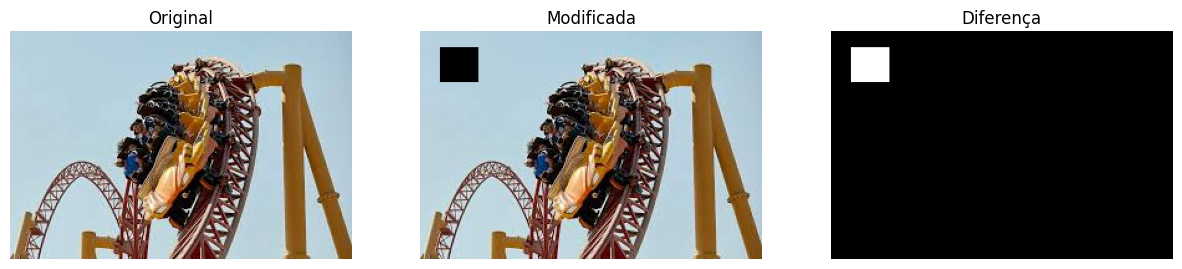

In [36]:
# Carregar as duas imagens
img_original = cv2.imread('original.png')
img_modificada = cv2.imread('modificada.png')

# Executar a função
subtracao_imagem(img_original, img_modificada)

Note que o fundo preto indica pontos onde não foram detectadas mudanças na imagem enquanto que, a região branca são pontos nos quais a imagem foi modificada. 

Agora, vejamos a detecção da mudança em relação às imagens "mono_vermelha.png" e "mono_vermelha_1_preta.png":

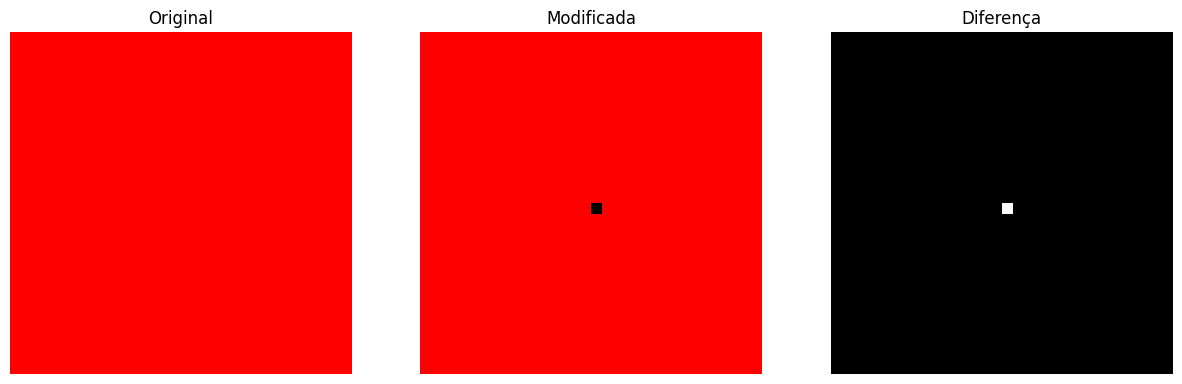

In [68]:
# Carregar as duas imagens
img_original = cv2.imread('mono_vermelha.png')
img_modificada = cv2.imread('mono_vermelha_1_preta.png')

# Executar a função
subtracao_imagem(img_original, img_modificada)

Pudemos notar, em ambos casos, que a detecção de mudanças pode subtração de imagens se mostrou bastante promissora.

Para a geração das imagens anteriores usamos o código a seguir: 

In [89]:
import numpy as np
import matplotlib.pyplot as plt

def gerar_img_mono_sem_e_com_ruido(indice_cor):
    # Criar uma matriz 32x32 com 3 canais (RGB), todos inicializados com zero
    imagem_sem_ruido = np.zeros((32, 32, 3), dtype=np.uint8)

    # Definir todos os pixels para vermelho (255 no canal vermelho, 0 nos outros)
    imagem_sem_ruido[:, :, 0] = 255  # Canal vermelho

    # Salvar a imagem sem ruído
    plt.imsave('img_sem_ruido.png', imagem_sem_ruido)

    # Criar uma cópia da imagem sem ruído para modificar
    imagem_com_ruido = np.copy(imagem_sem_ruido)

    # Modificar um pixel específico
    imagem_com_ruido[16, 16, 0] = indice_cor  # Mudança não sutil no canal vermelho de um pixel

    # Salvar a imagem com ruído
    plt.imsave('img_com_ruido.png', imagem_com_ruido)

    # Exibir e salvar as imagens usando Matplotlib
    # Imagem sem ruído
    plt.figure(figsize=(2, 2))
    plt.imshow(imagem_sem_ruido)
    plt.title('Imagem Vermelha 32x32')
    plt.axis('off')  # Desligar os eixos
    plt.show()

    # Imagem com ruído
    plt.figure(figsize=(2, 2))
    plt.imshow(imagem_com_ruido)
    plt.title('Imagem com Pixel Modificado')
    plt.axis('off')  # Desligar os eixos
    plt.show()

    # Caminhos das imagens salvas
    img_sem_ruido = 'img_sem_ruido.png'
    img_com_ruido = 'img_com_ruido.png'

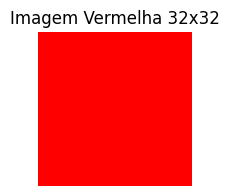

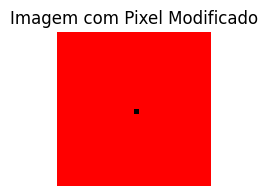

In [92]:
gerar_img_mono_sem_e_com_ruido(0)

Podemos agora testar uma mudança mais sutil e perceber se a subtração de imagem mostrará mudanças mais sutis. Começemos usando a mudança de "imagem_com_ruido[16, 16, 0] = 0" para "imagem_com_ruido[16, 16, 0] = 254". Neste caso, veremos se uma alteração leve na cor vermelha será detectada:

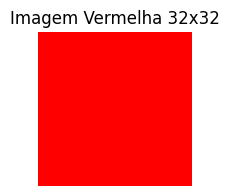

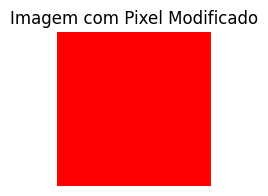

In [94]:
gerar_img_mono_sem_e_com_ruido(254)

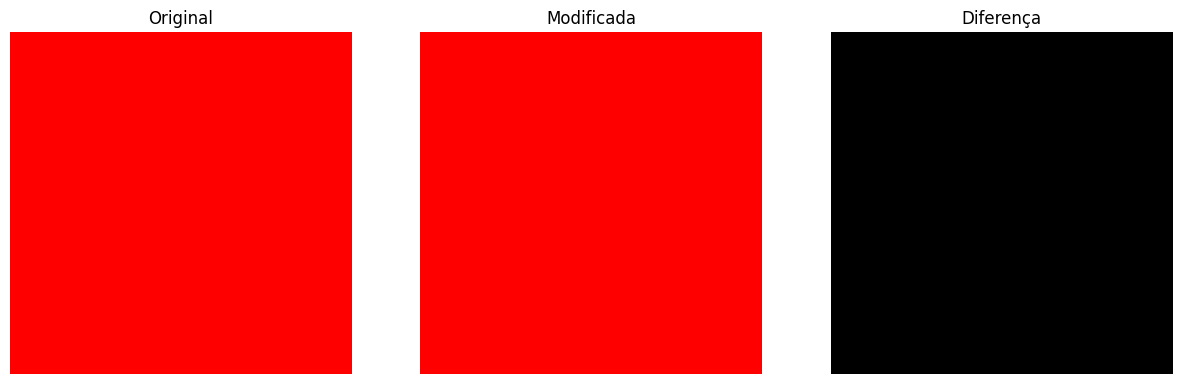

In [95]:
# Carregar as duas imagens
img_original = cv2.imread('img_sem_ruido.png')
img_modificada = cv2.imread('img_com_ruido.png')

# Executar a função
subtracao_imagem(img_original, img_modificada)

Note que não tivemos destaque de mudança alguma em relação às imagens "Original" e "Modificada".

Façamos um código para a geração de mudanças diminuindo de $5$ em $5$ no gradiente da cor vermelha $255$ para observamos a tonalidade a partir da qual a mudança é "percebida" pelo método.

Gradiente = 255


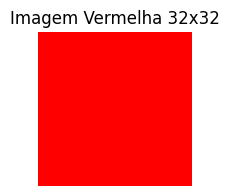

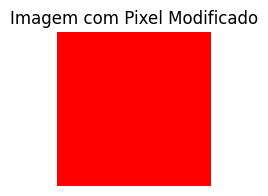

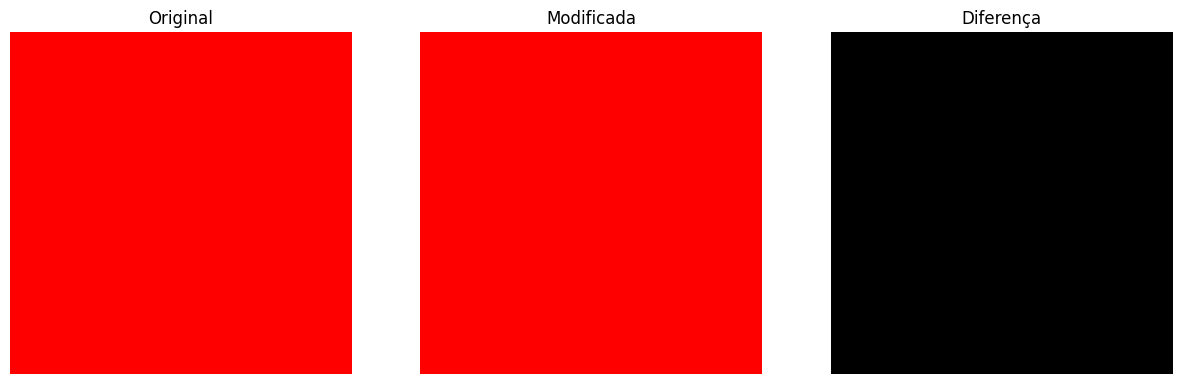

Gradiente = 250


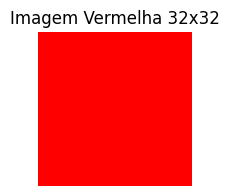

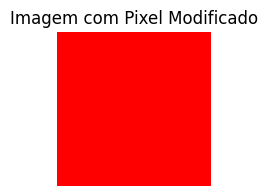

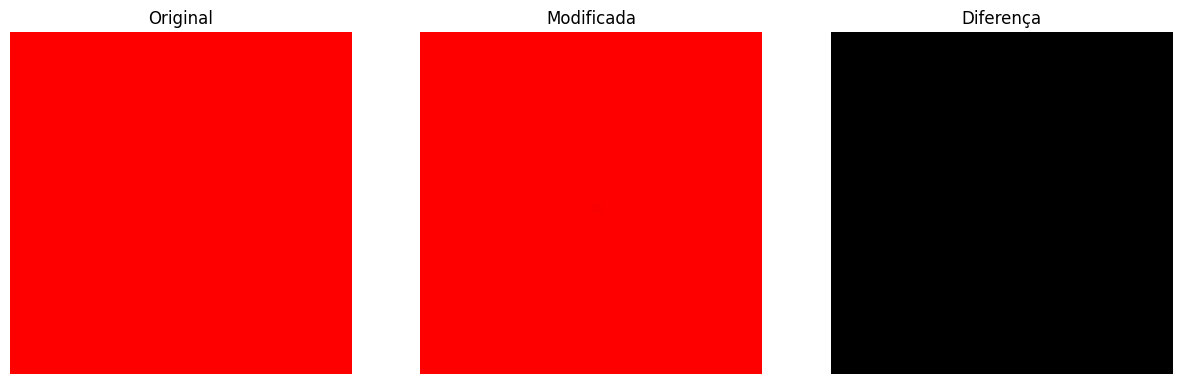

Gradiente = 245


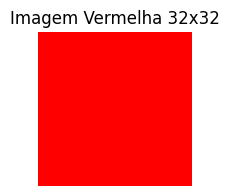

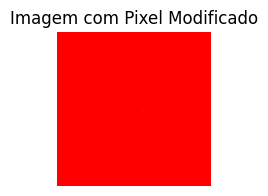

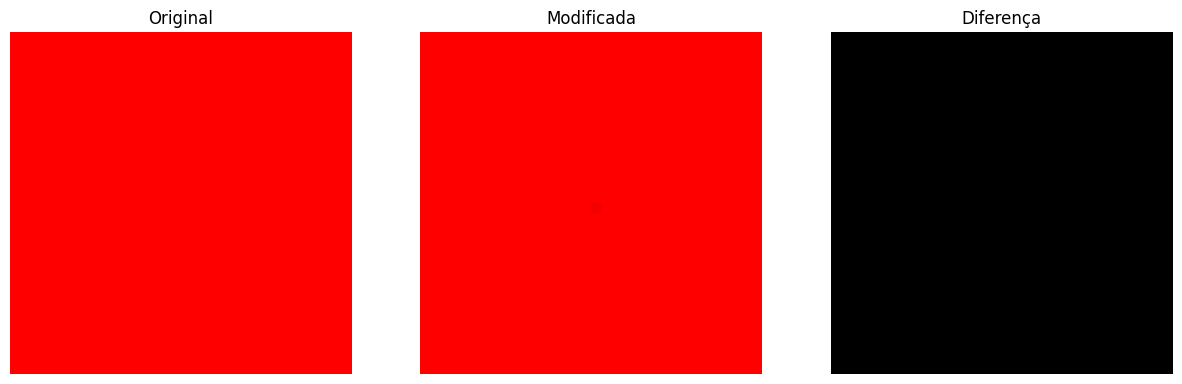

Gradiente = 240


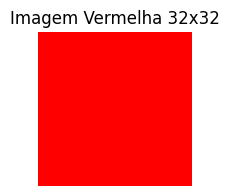

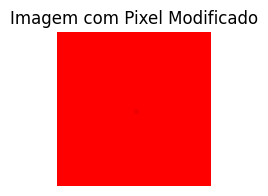

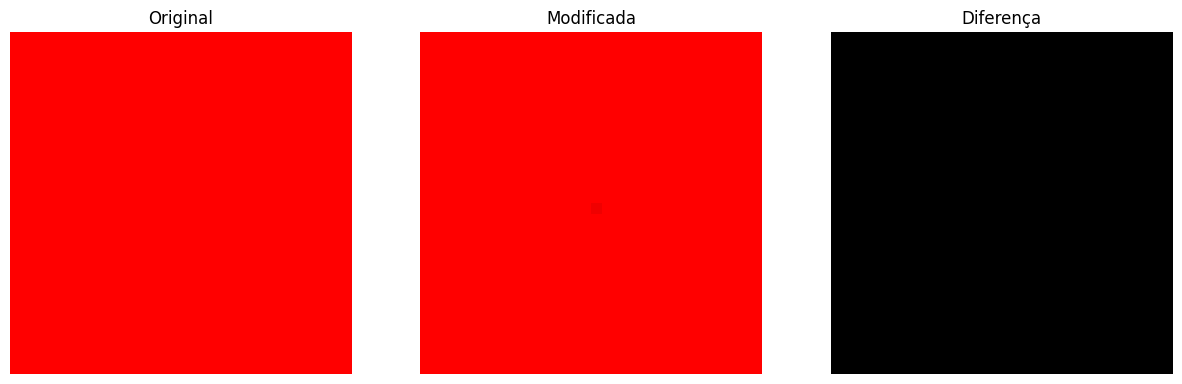

Gradiente = 235


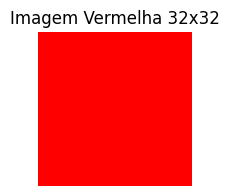

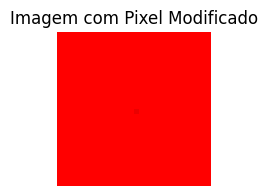

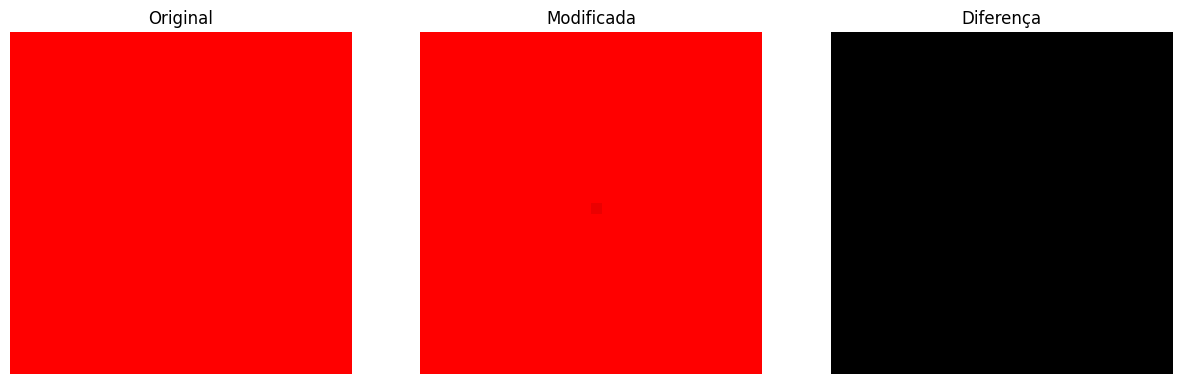

Gradiente = 230


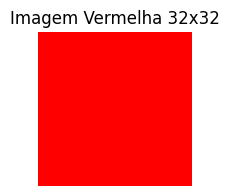

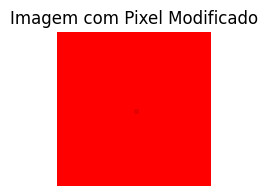

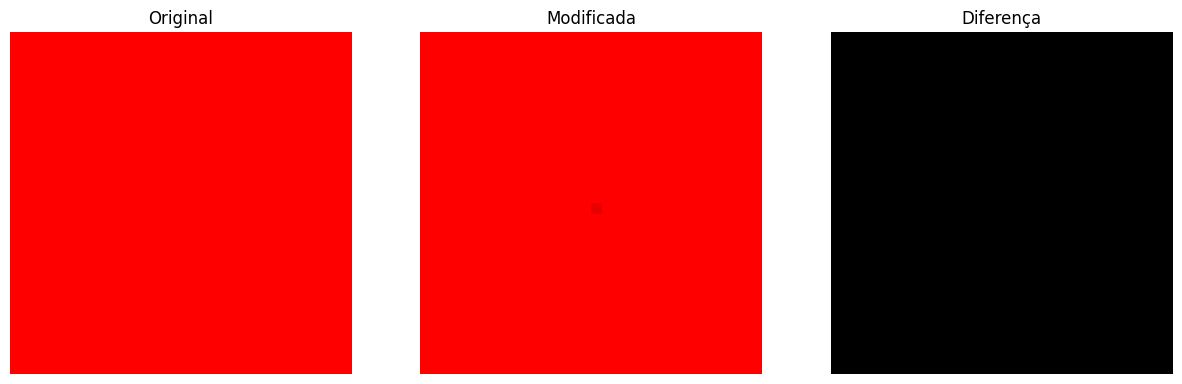

Gradiente = 225


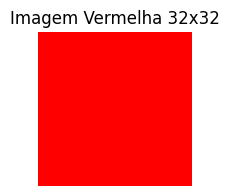

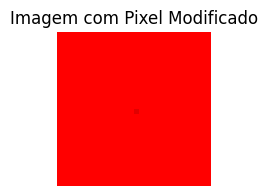

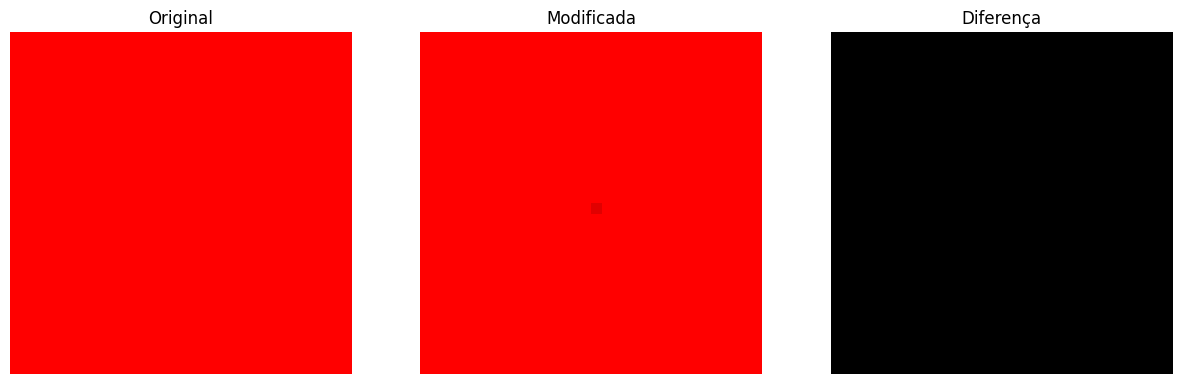

Gradiente = 220


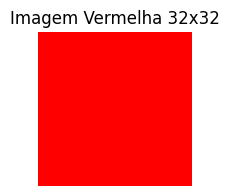

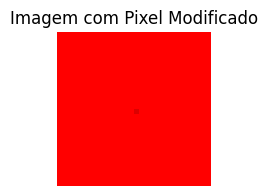

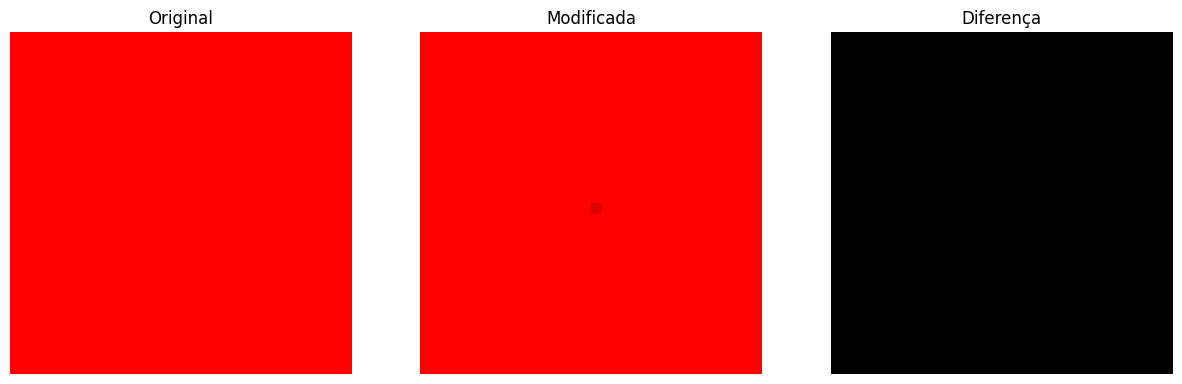

Gradiente = 215


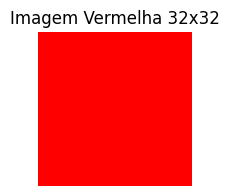

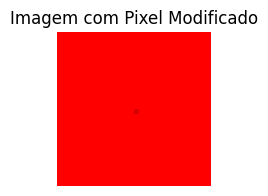

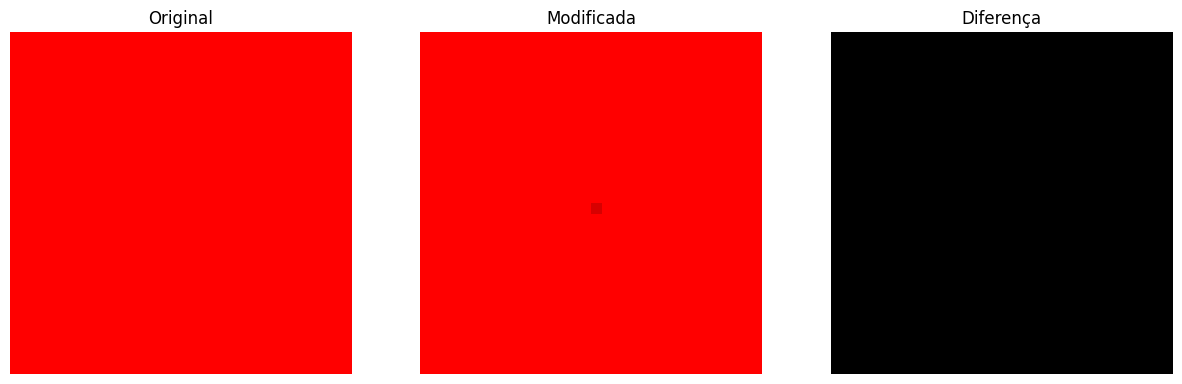

Gradiente = 210


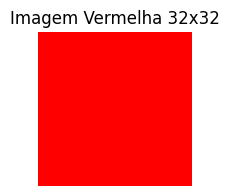

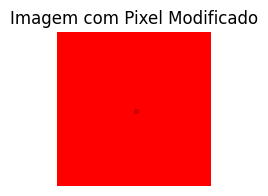

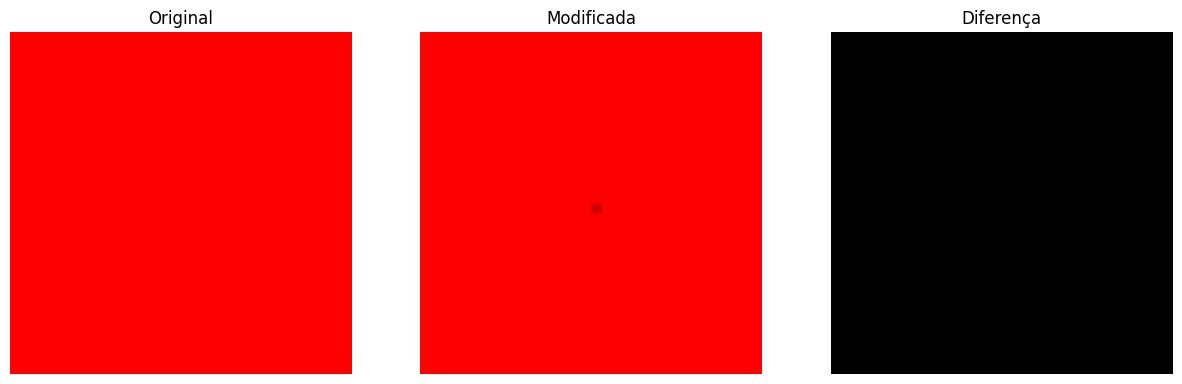

Gradiente = 205


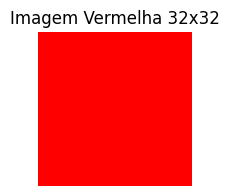

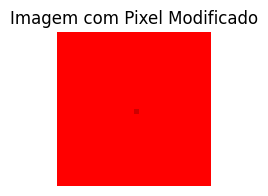

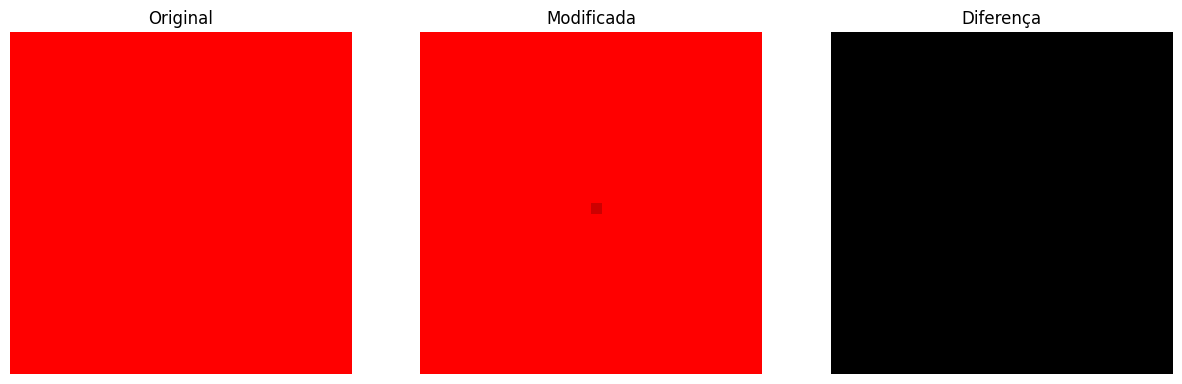

Gradiente = 200


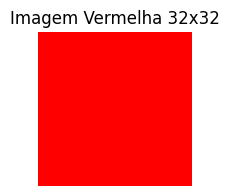

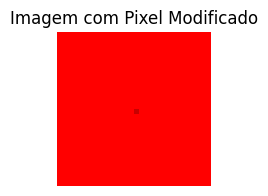

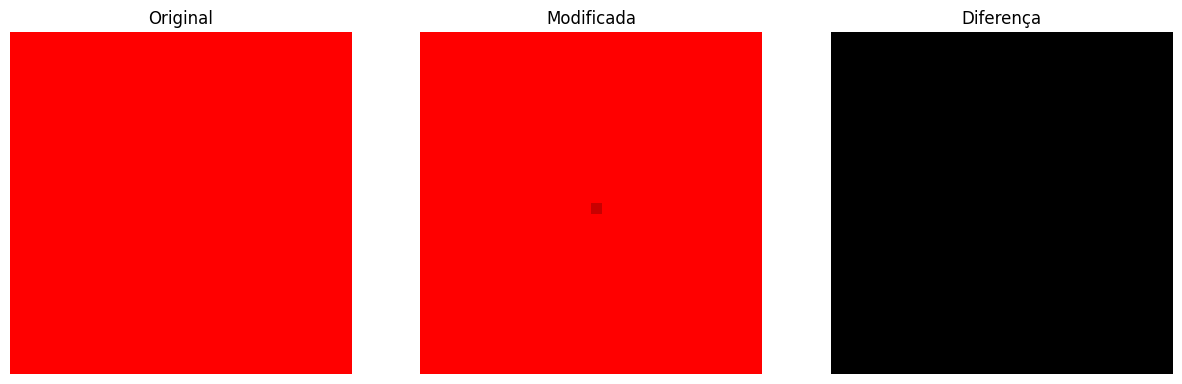

Gradiente = 195


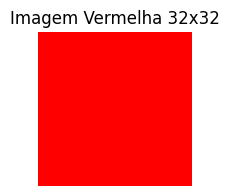

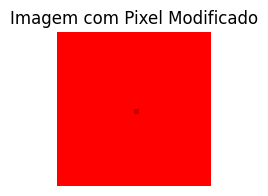

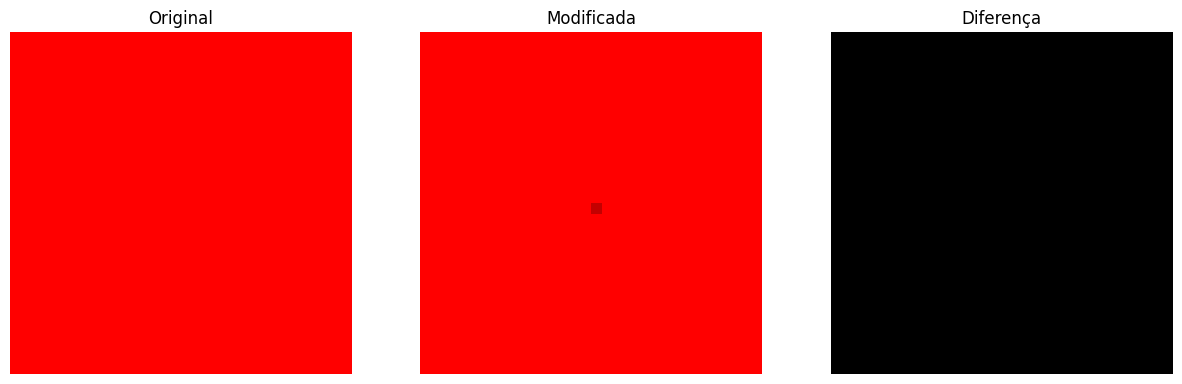

Gradiente = 190


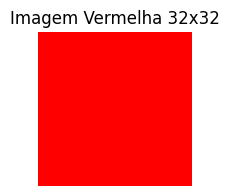

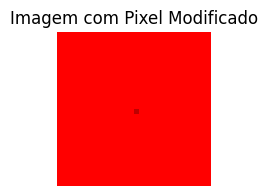

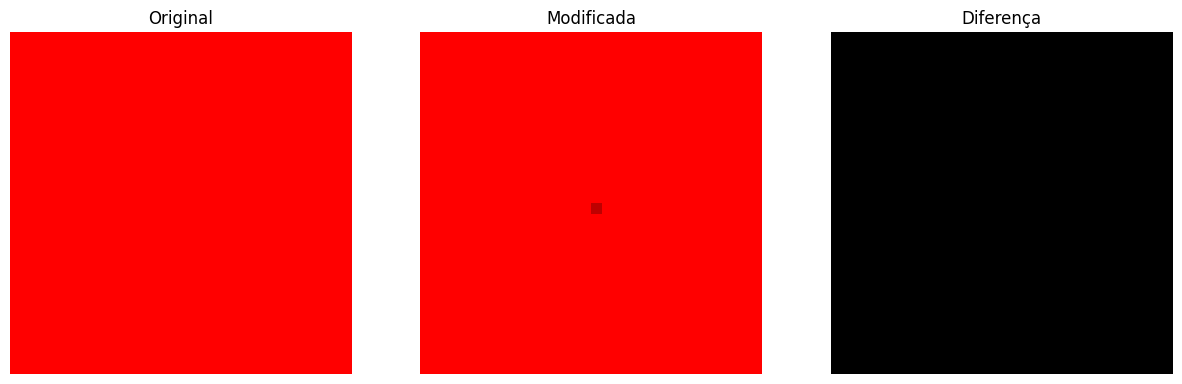

Gradiente = 185


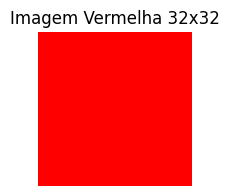

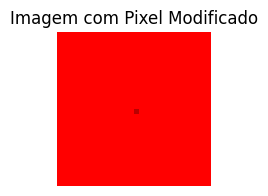

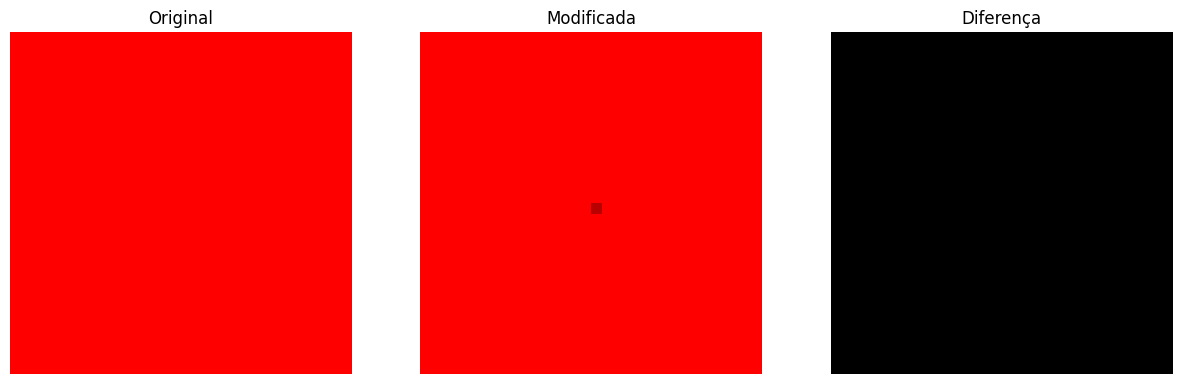

Gradiente = 180


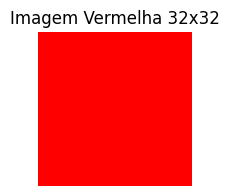

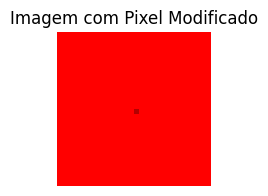

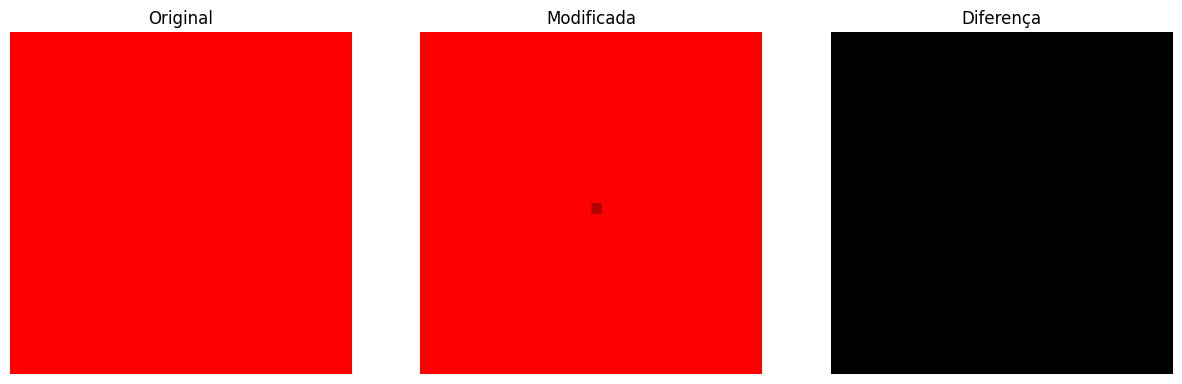

Gradiente = 175


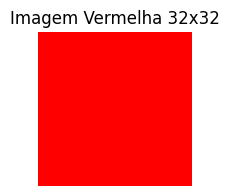

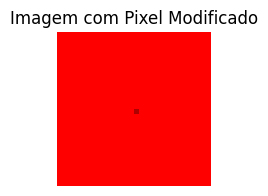

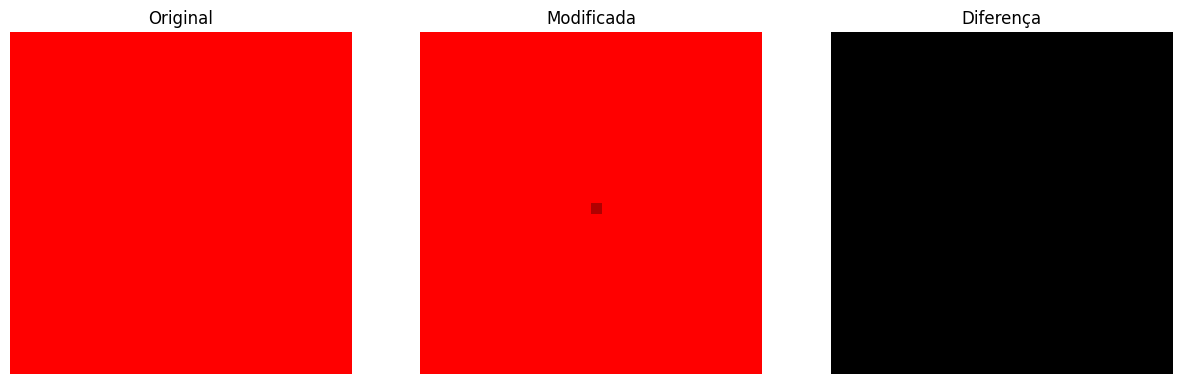

Gradiente = 170


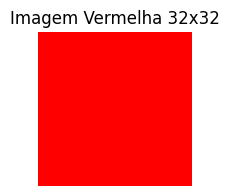

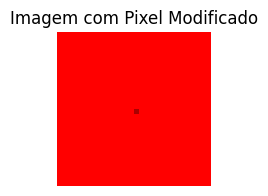

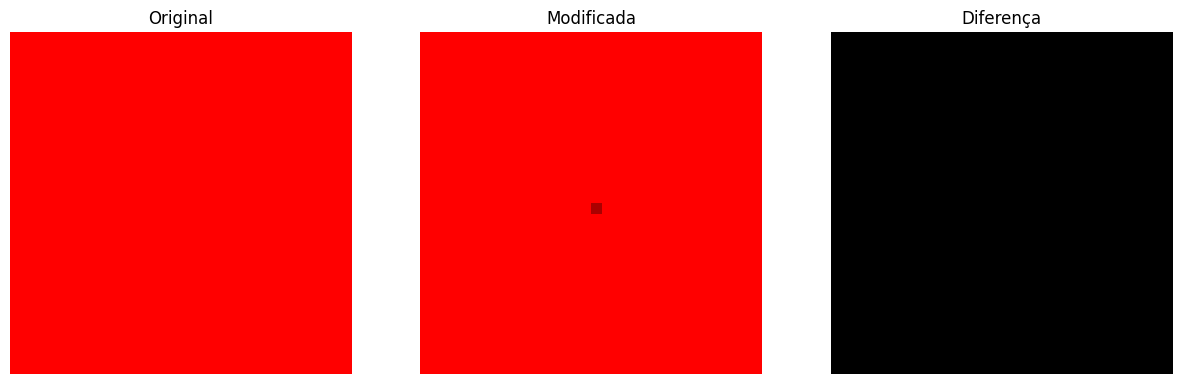

Gradiente = 165


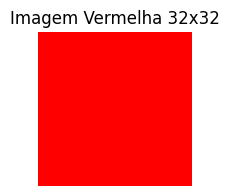

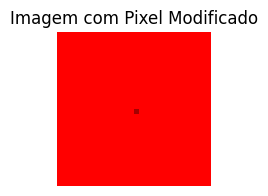

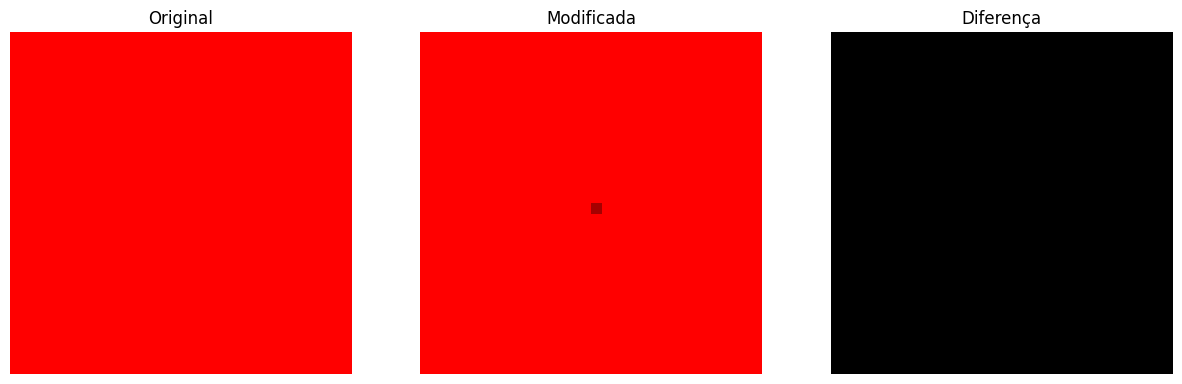

Gradiente = 160


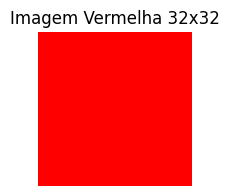

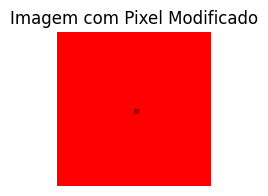

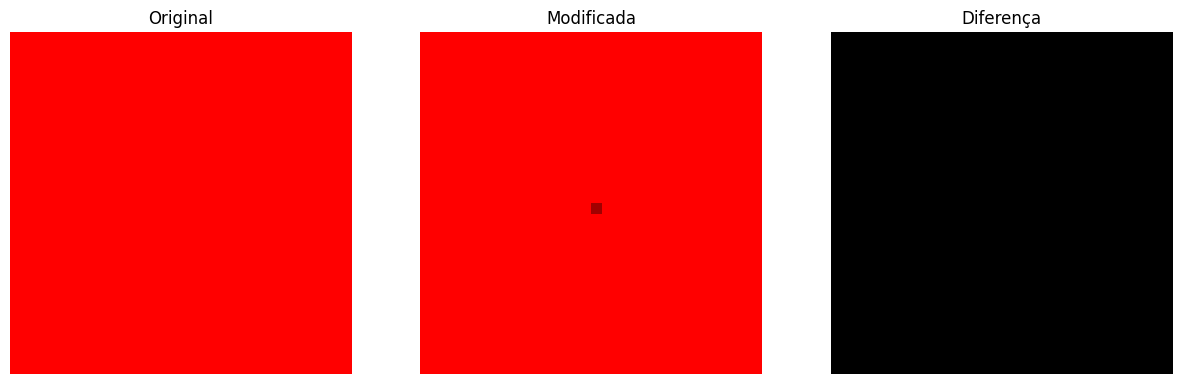

Gradiente = 155


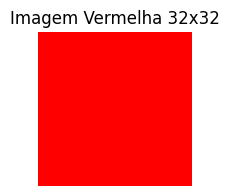

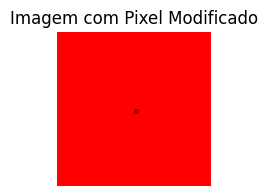

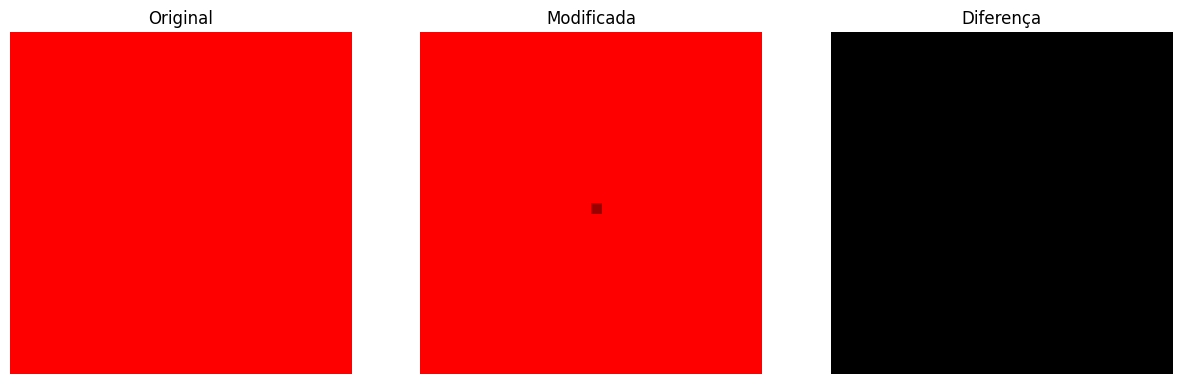

Gradiente = 150


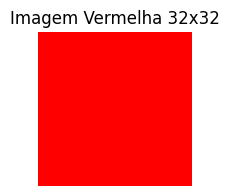

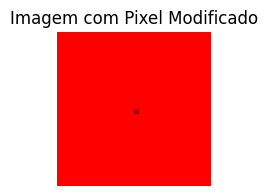

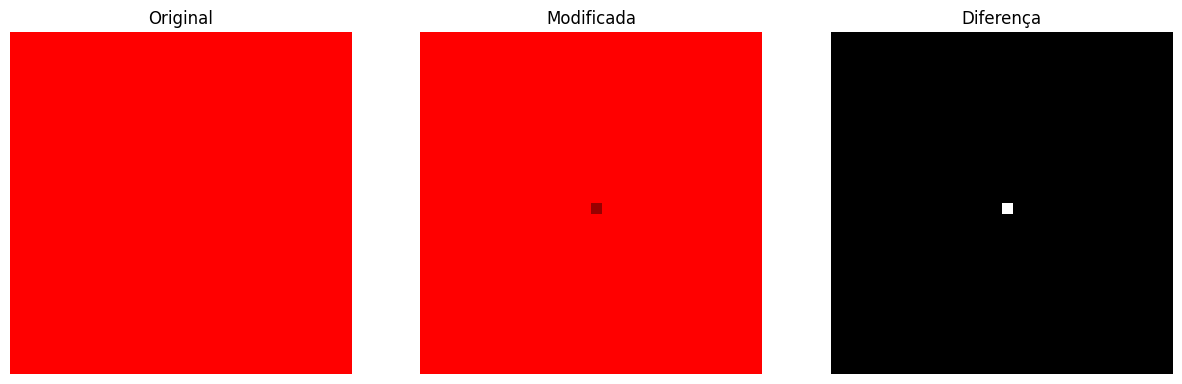

Gradiente = 145


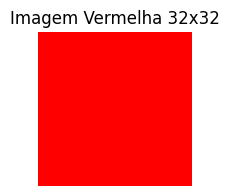

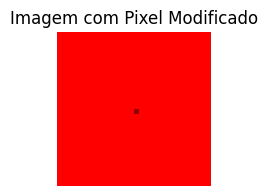

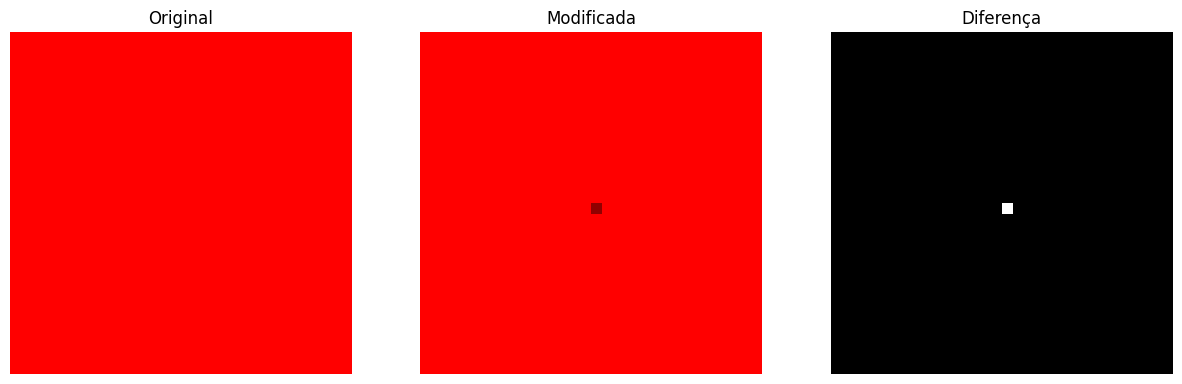

Gradiente = 140


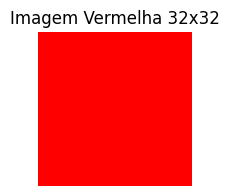

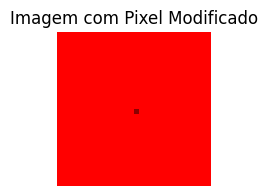

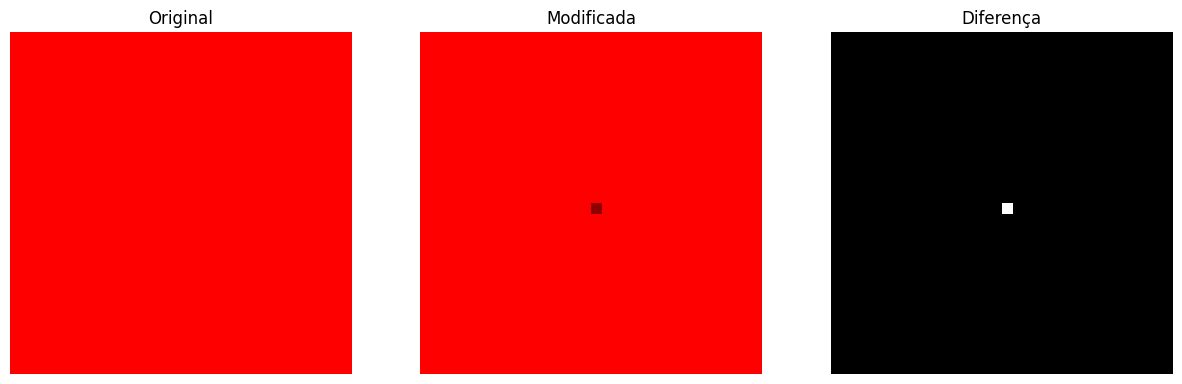

Gradiente = 135


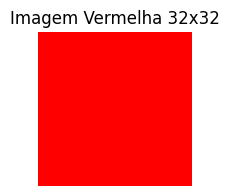

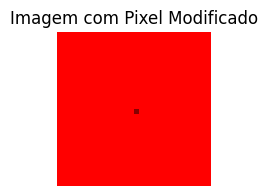

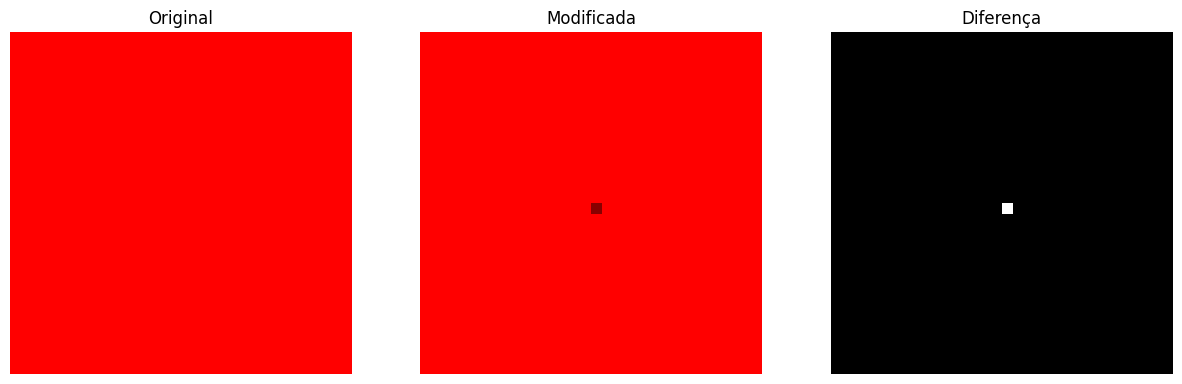

Gradiente = 130


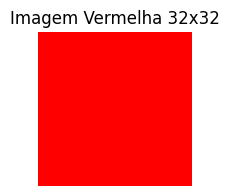

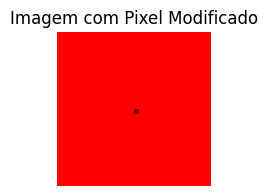

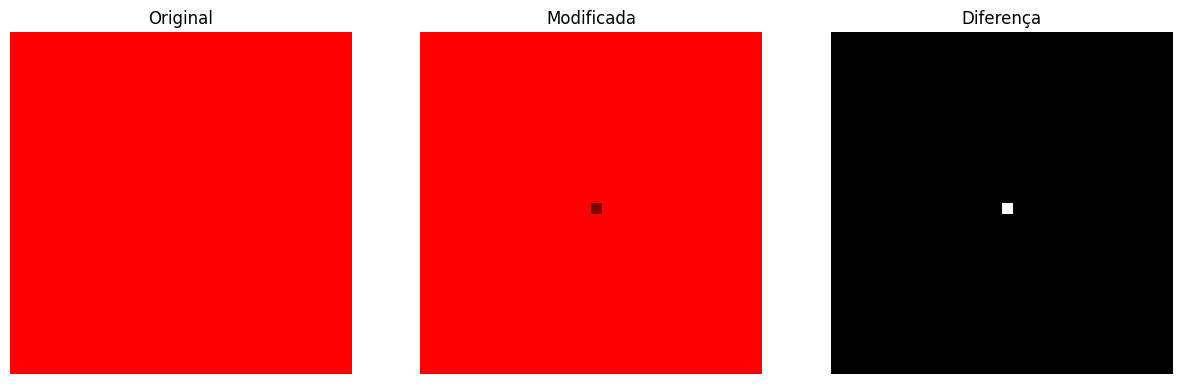

Gradiente = 125


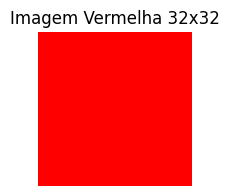

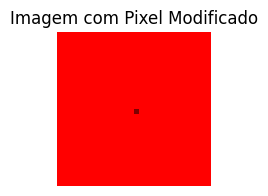

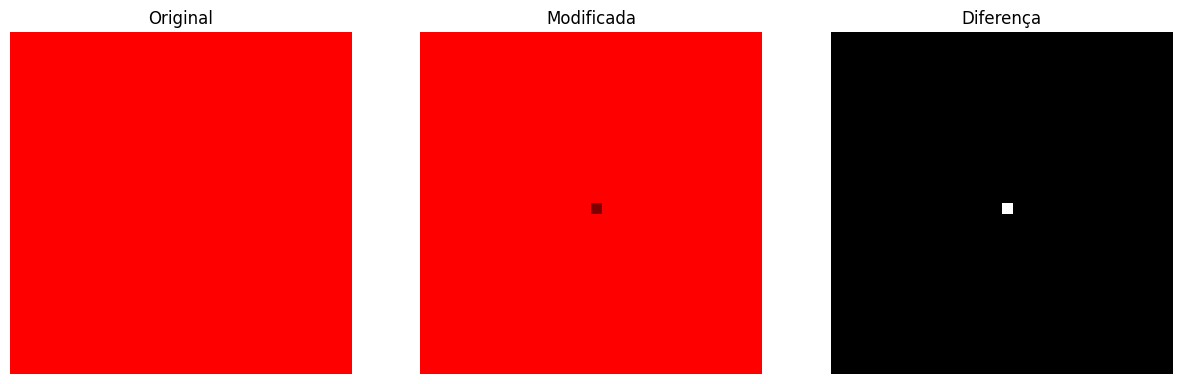

Gradiente = 120


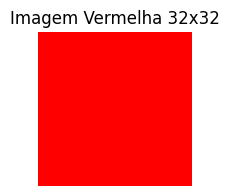

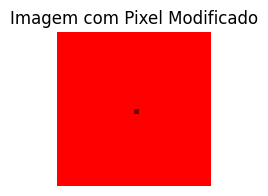

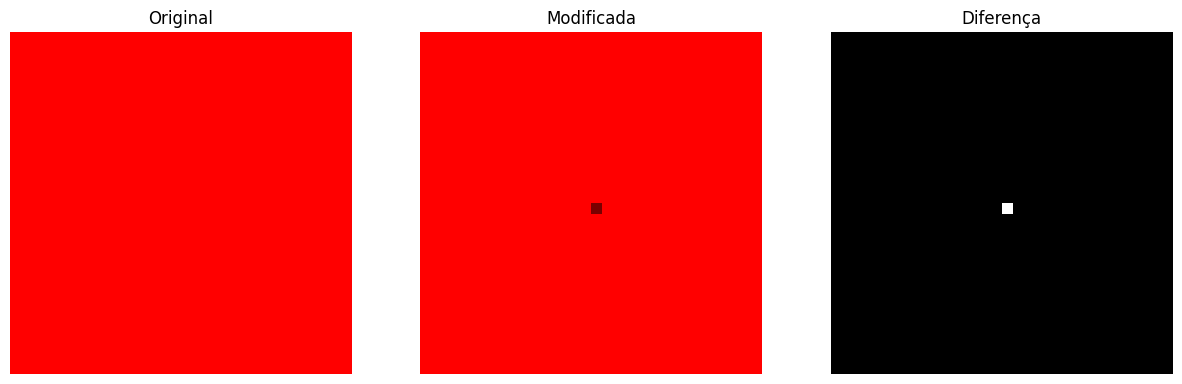

Gradiente = 115


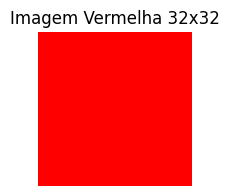

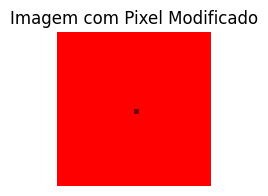

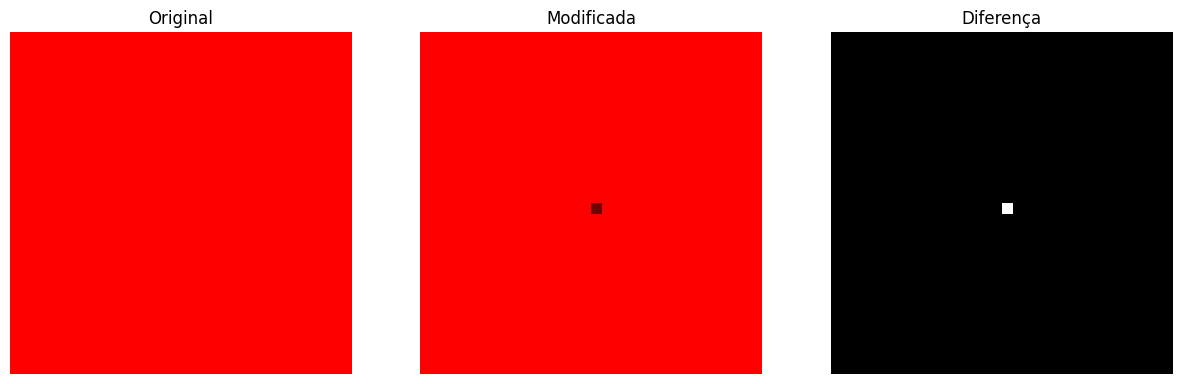

Gradiente = 110


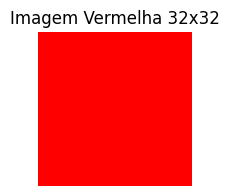

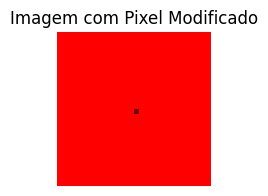

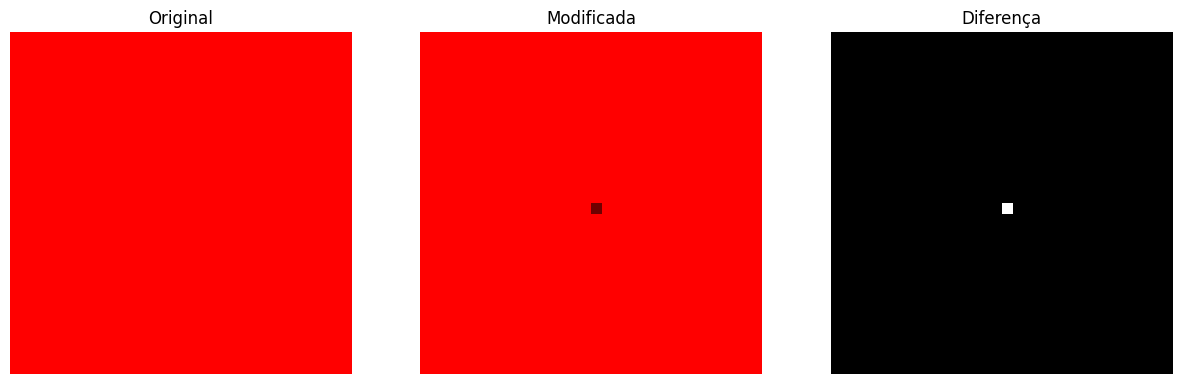

Gradiente = 105


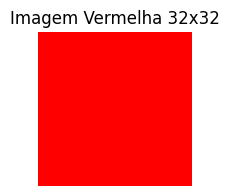

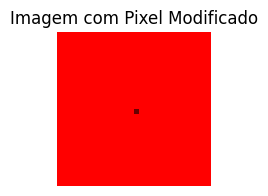

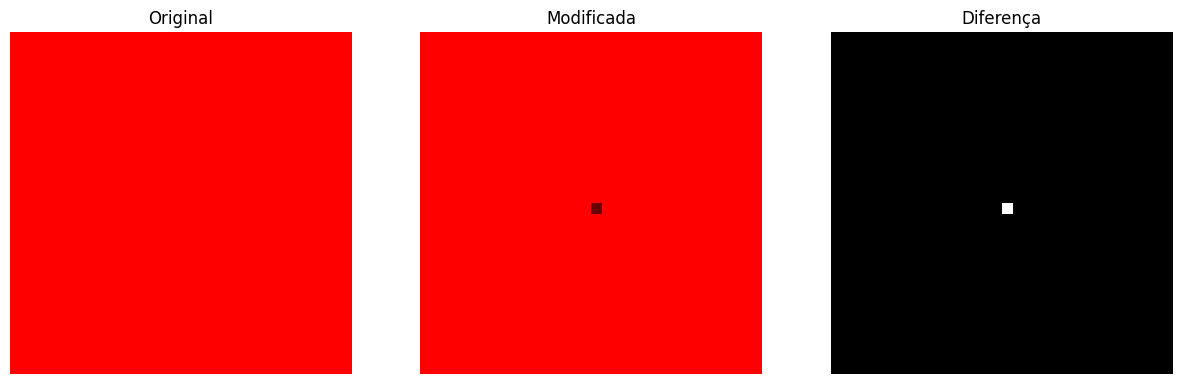

Gradiente = 100


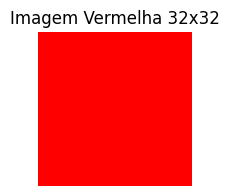

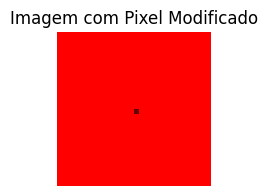

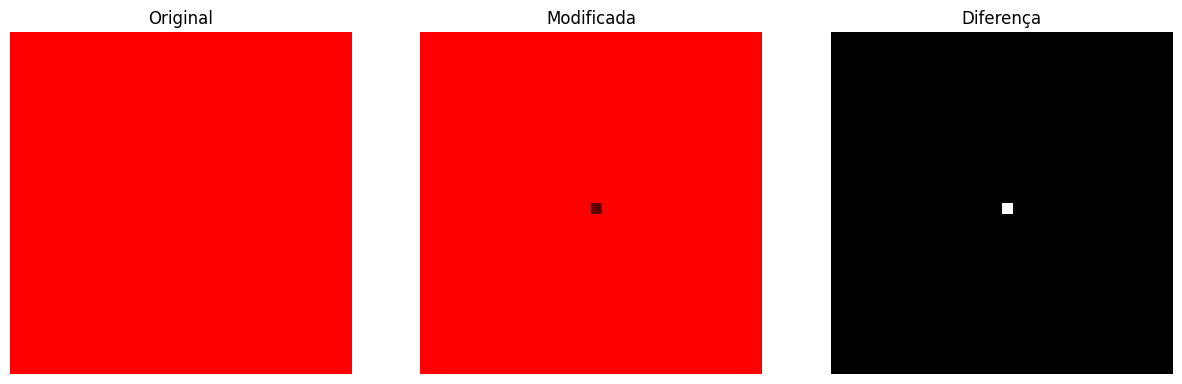

Gradiente = 95


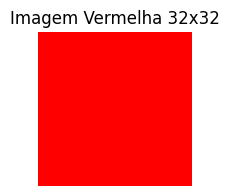

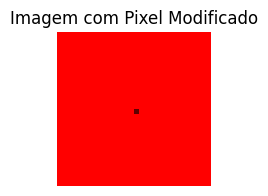

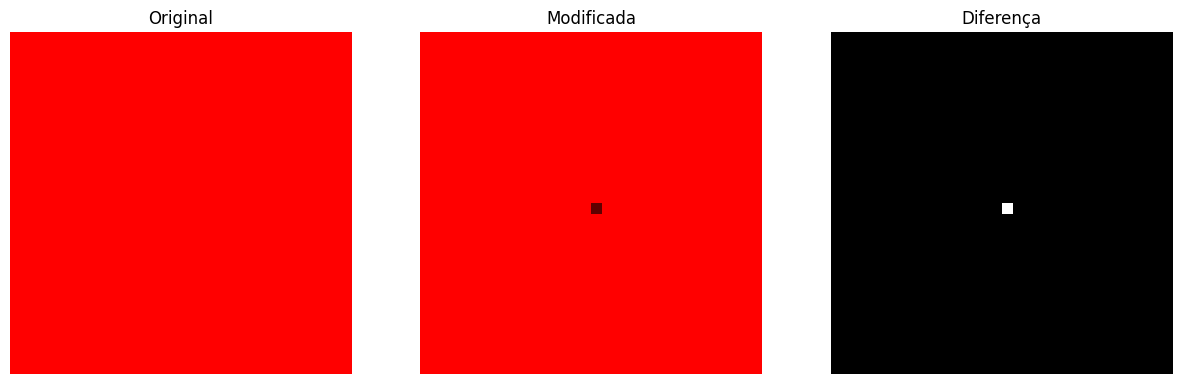

Gradiente = 90


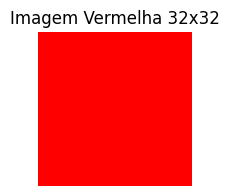

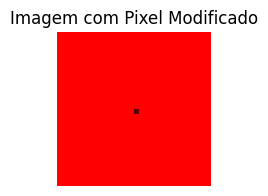

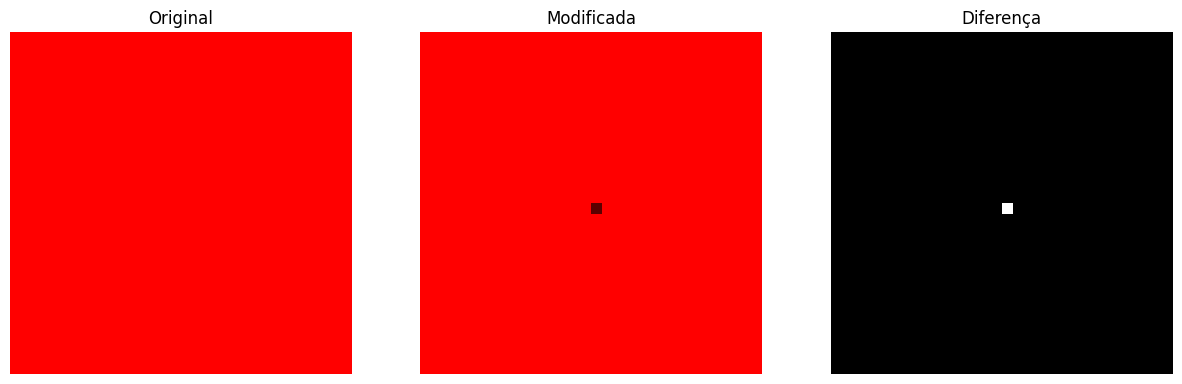

Gradiente = 85


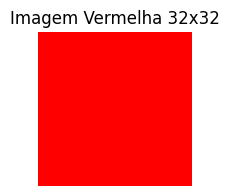

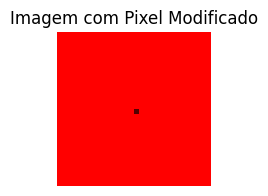

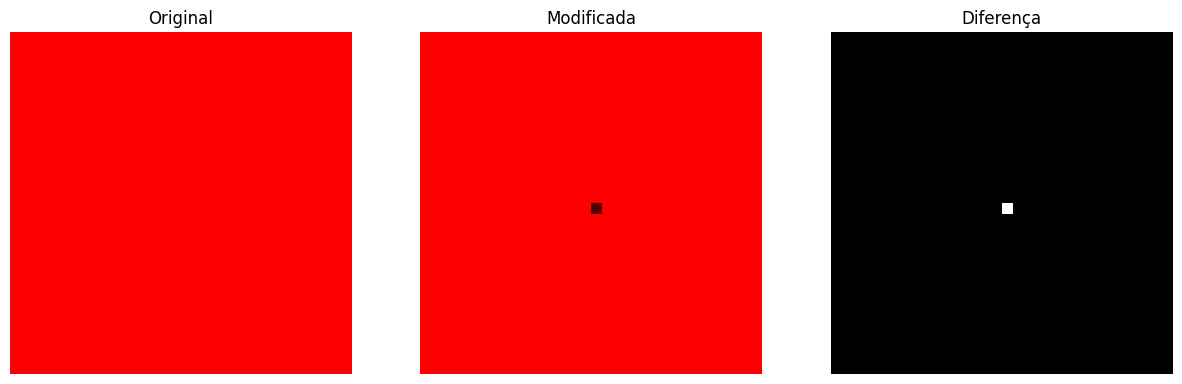

Gradiente = 80


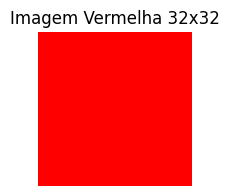

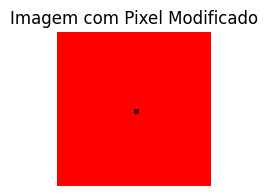

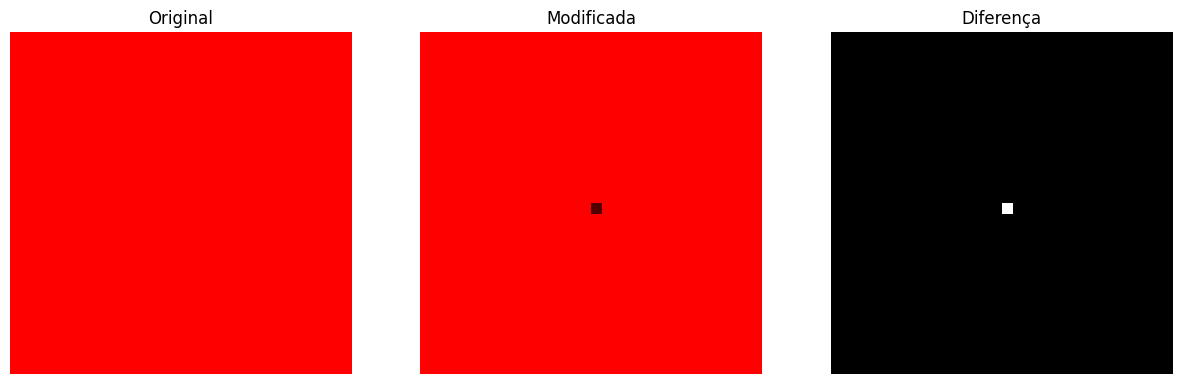

Gradiente = 75


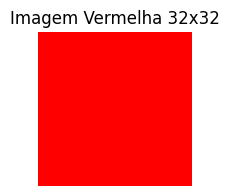

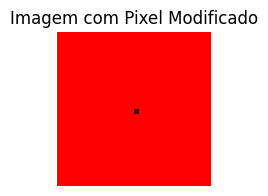

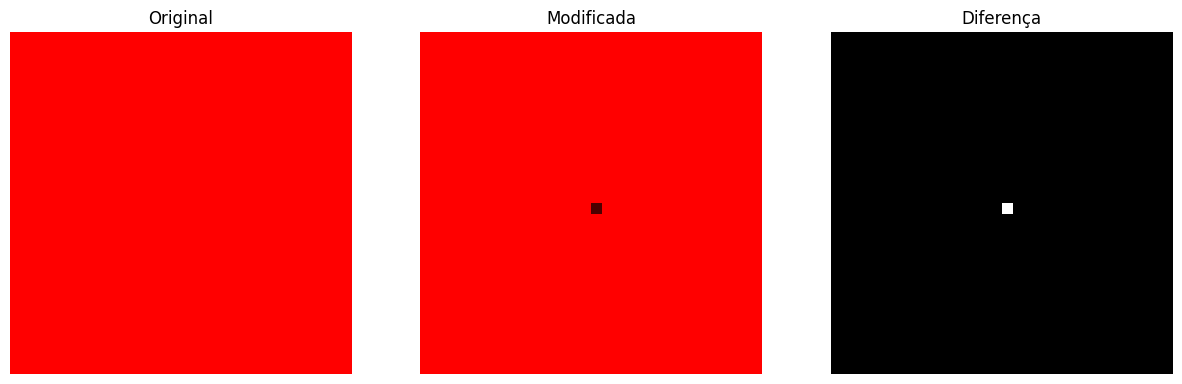

Gradiente = 70


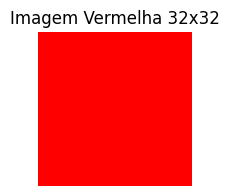

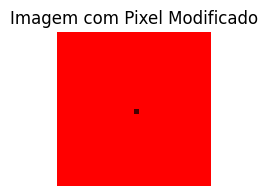

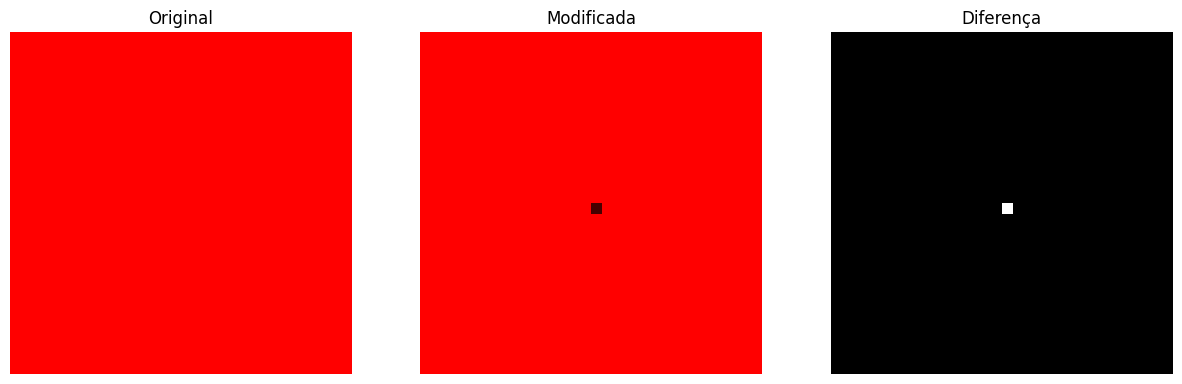

Gradiente = 65


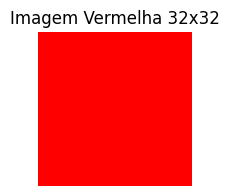

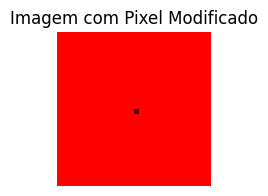

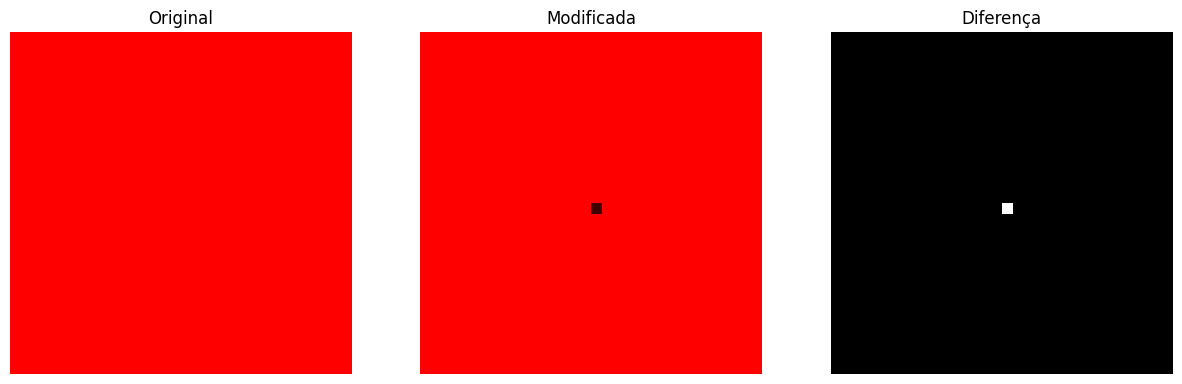

Gradiente = 60


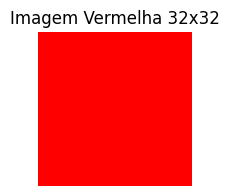

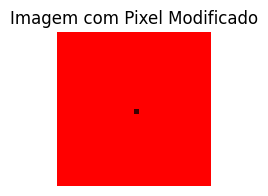

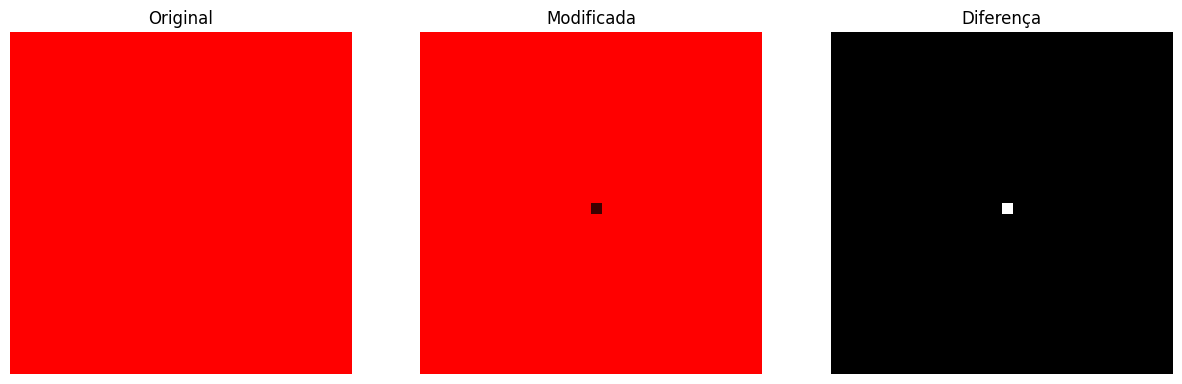

Gradiente = 55


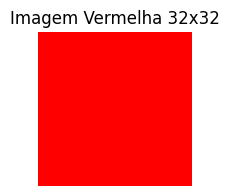

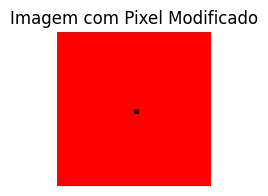

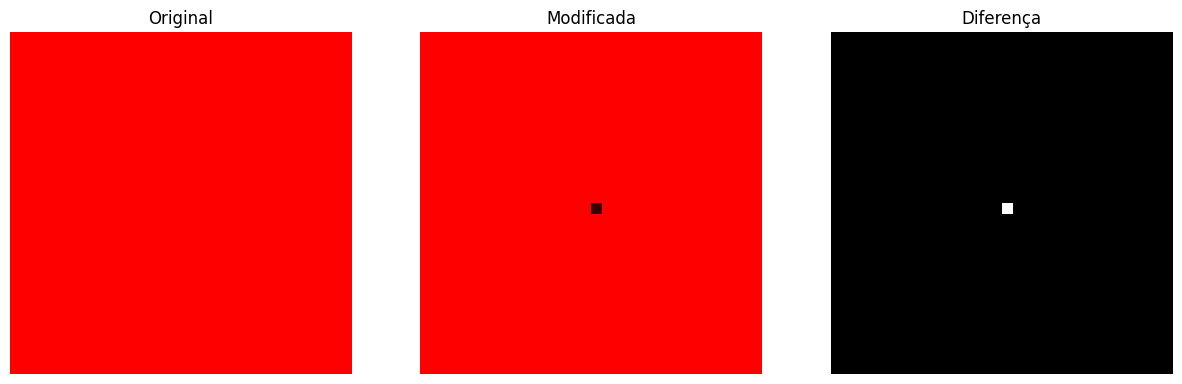

Gradiente = 50


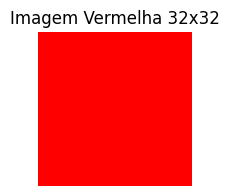

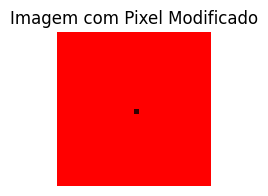

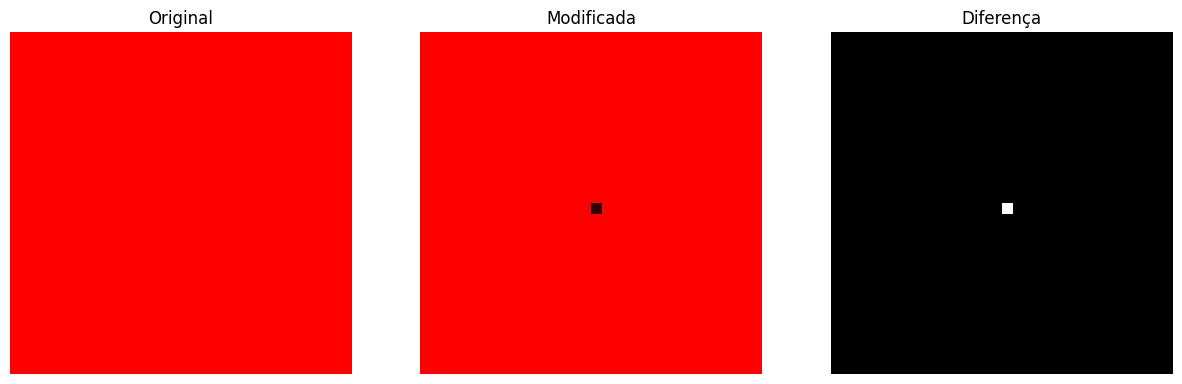

Gradiente = 45


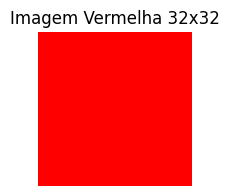

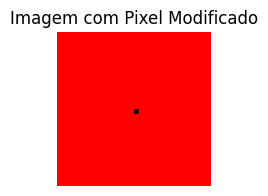

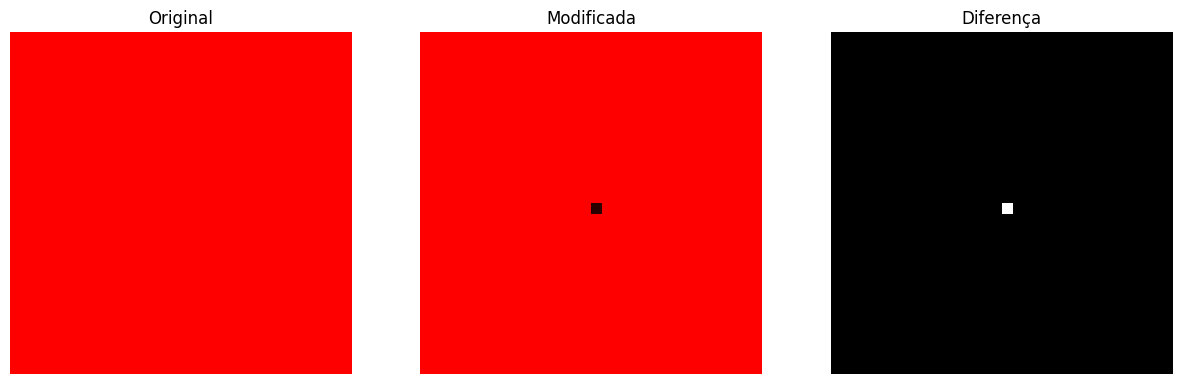

Gradiente = 40


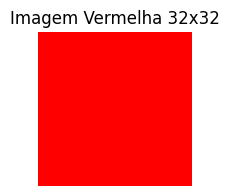

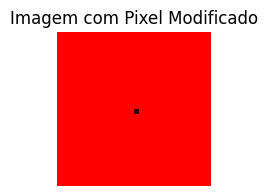

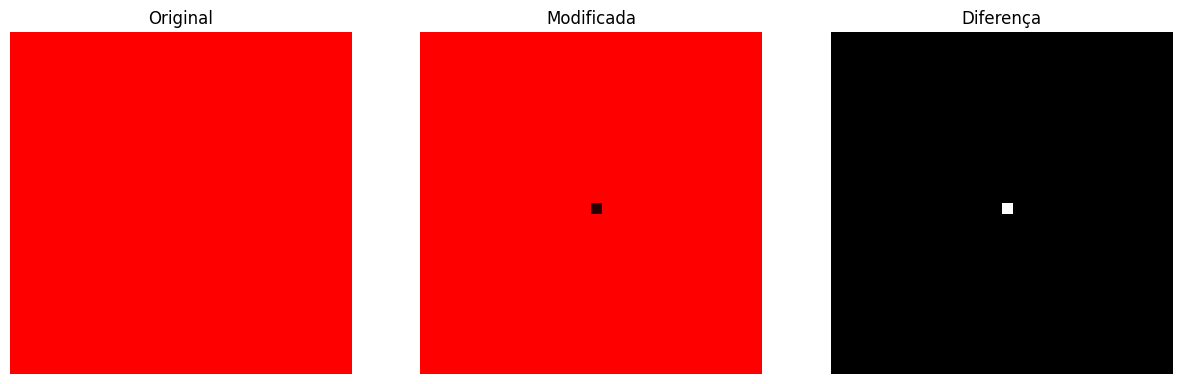

Gradiente = 35


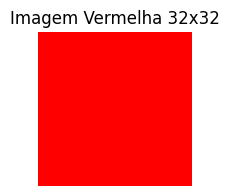

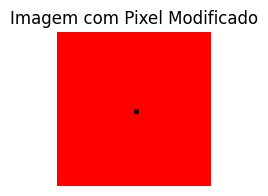

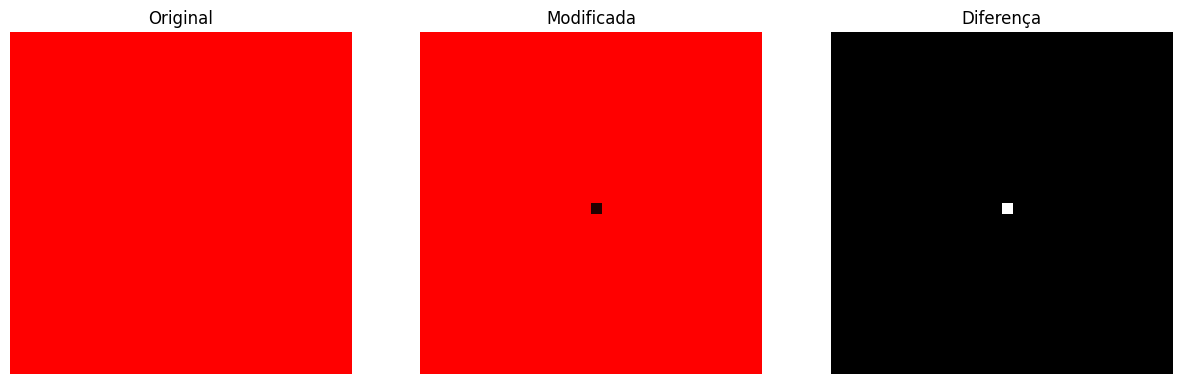

Gradiente = 30


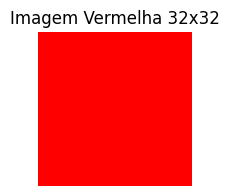

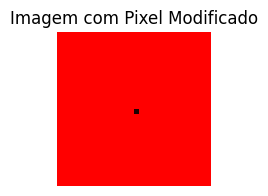

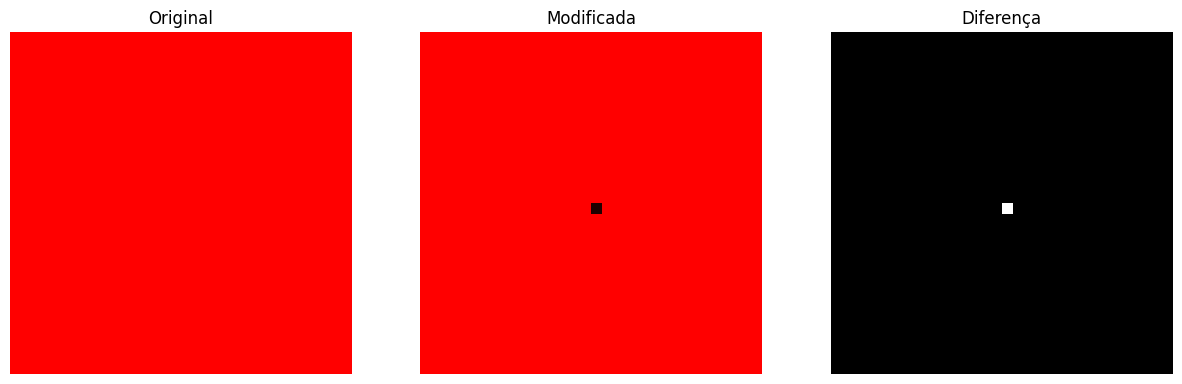

Gradiente = 25


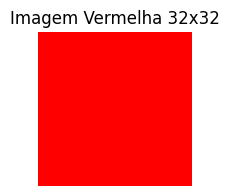

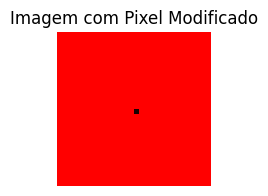

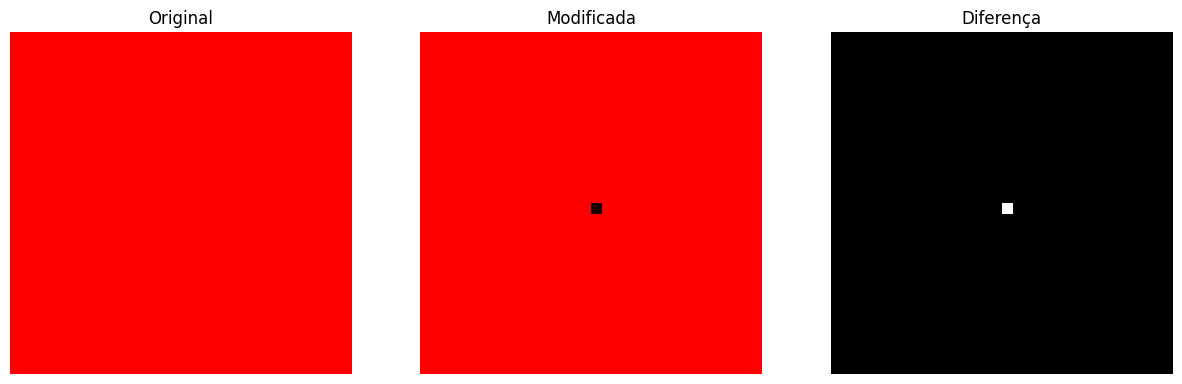

Gradiente = 20


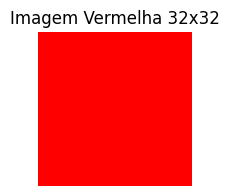

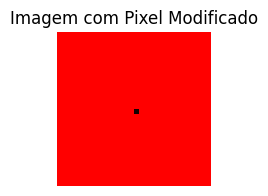

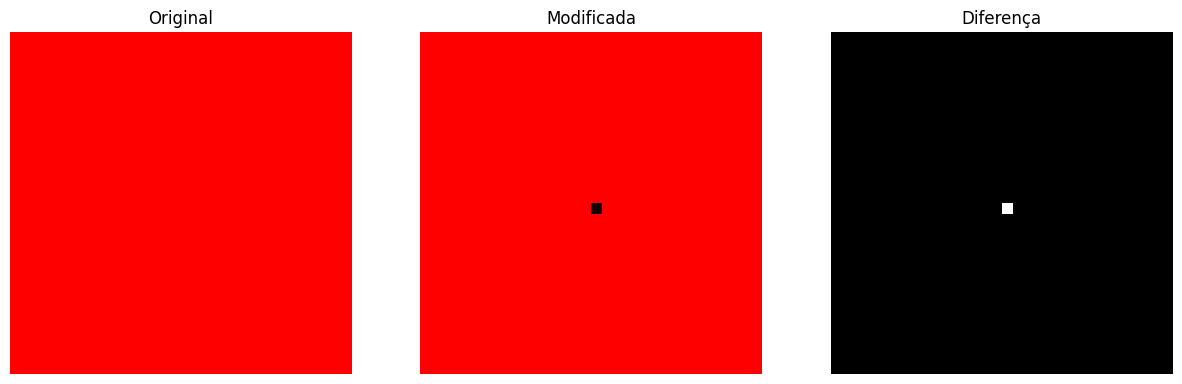

Gradiente = 15


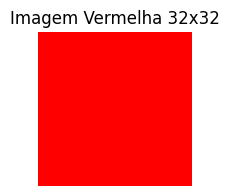

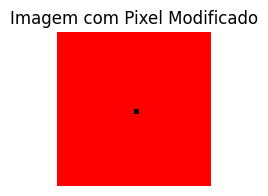

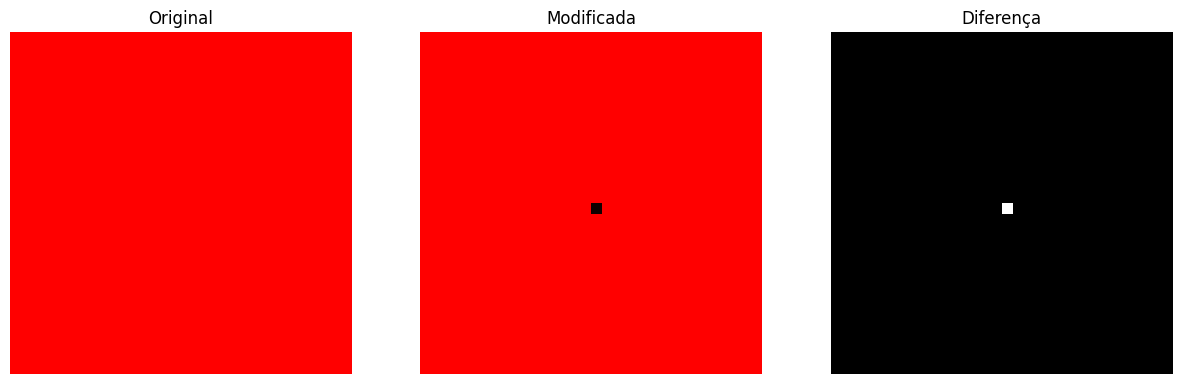

Gradiente = 10


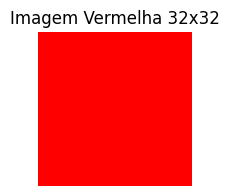

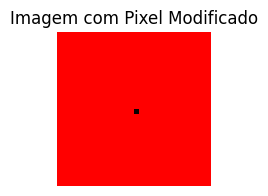

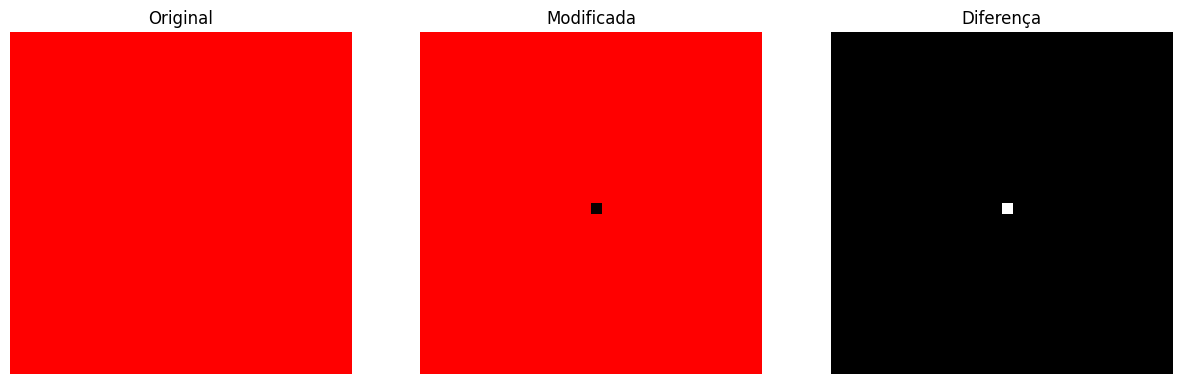

Gradiente = 5


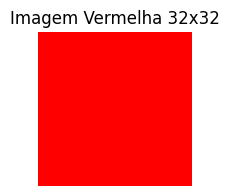

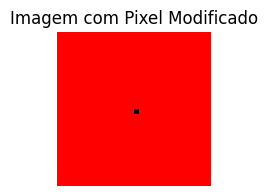

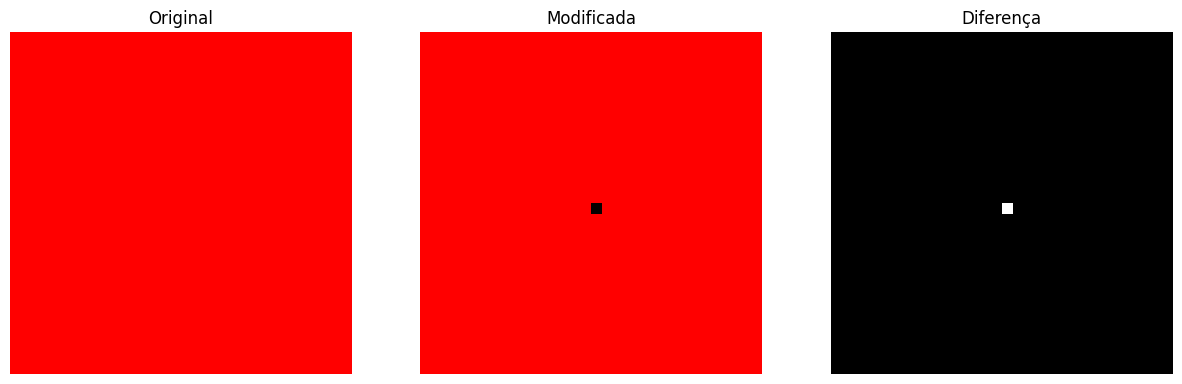

In [96]:
for i in range(255,0,-5):
    # Imprimindo gradientes
    print(f'Gradiente = {i}')
    
    # Gerar imagens
    gerar_img_mono_sem_e_com_ruido(i)
    
    # Carregar as duas imagens
    img_original = cv2.imread('img_sem_ruido.png')
    img_modificada = cv2.imread('img_com_ruido.png')

    # Executar a função
    subtracao_imagem(img_original, img_modificada)
    
    
    

Notamos que a mudança só é percebida para um gradiente de $150$ ante o valor inicial de $255$.

Vejamos se ao pegarmos duas figuras $32 \times 32$ e gerarmos com uma mudança com gradiente superior a $150$, digamos, no limiar $155$ para verificarmos se esta é percebida ou não (modificamos o codigo anterior para gerar uma região preta central $5 \times 5$):

In [114]:
import numpy as np
import matplotlib.pyplot as plt

def gerar_img_mono_sem_e_com_ruido_2(indice_cor, tamanho):
    # Criar uma matriz 32x32 com 3 canais (RGB), todos inicializados com zero
    imagem_sem_ruido = np.zeros((32, 32, 3), dtype=np.uint8)

    # Definir todos os pixels para vermelho (255 no canal vermelho, 0 nos outros)
    imagem_sem_ruido[:, :, 0] = 255  # Canal vermelho
    
    # Salvar a imagem sem ruído
    plt.imsave('img_sem_ruido.png', imagem_sem_ruido)

    # Criar uma cópia da imagem sem ruído para modificar
    imagem_com_ruido = np.copy(imagem_sem_ruido)

    # Modificar uma região 5x5 no centro da imagem
    centro = (16, 16)  # Centro aproximado para a imagem 32x32
    inicio = (centro[0] - tamanho // 2, centro[1] - tamanho // 2)  # Calculando o início da região 5x5

    # Aplicando a mudança na região 5x5
    imagem_com_ruido[inicio[0]:inicio[0]+tamanho, inicio[1]:inicio[1]+tamanho, 0] = indice_cor
    
    # Salvar a imagem com ruído
    plt.imsave('img_com_ruido.png', imagem_com_ruido)
    
    # Exibir e salvar as imagens usando Matplotlib
    # Imagem sem ruído
    plt.figure(figsize=(2, 2))
    plt.imshow(imagem_sem_ruido)
    plt.title('Imagem Vermelha 32x32')
    plt.axis('off')  # Desligar os eixos
    plt.show()

    # Imagem com "ruído"
    plt.figure(figsize=(2, 2))
    plt.imshow(imagem_com_ruido)
    plt.title('Imagem com Região Central Modificada')
    plt.axis('off')  # Desligar os eixos
    plt.show()

    # Caminhos das imagens salvas
    img_sem_ruido = 'img_sem_ruido.png'
    img_com_ruido = 'img_com_ruido.png'

Testemos para a nova imagem considerando os valores limiares de gradiente $155$ e $150$:

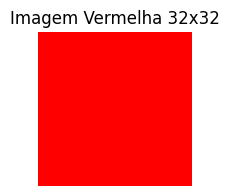

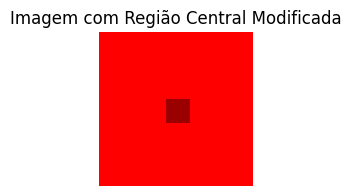

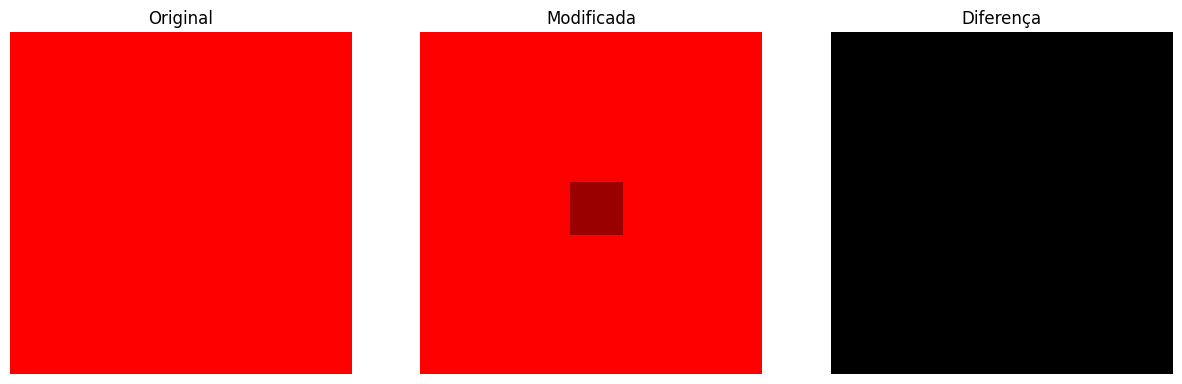

In [115]:
gerar_img_mono_sem_e_com_ruido_2(155,5)

# Carregar as duas imagens
img_original = cv2.imread('img_sem_ruido.png')
img_modificada = cv2.imread('img_com_ruido.png')

# Executar a função
subtracao_imagem(img_original, img_modificada)

Agora repetiremos a mudança acima considerando o valor de gradiente $155$:

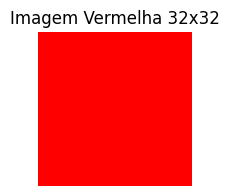

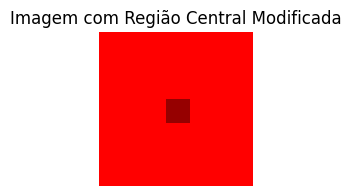

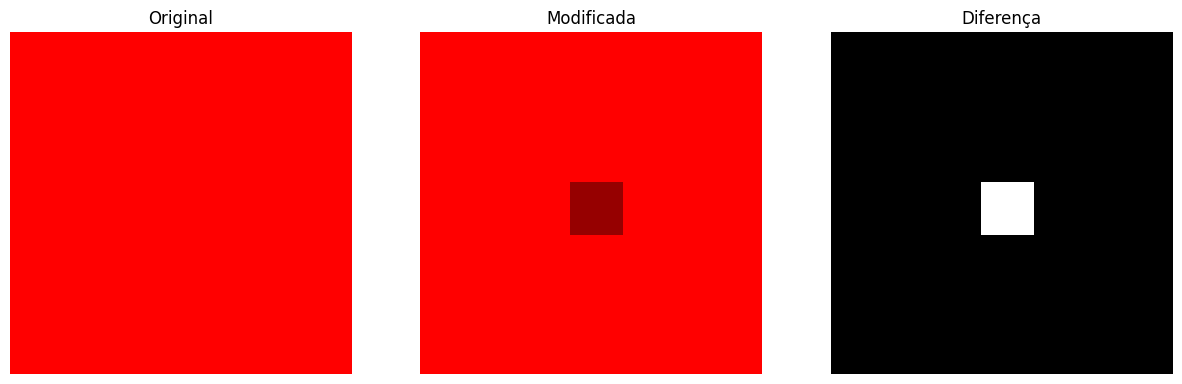

In [116]:
gerar_img_mono_sem_e_com_ruido_2(150,5)

# Carregar as duas imagens
img_original = cv2.imread('img_sem_ruido.png')
img_modificada = cv2.imread('img_com_ruido.png')

# Executar a função
subtracao_imagem(img_original, img_modificada)

Então, considerando a cor vermelha, o valor de gradiente de até $155$ não é percebida como uma mudança, mas sim valores de gradientes inferiores a este, na verdade $152$ ou inferior. Como vimos, este valor parece independer do tamanho da figura. Por fim, testemos para uma figura de tamanho $31 \times 31$:

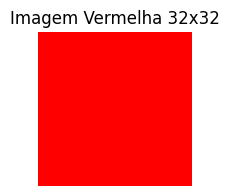

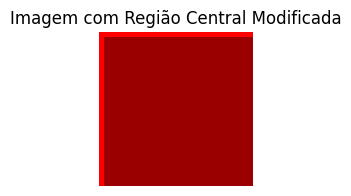

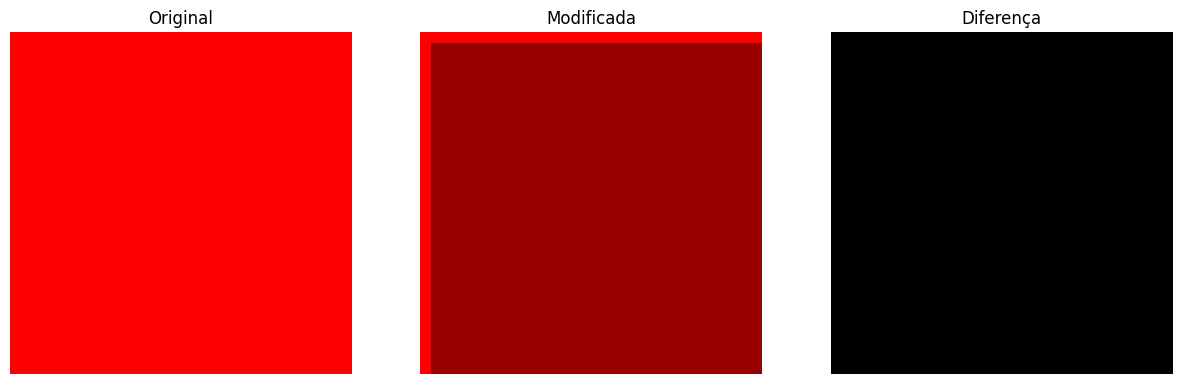

In [122]:
gerar_img_mono_sem_e_com_ruido_2(155,31)

# Carregar as duas imagens
img_original = cv2.imread('img_sem_ruido.png')
img_modificada = cv2.imread('img_com_ruido.png')

# Executar a função
subtracao_imagem(img_original, img_modificada)

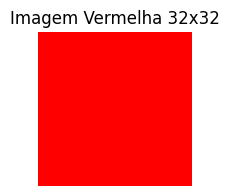

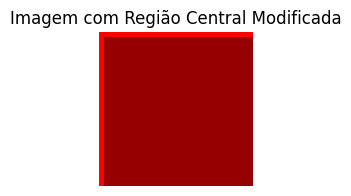

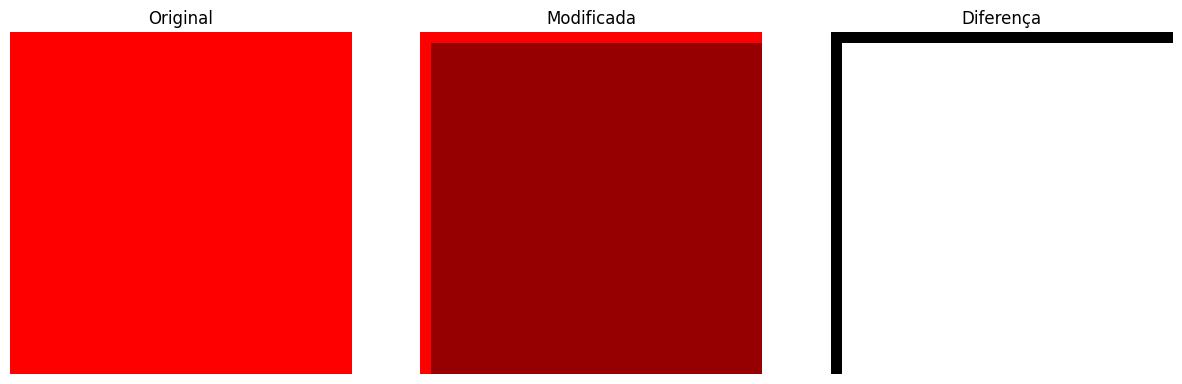

In [123]:
gerar_img_mono_sem_e_com_ruido_2(150,31)

# Carregar as duas imagens
img_original = cv2.imread('img_sem_ruido.png')
img_modificada = cv2.imread('img_com_ruido.png')

# Executar a função
subtracao_imagem(img_original, img_modificada)

E assim, descobrimos a invisibilidade, pelo menos aos "olhos" do método de subração de imagens. Na próxima seção faremos um paralelo considerando o método SSIM.

## 1.2 Subtração de Imagens, a SSIM (Structural Similarity Index)

O SSIM proporciona uma maneira mais sofisticada de comparar duas imagens, considerando a percepção de mudanças na estrutura da imagem.

In [125]:
from skimage.metrics import structural_similarity as ssim
import cv2
import numpy as np
import matplotlib.pyplot as plt

def SSIM_imagem(img_original, img_modificada):
    # Converter imagens para escala de cinza para o cálculo do SSIM
    img_original_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
    img_modificada_gray = cv2.cvtColor(img_modificada, cv2.COLOR_BGR2GRAY)

    # Garantir que ambas as imagens tenham o mesmo tamanho
    img_modificada_gray = cv2.resize(img_modificada_gray, (img_original_gray.shape[1], img_original_gray.shape[0]))

    # Calcular SSIM entre as duas imagens
    score, diff = ssim(img_original_gray, img_modificada_gray, full=True)
    diff = (diff * 255).astype("uint8")

    # Usar thresholding para destacar as diferenças
    _, thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    # Exibir as imagens lado a lado usando matplotlib
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 linha, 3 colunas
    axs[0].imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original')
    axs[0].axis('off')

    axs[1].imshow(cv2.cvtColor(img_modificada, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Modificada')
    axs[1].axis('off')

    axs[2].imshow(thresh, cmap='gray')
    axs[2].set_title('Diferenças SSIM')
    axs[2].axis('off')

    plt.show()

Apliquemos o código anterior às imagens "original.png" e "modificada.png":

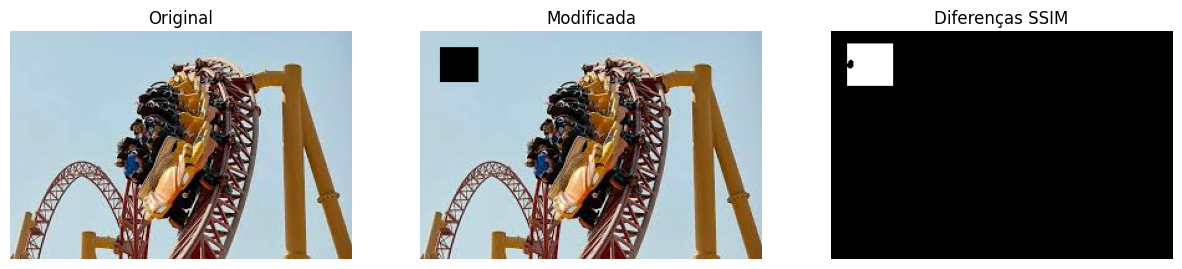

In [126]:
# Carregar as duas imagens
img_original = cv2.imread('original.png')
img_modificada = cv2.imread('modificada.png')

SSIM_imagem(img_original, img_modificada)

Nota-se uma percepção com certo ruído na região de mudança, correspondente ao retângulo branco.

Agora, vejamos a detecção da mudança em relação às imagens "mono_vermelha.png" e "mono_vermelha_1_preta.png":

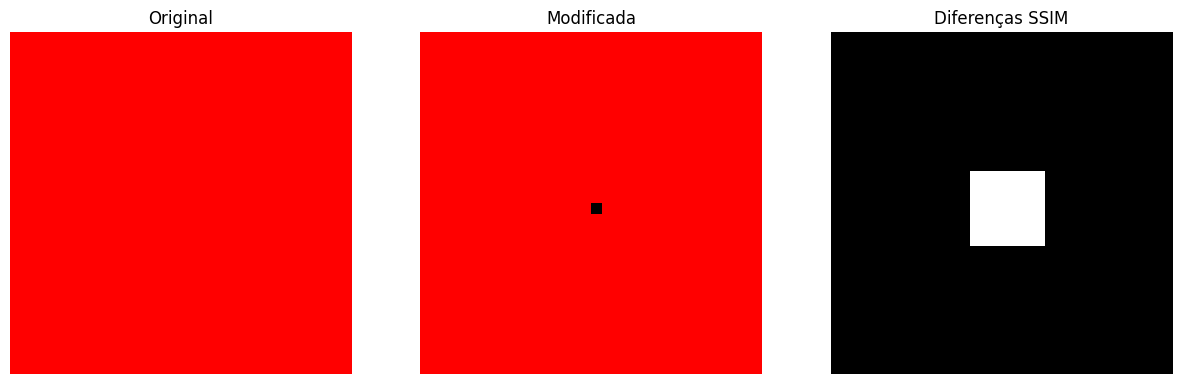

In [127]:
# Carregar as duas imagens
img_original = cv2.imread('mono_vermelha.png')
img_modificada = cv2.imread('mono_vermelha_1_preta.png')

SSIM_imagem(img_original, img_modificada)

Notamos que a região de mudança foi exageradamente ressaltada o que não se mostra muito pormissor!

Podemos agora testar uma mudança mais sutil e perceber o método SSIM mostrará mudanças mais sutis até mudanças mais drásticas. Começemos usando a mudança de "imagem_com_ruido[16, 16, 0] = 255" para "imagem_com_ruido[16, 16, 0] = 0" decaindo o gradiente de $5$ em $5$:

Gradiente = 255


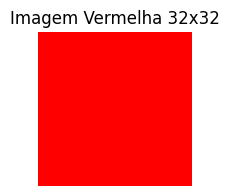

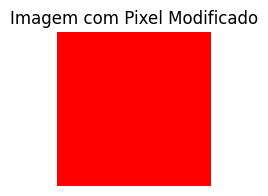

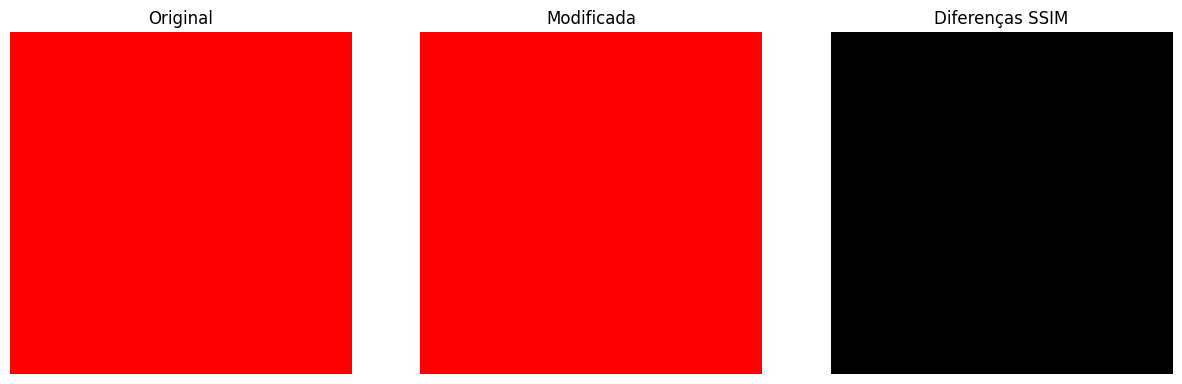

Gradiente = 250


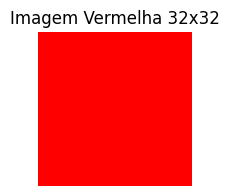

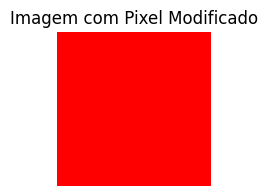

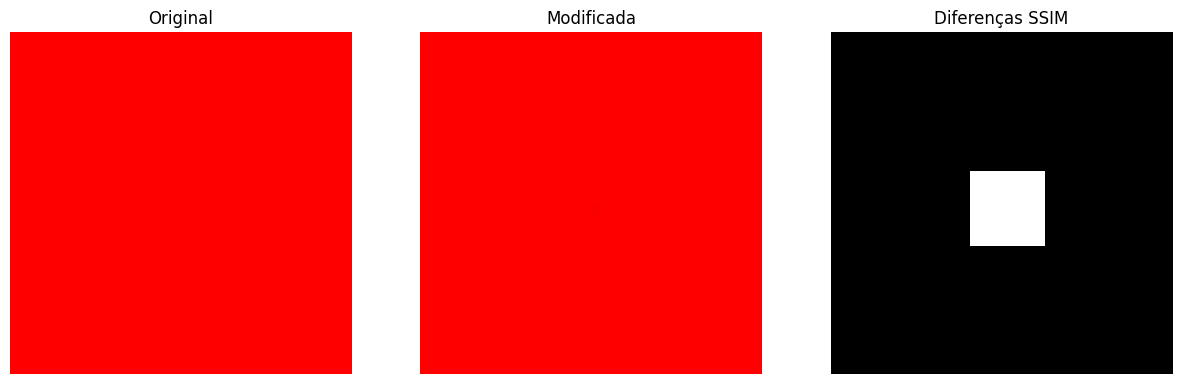

Gradiente = 245


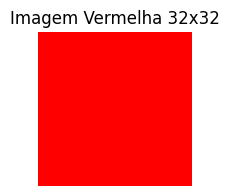

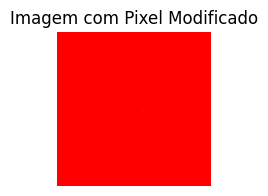

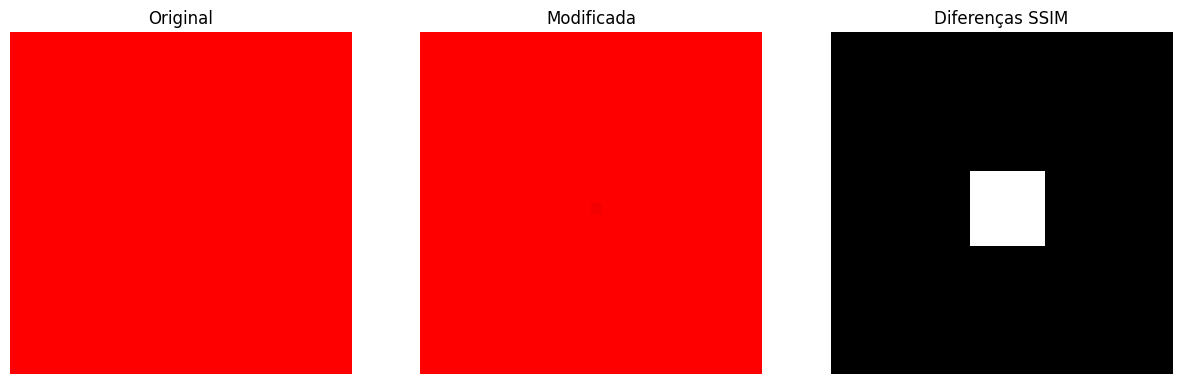

Gradiente = 240


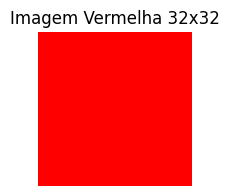

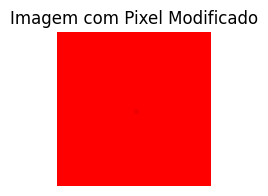

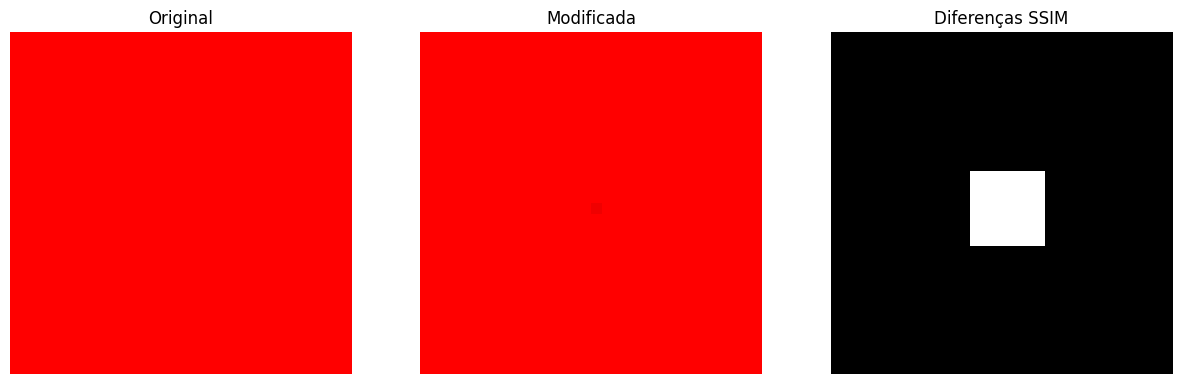

Gradiente = 235


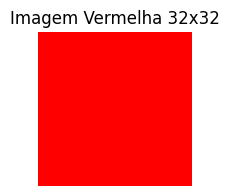

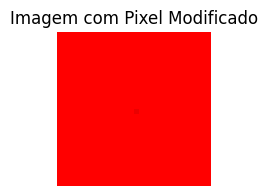

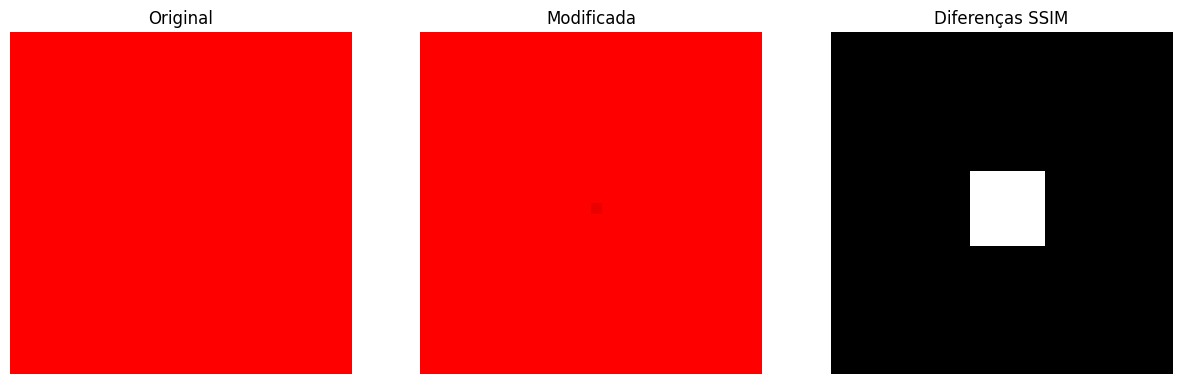

Gradiente = 230


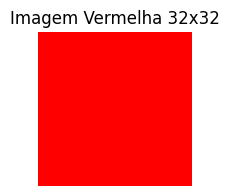

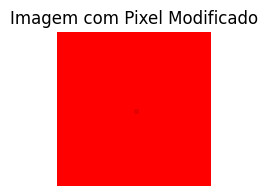

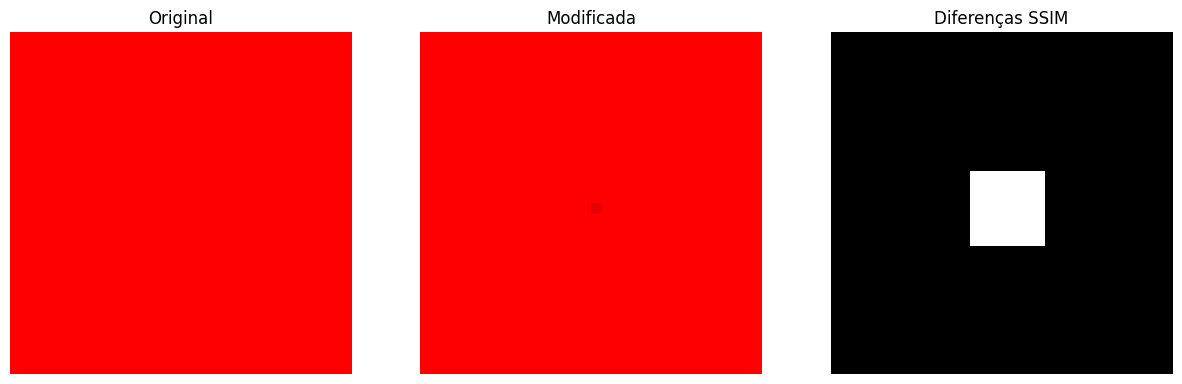

Gradiente = 225


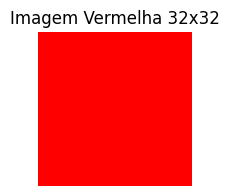

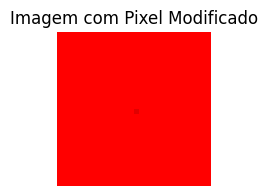

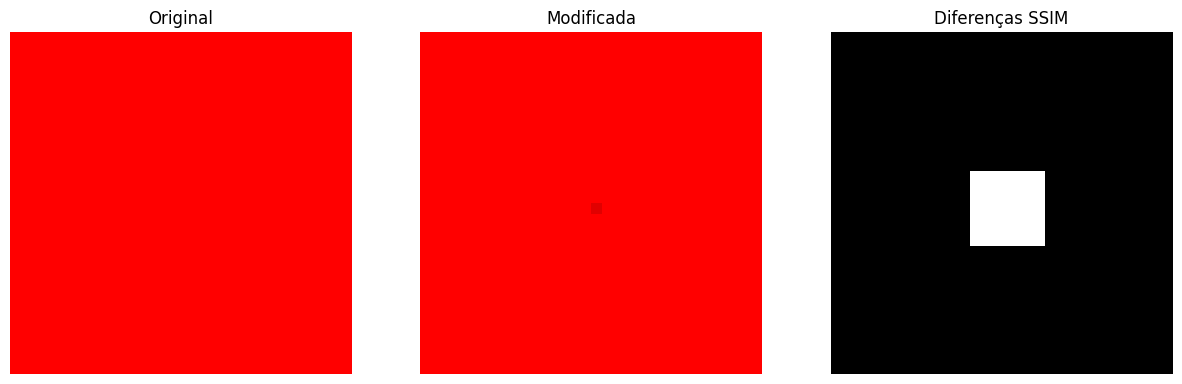

Gradiente = 220


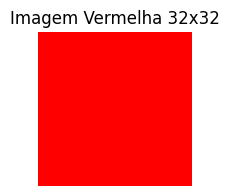

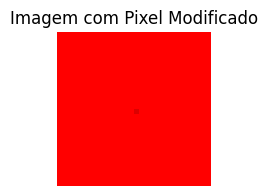

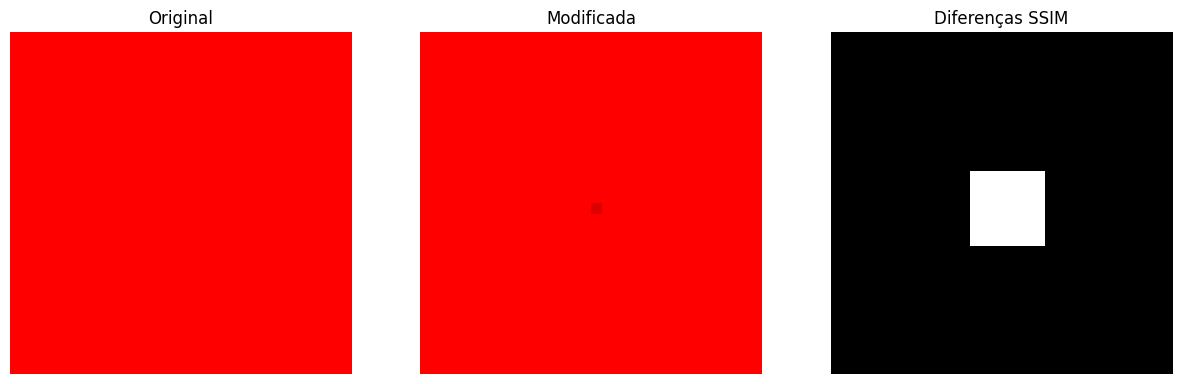

Gradiente = 215


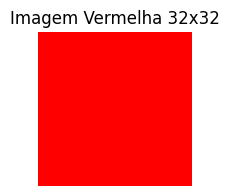

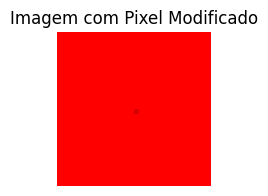

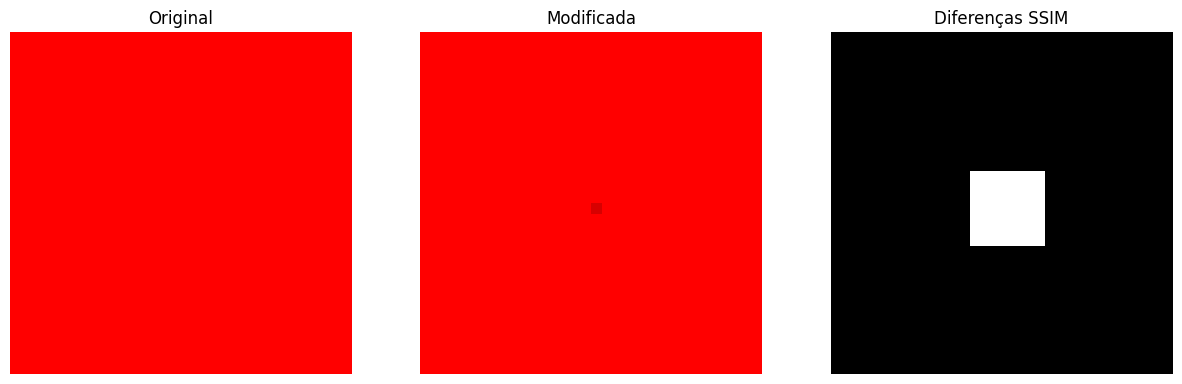

Gradiente = 210


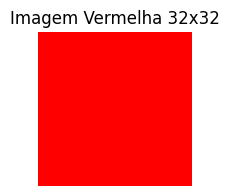

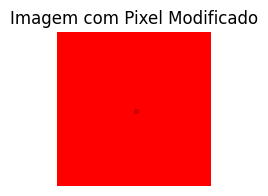

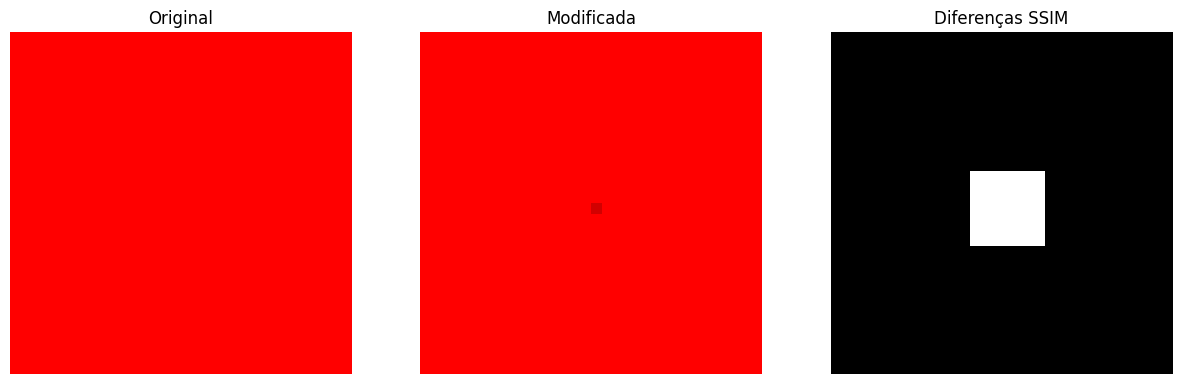

Gradiente = 205


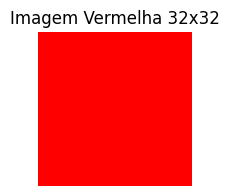

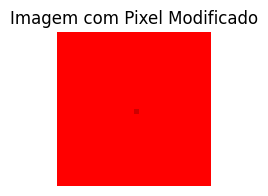

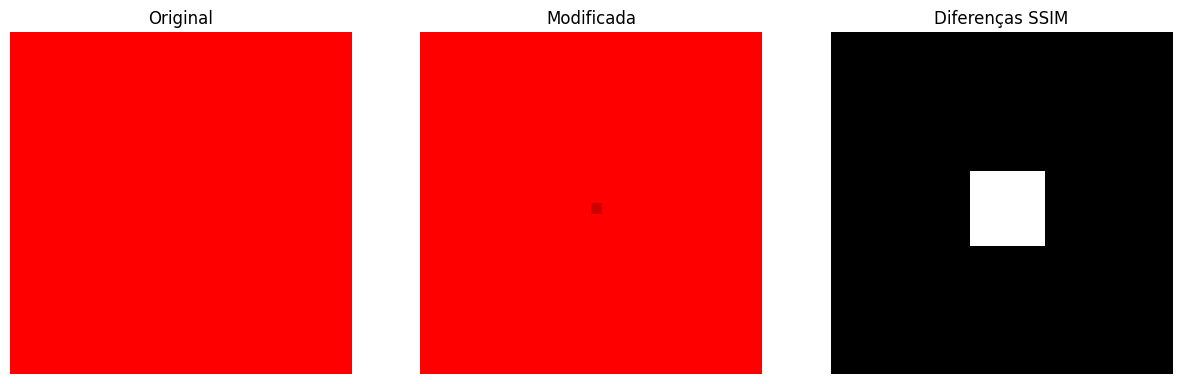

Gradiente = 200


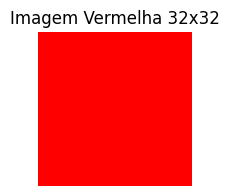

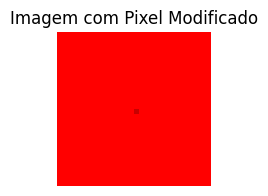

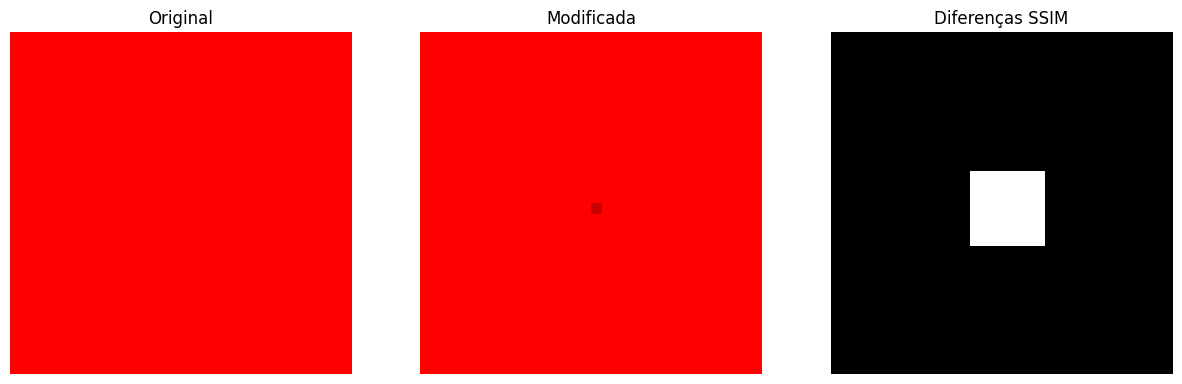

Gradiente = 195


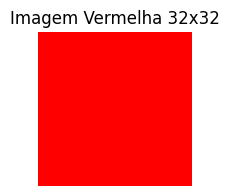

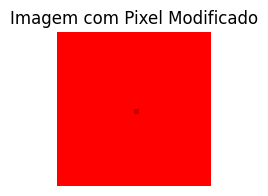

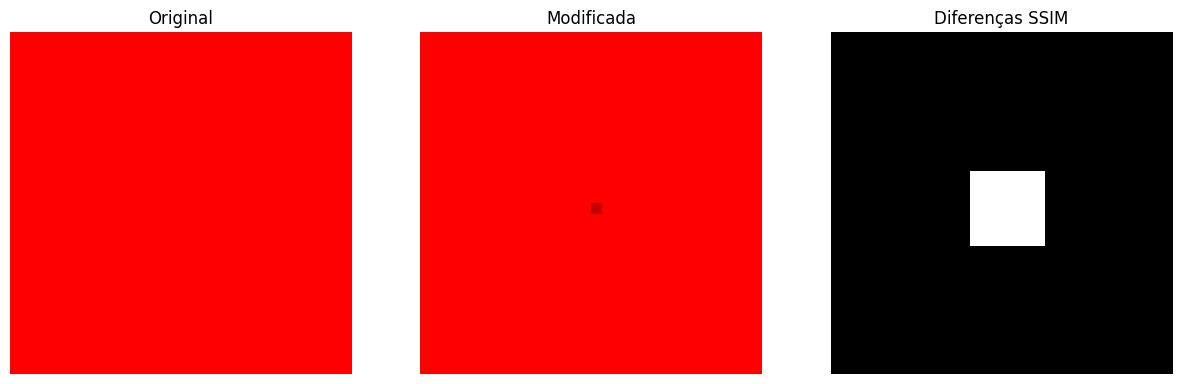

Gradiente = 190


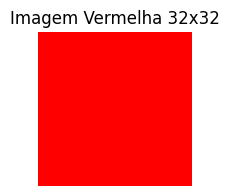

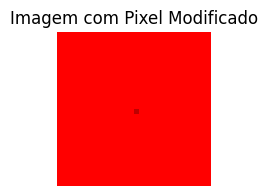

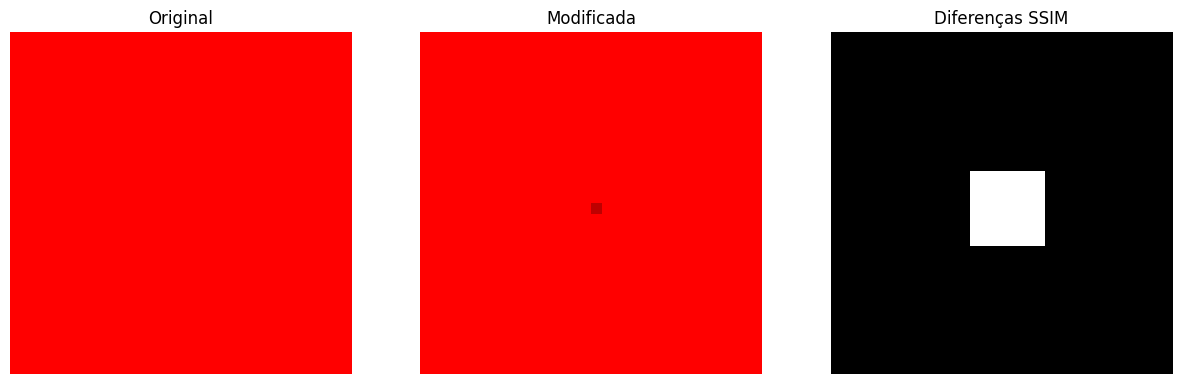

Gradiente = 185


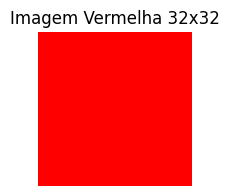

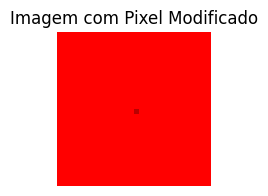

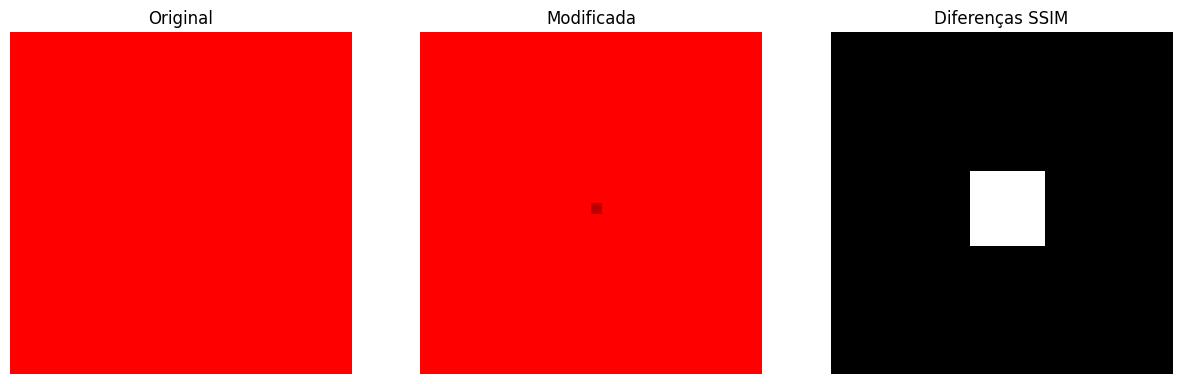

Gradiente = 180


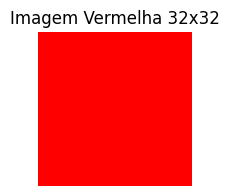

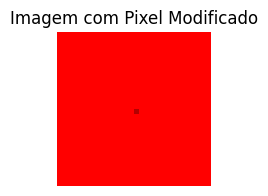

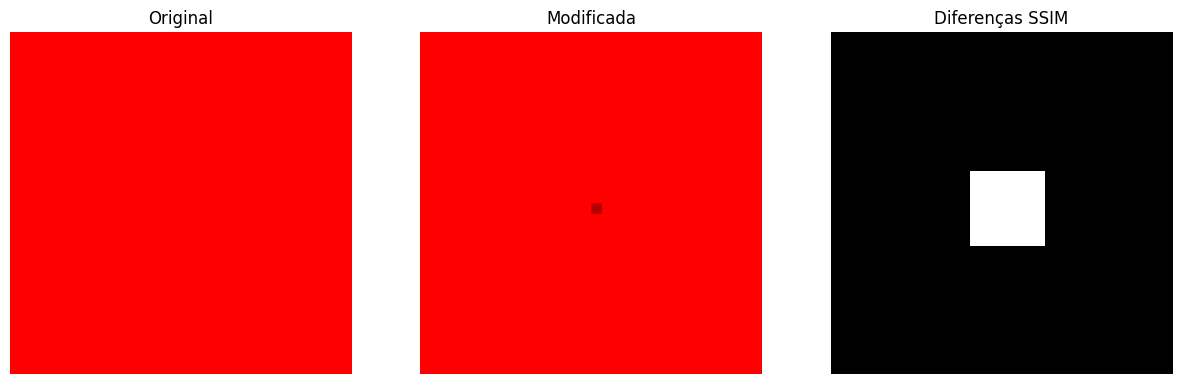

Gradiente = 175


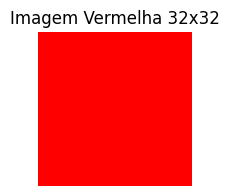

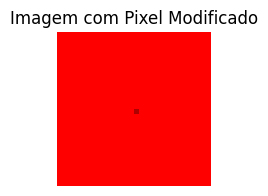

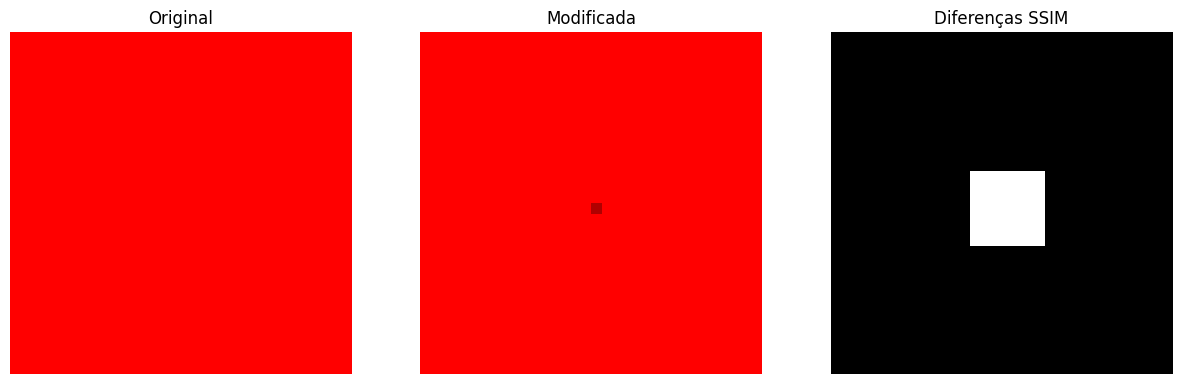

Gradiente = 170


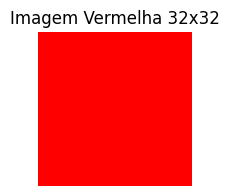

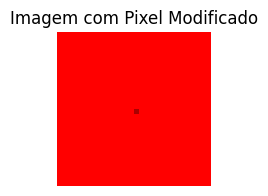

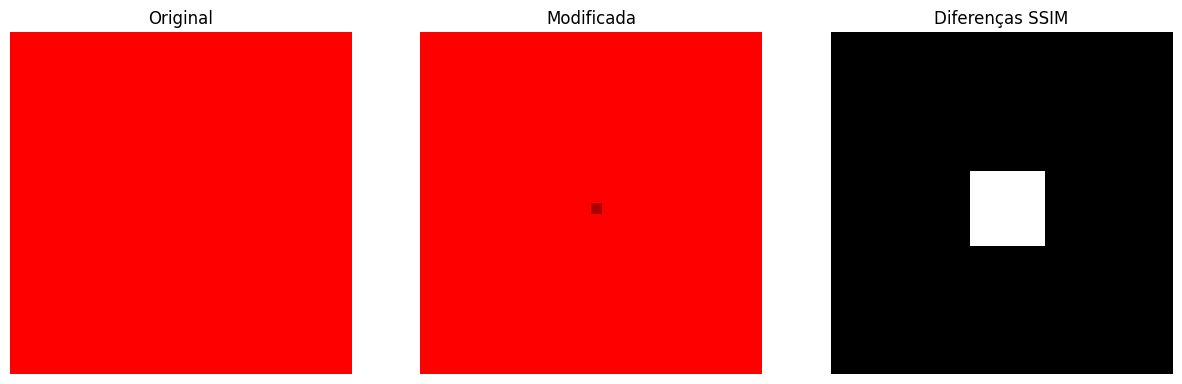

Gradiente = 165


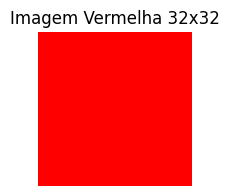

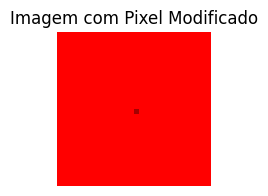

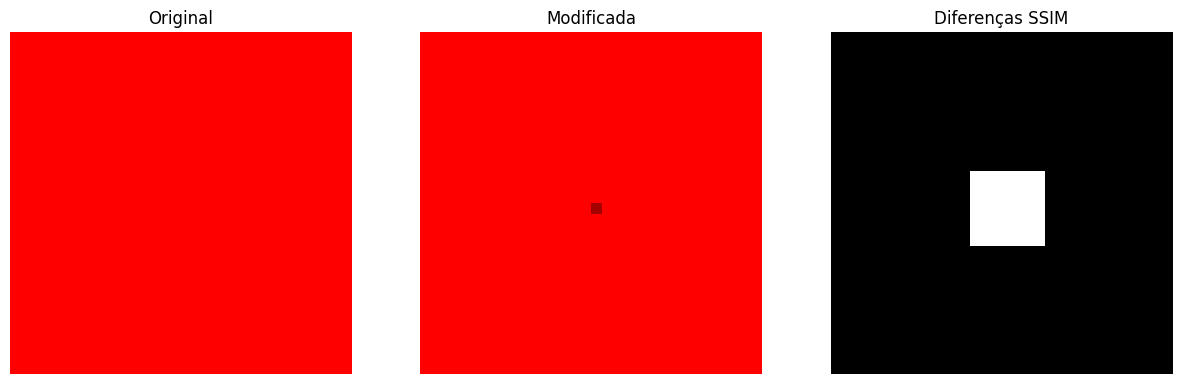

Gradiente = 160


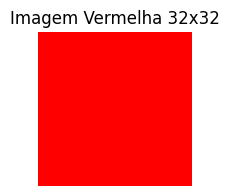

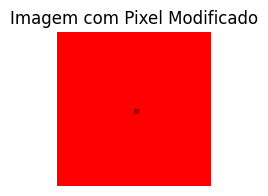

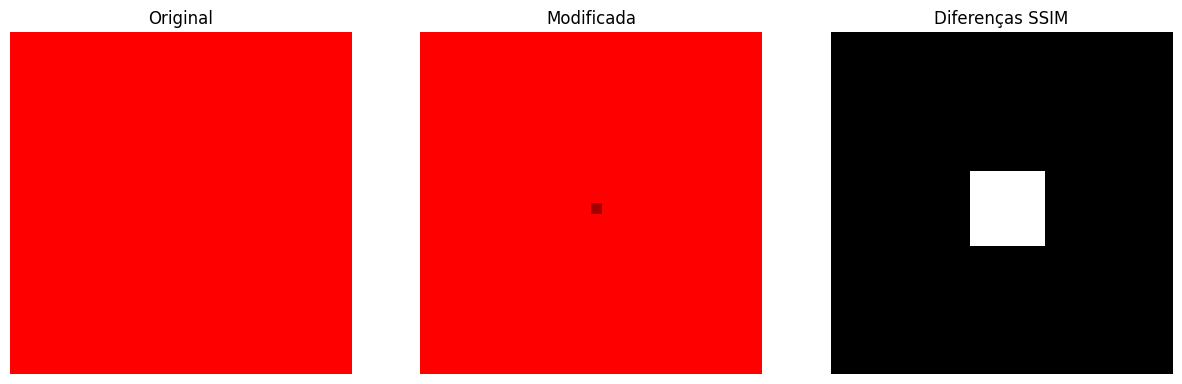

Gradiente = 155


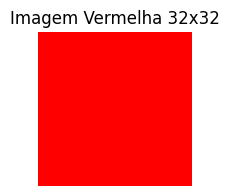

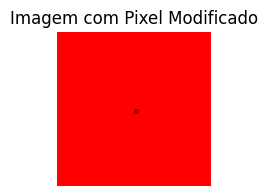

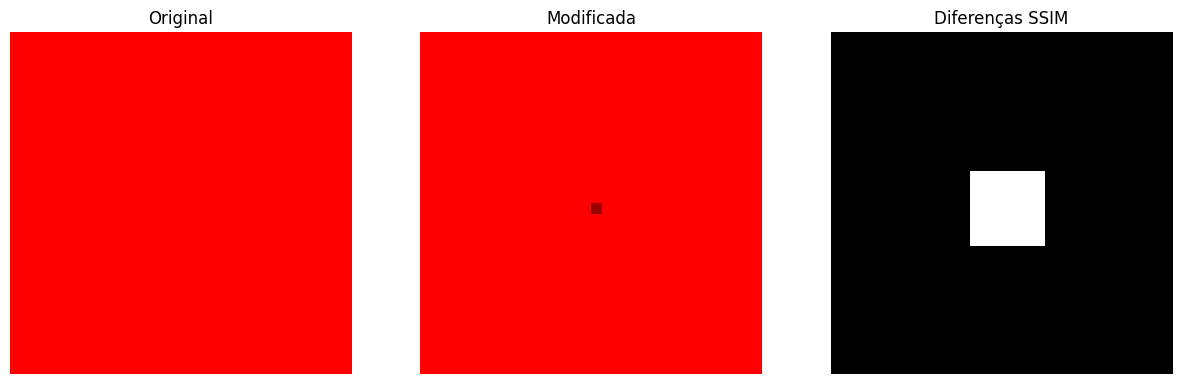

Gradiente = 150


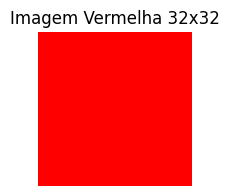

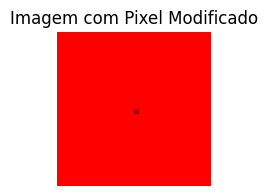

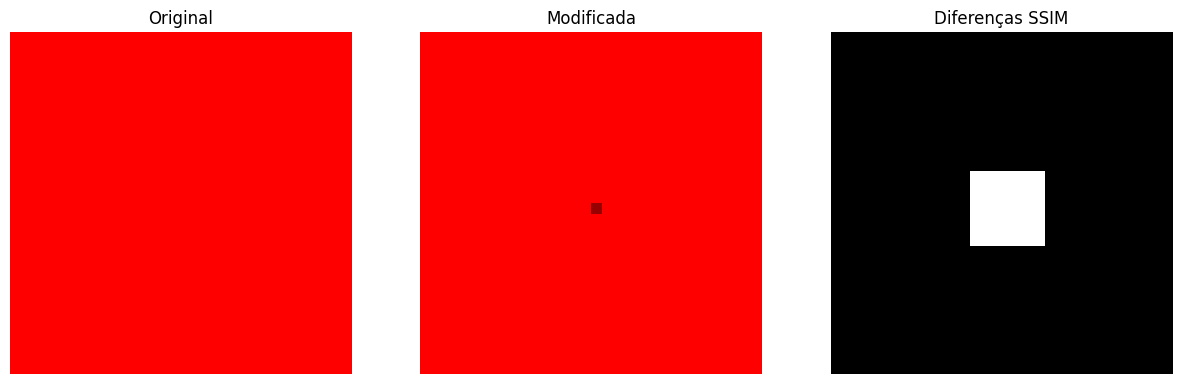

Gradiente = 145


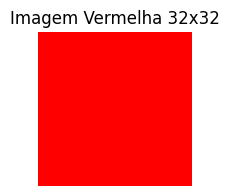

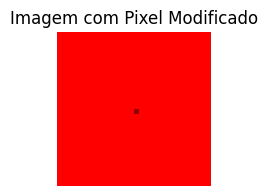

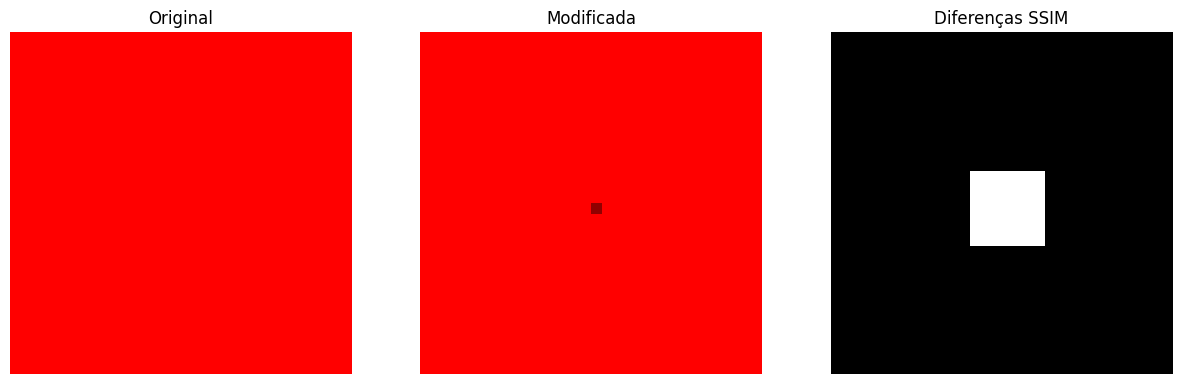

Gradiente = 140


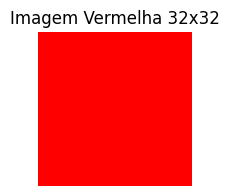

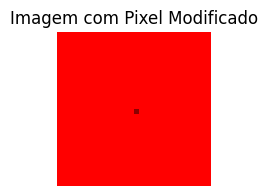

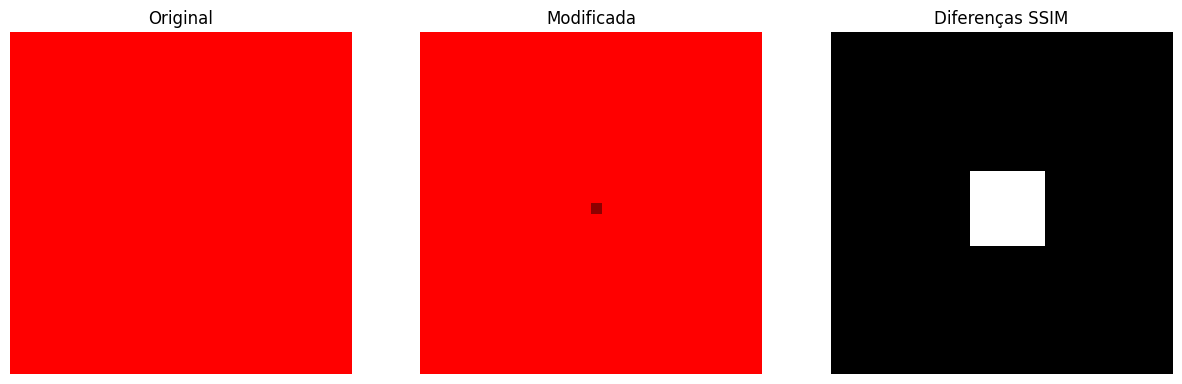

Gradiente = 135


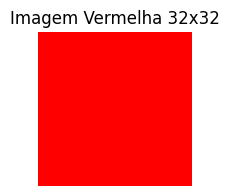

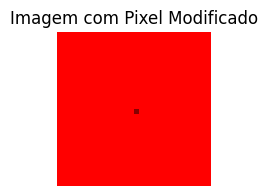

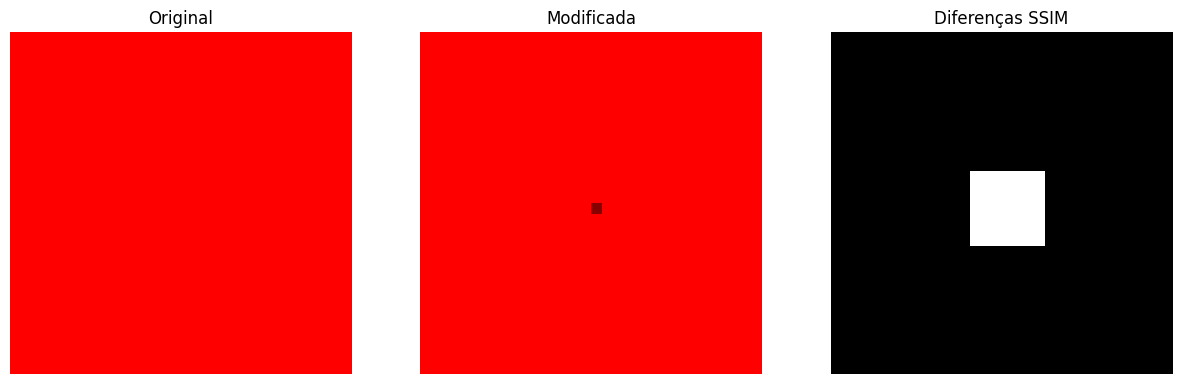

Gradiente = 130


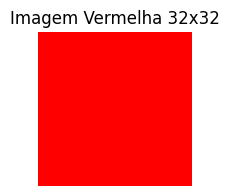

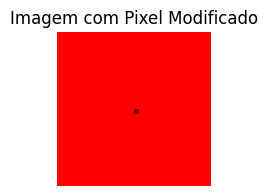

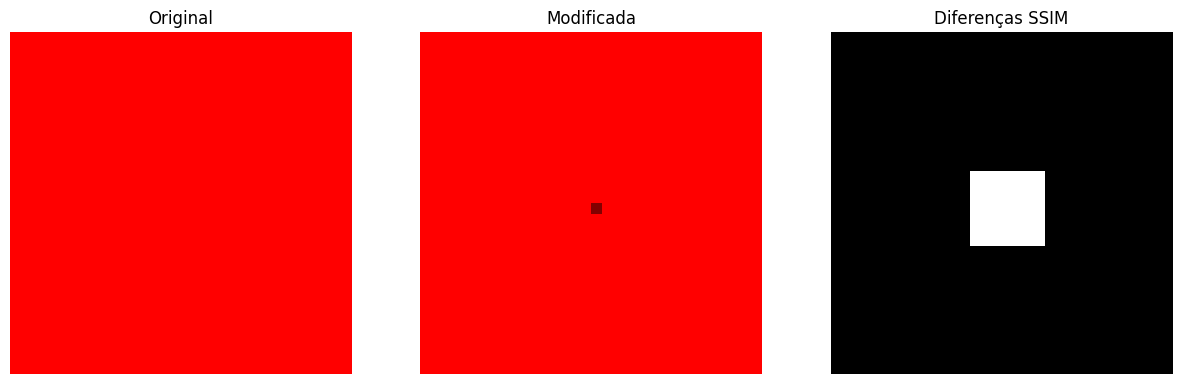

Gradiente = 125


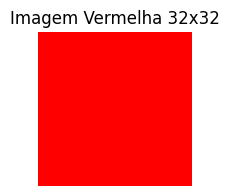

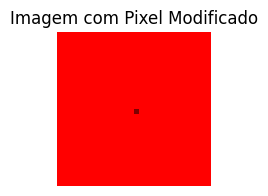

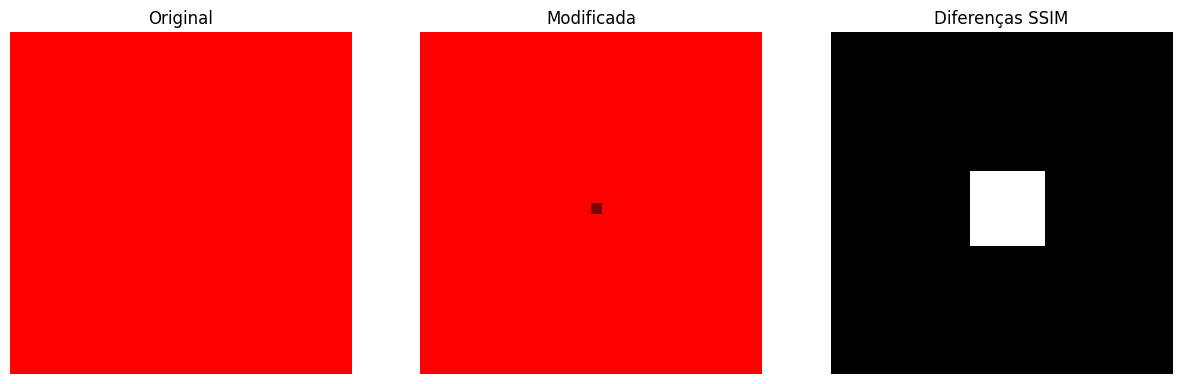

Gradiente = 120


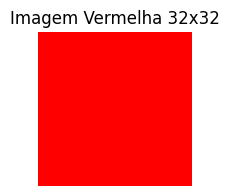

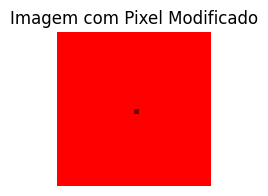

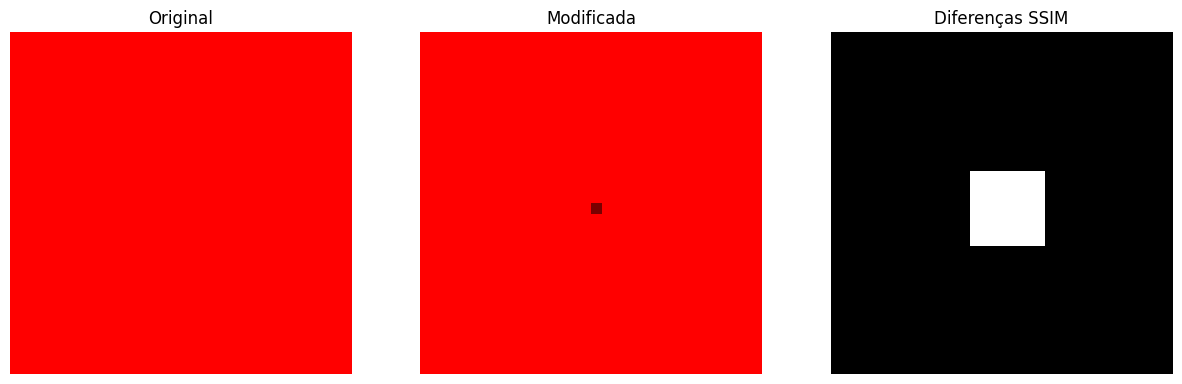

Gradiente = 115


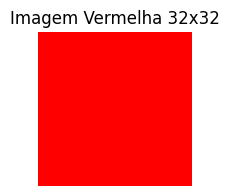

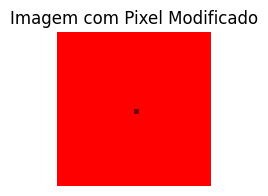

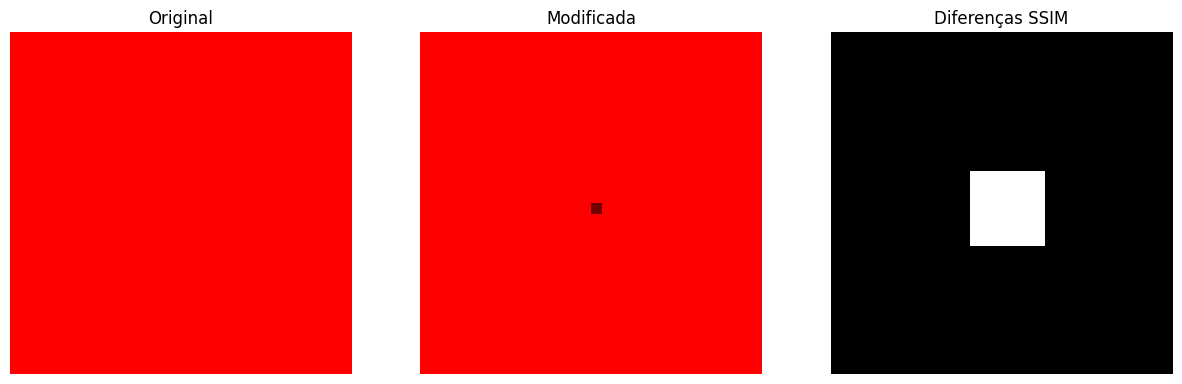

Gradiente = 110


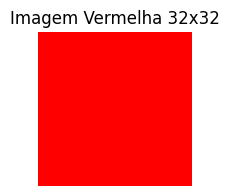

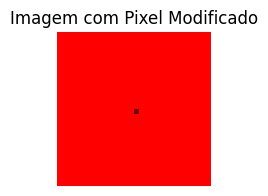

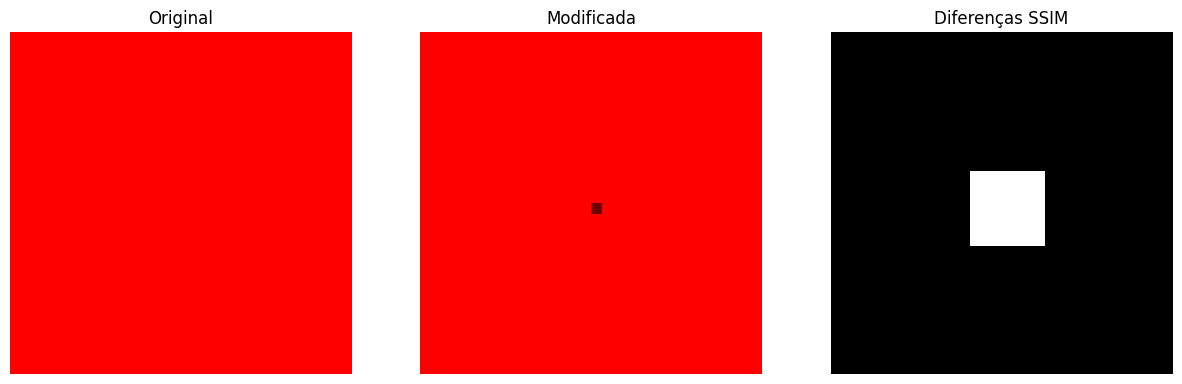

Gradiente = 105


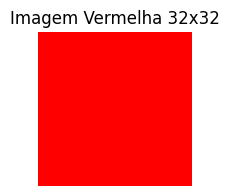

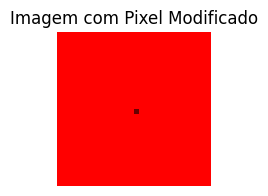

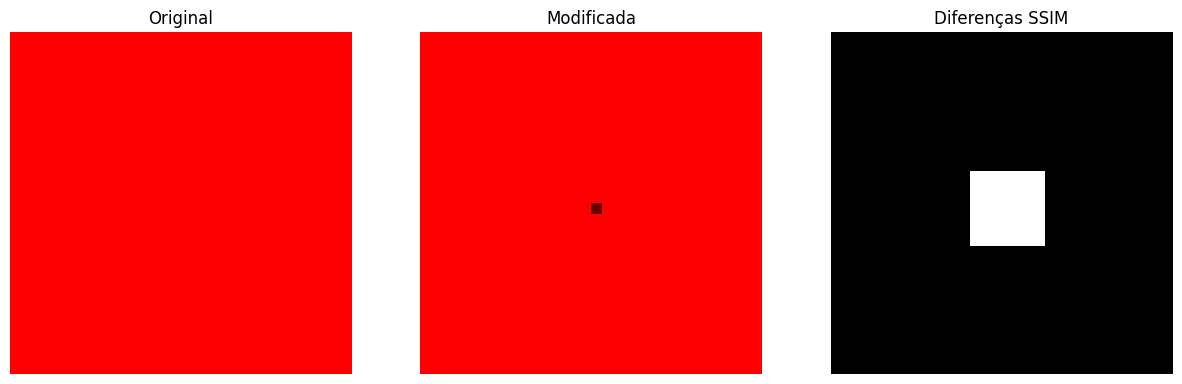

Gradiente = 100


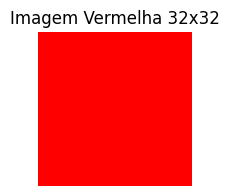

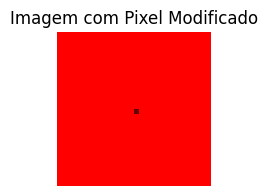

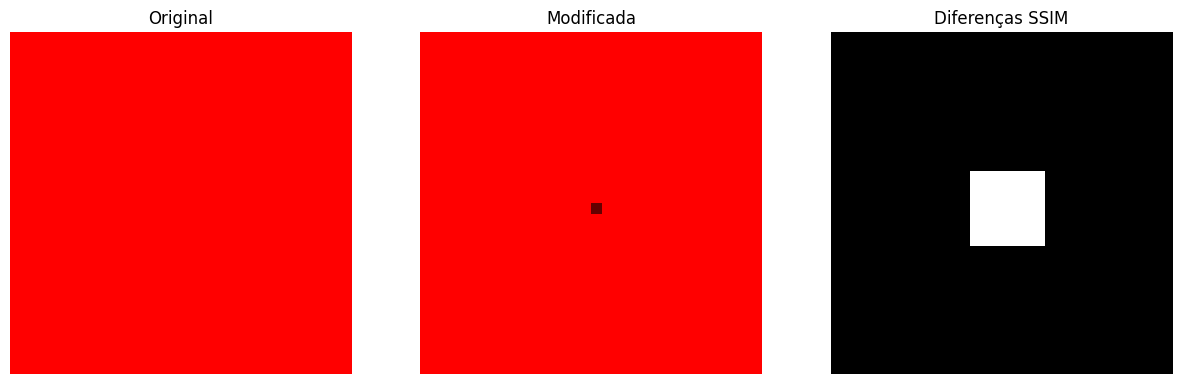

Gradiente = 95


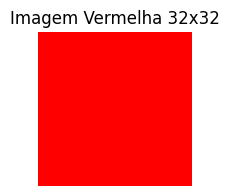

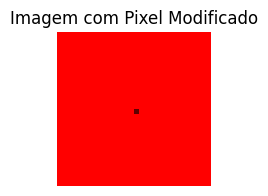

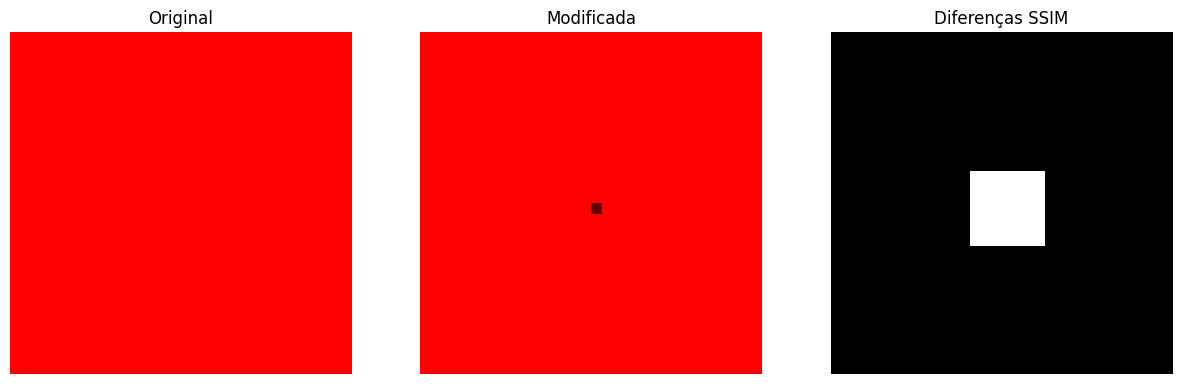

Gradiente = 90


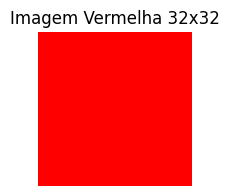

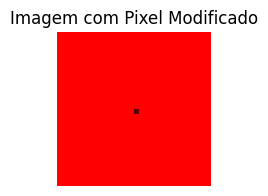

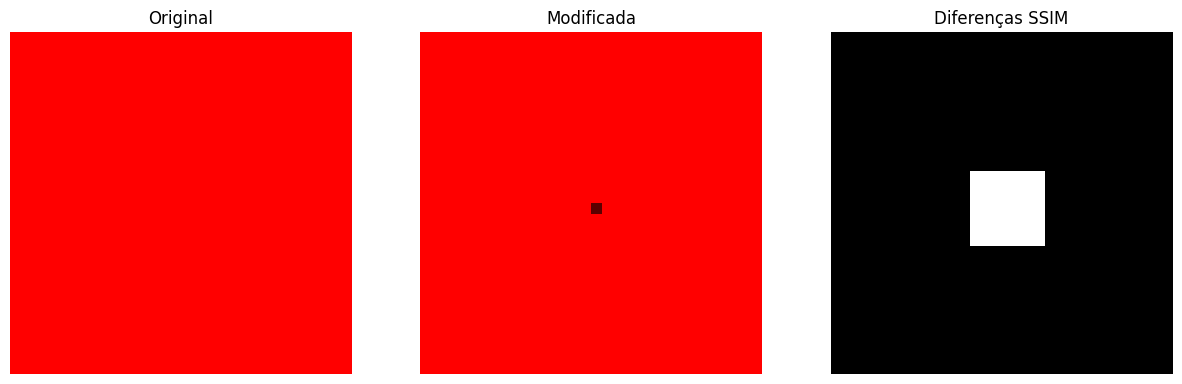

Gradiente = 85


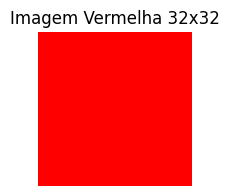

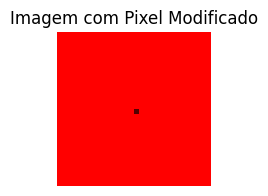

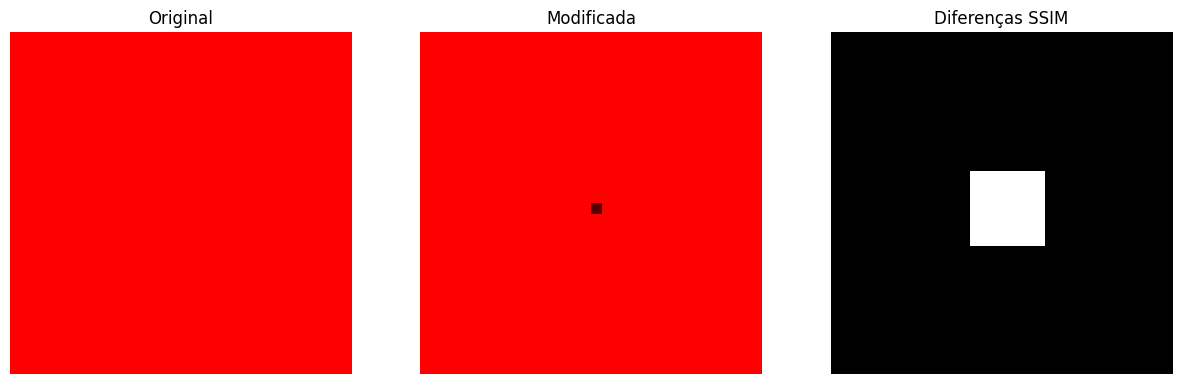

Gradiente = 80


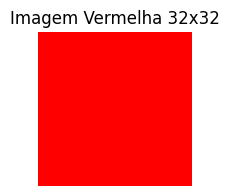

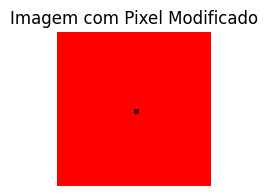

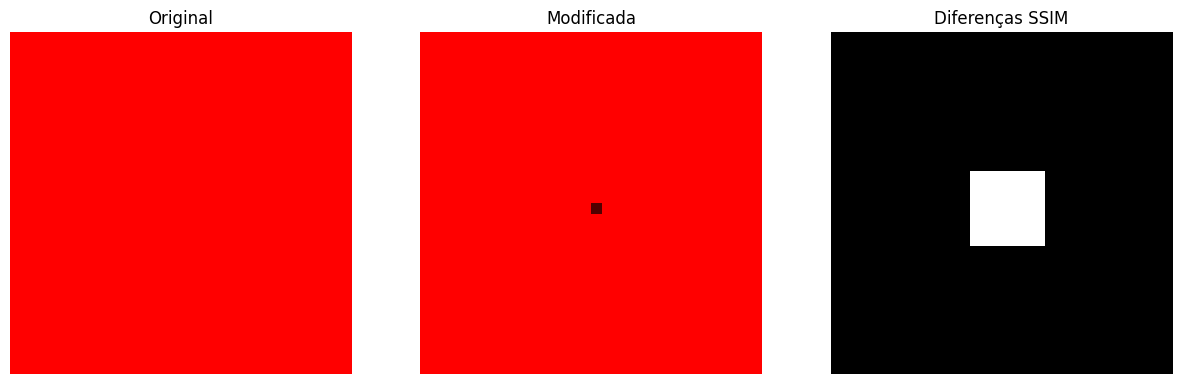

Gradiente = 75


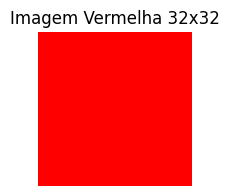

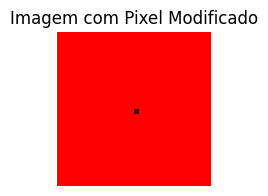

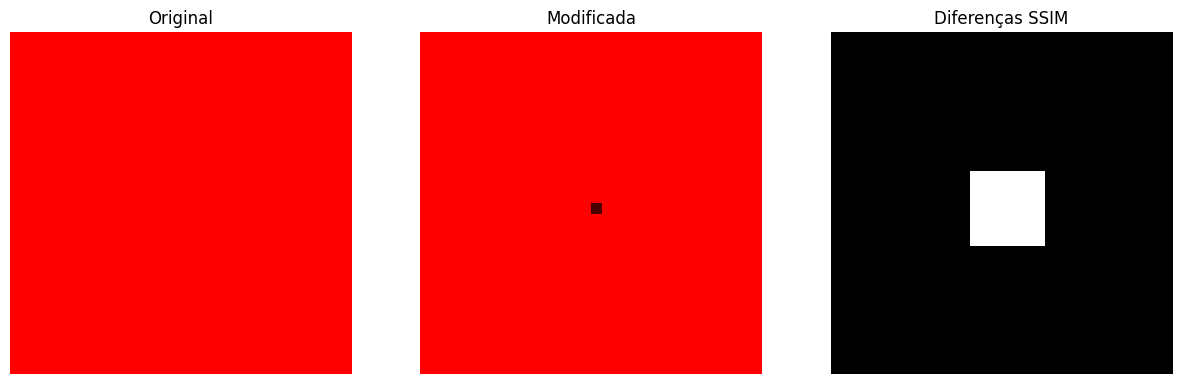

Gradiente = 70


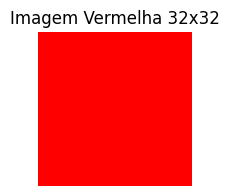

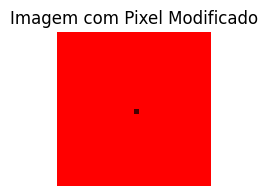

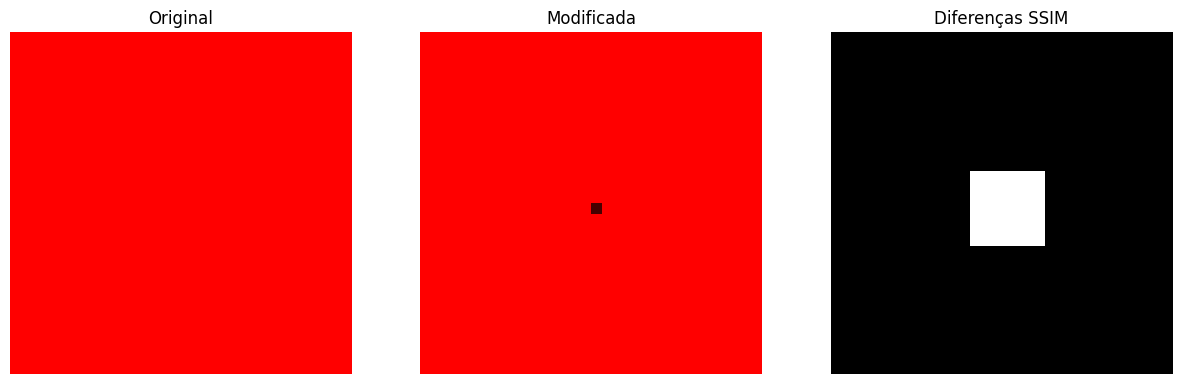

Gradiente = 65


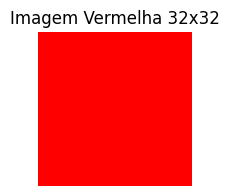

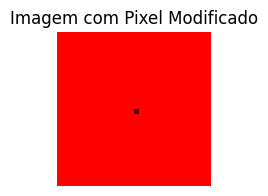

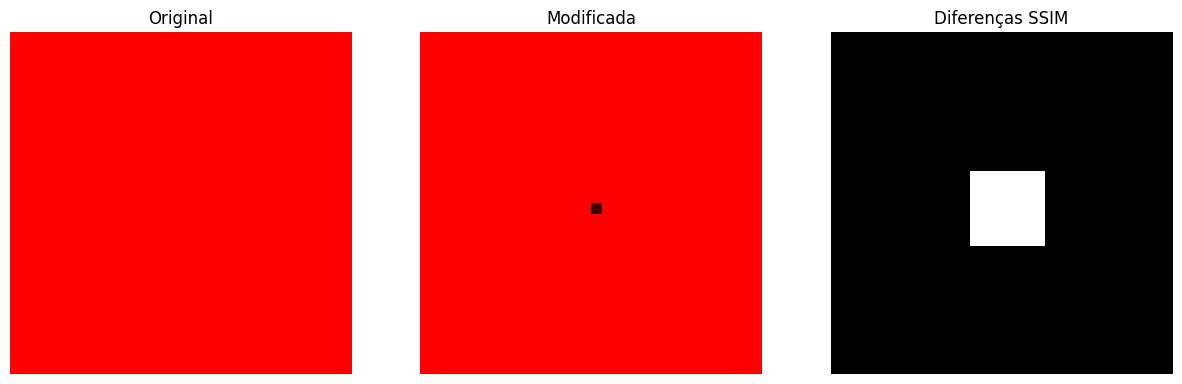

Gradiente = 60


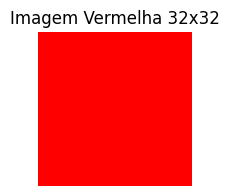

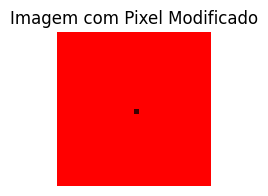

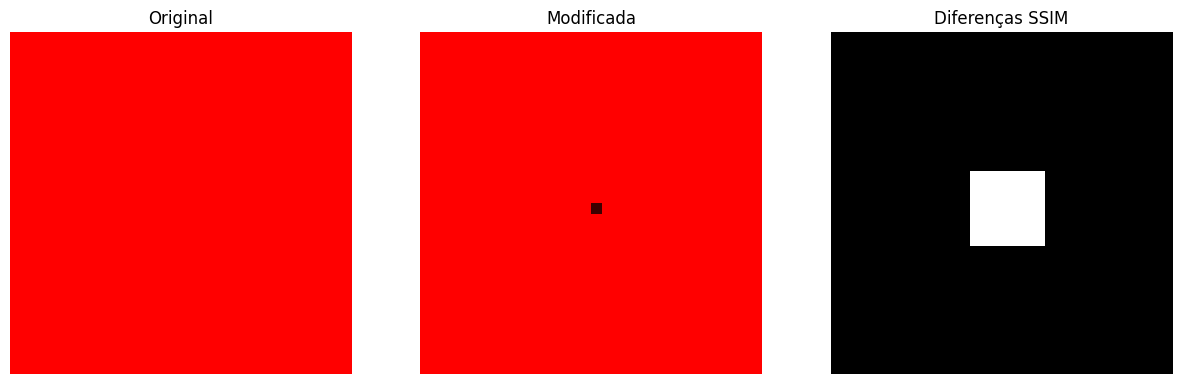

Gradiente = 55


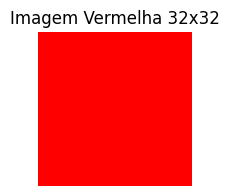

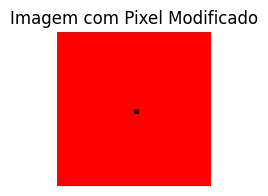

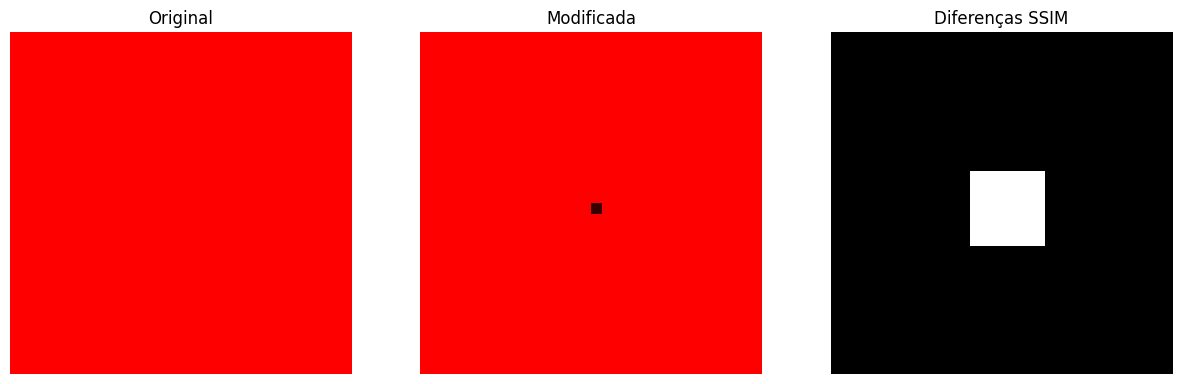

Gradiente = 50


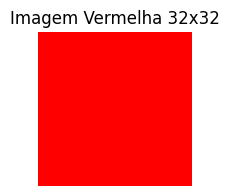

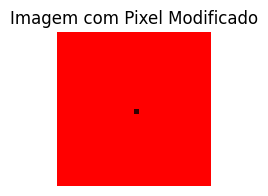

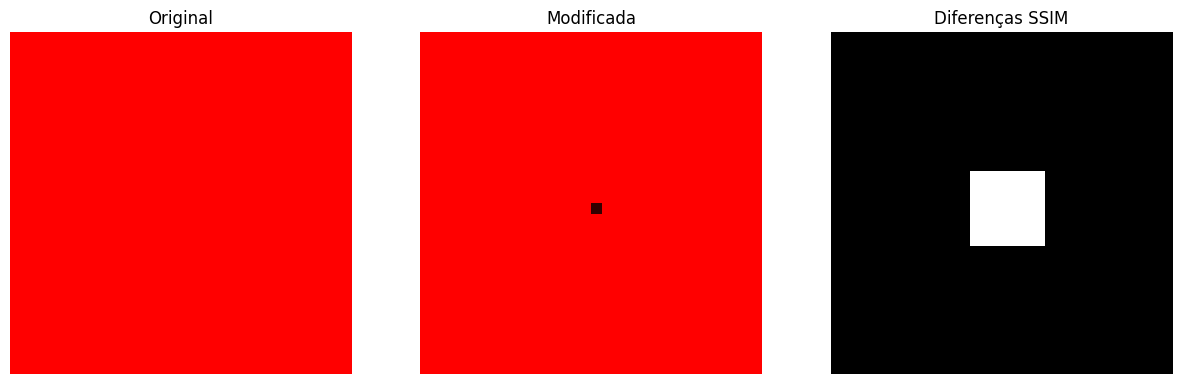

Gradiente = 45


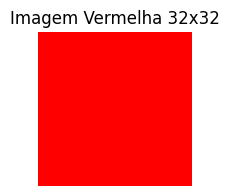

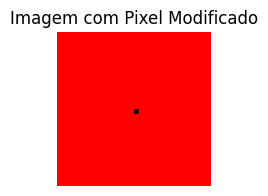

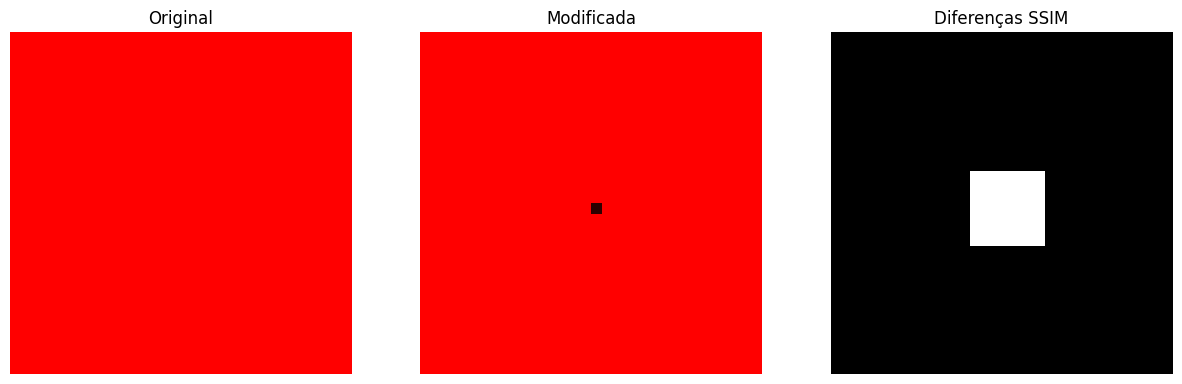

Gradiente = 40


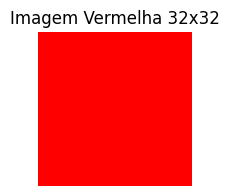

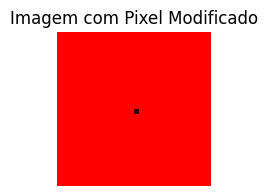

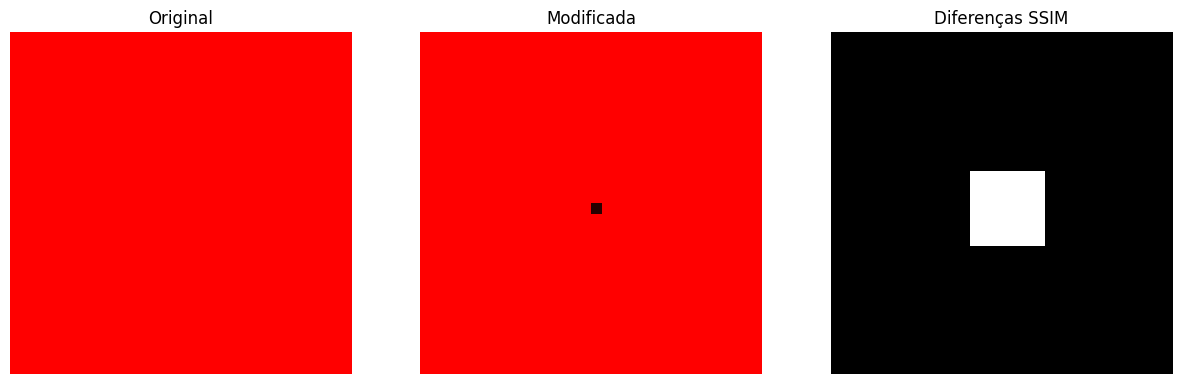

Gradiente = 35


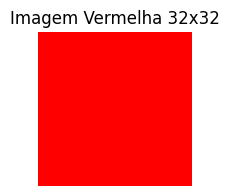

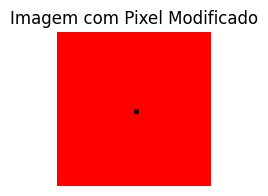

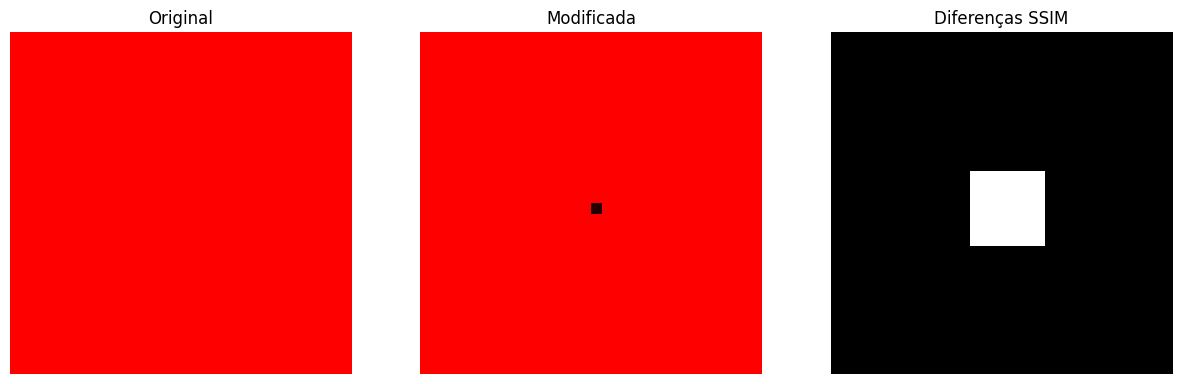

Gradiente = 30


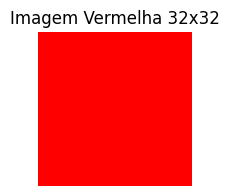

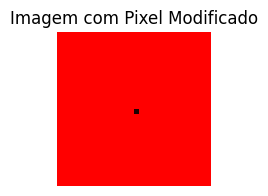

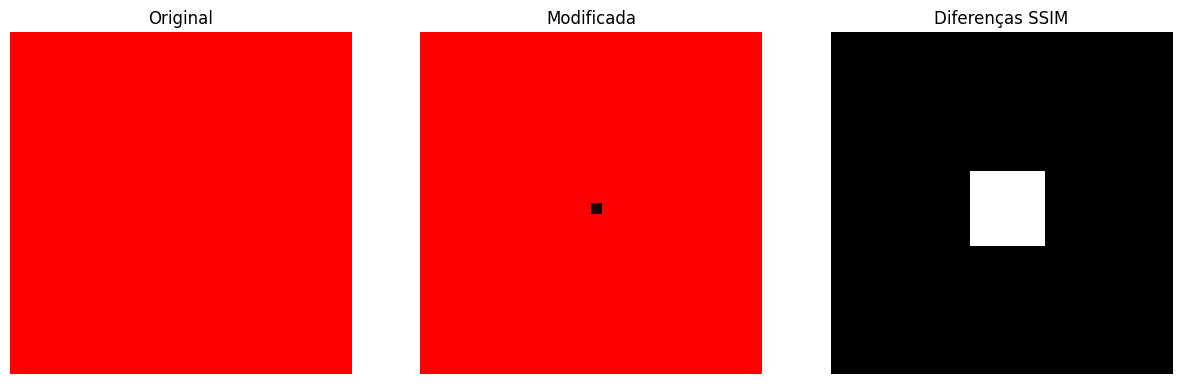

Gradiente = 25


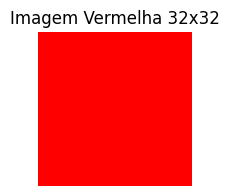

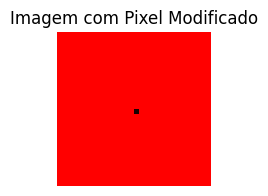

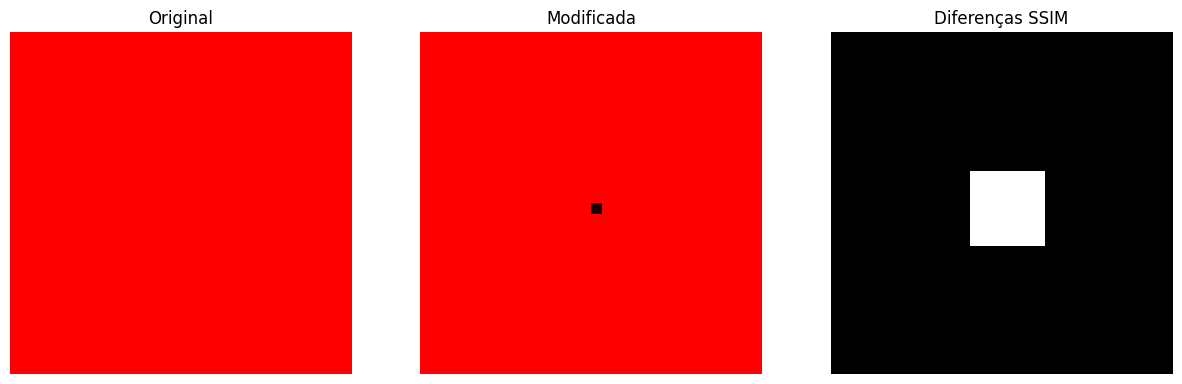

Gradiente = 20


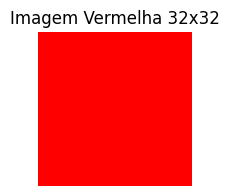

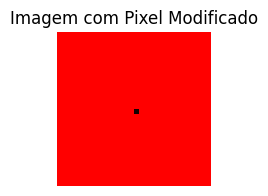

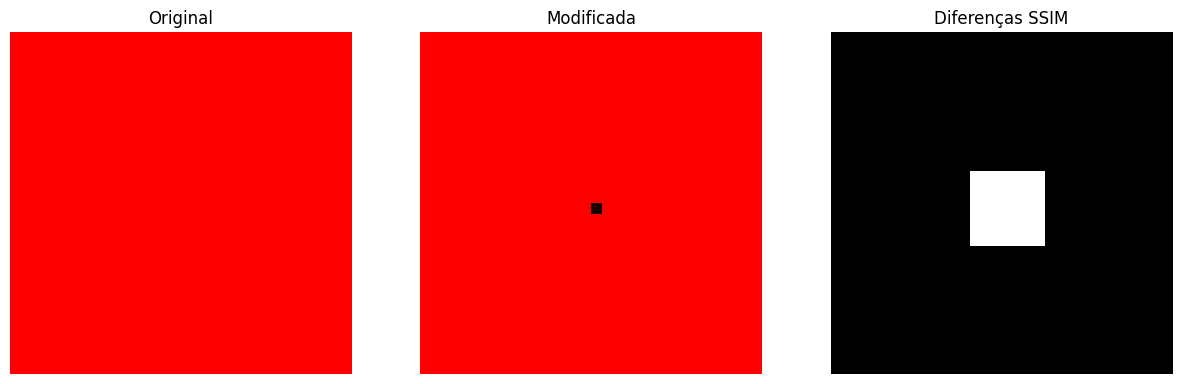

Gradiente = 15


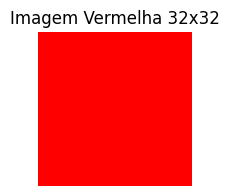

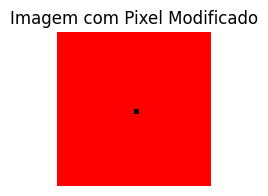

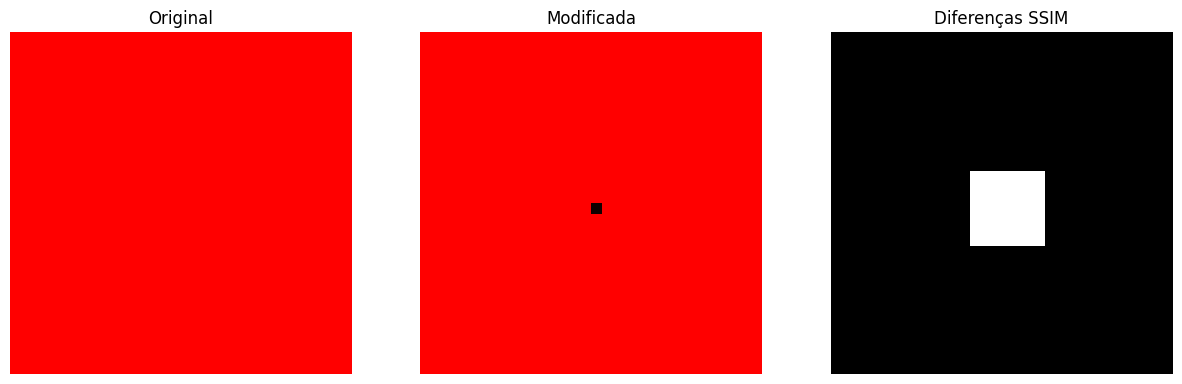

Gradiente = 10


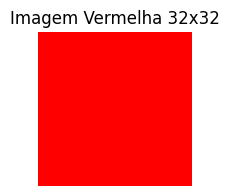

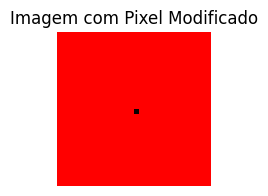

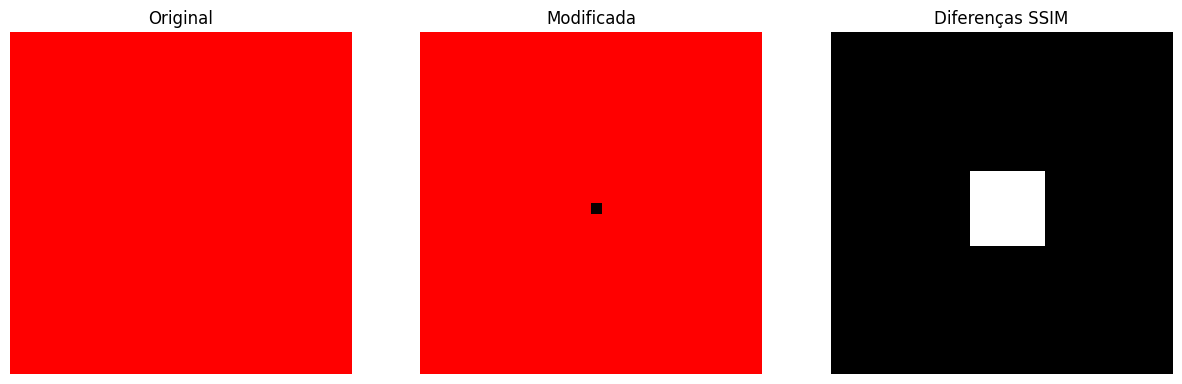

Gradiente = 5


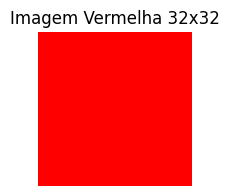

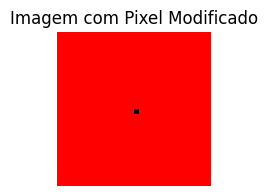

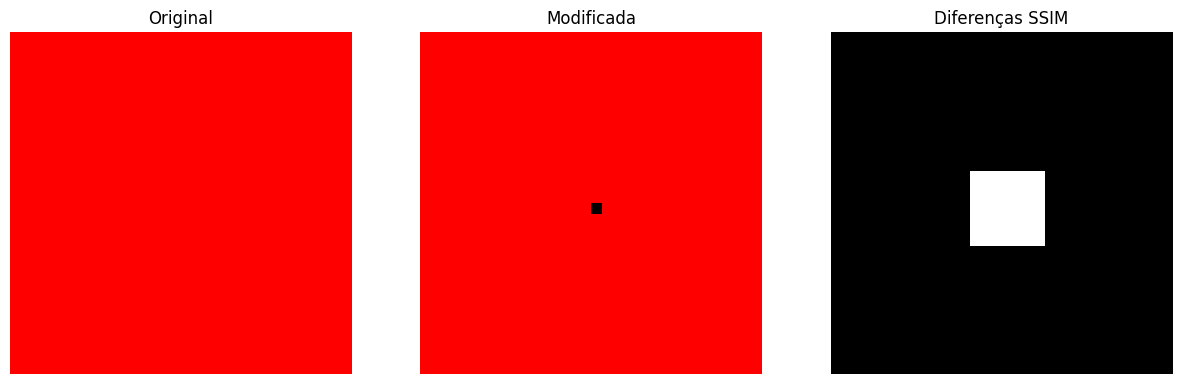

In [129]:
for i in range(255,0,-5):
    # Imprimindo gradientes
    print(f'Gradiente = {i}')
    
    # Gerar imagens
    gerar_img_mono_sem_e_com_ruido(i)
    
    # Carregar as duas imagens
    img_original = cv2.imread('img_sem_ruido.png')
    img_modificada = cv2.imread('img_com_ruido.png')

    # Executar a função
    SSIM_imagem(img_original, img_modificada)    

Embora a mudança foi bastante ressaltada devido à área branca notamos que esta foi mais sensível à mudança no gradiente já percebendo uma mudança a partir do $250$ ante $150$ do método de subtração de imagens. Na veradade, a partir de $253$ e gradientes inferiores a percepção de mudança já ocorre.

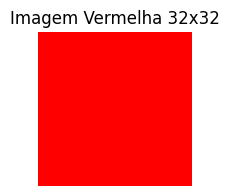

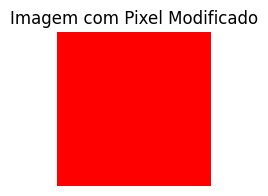

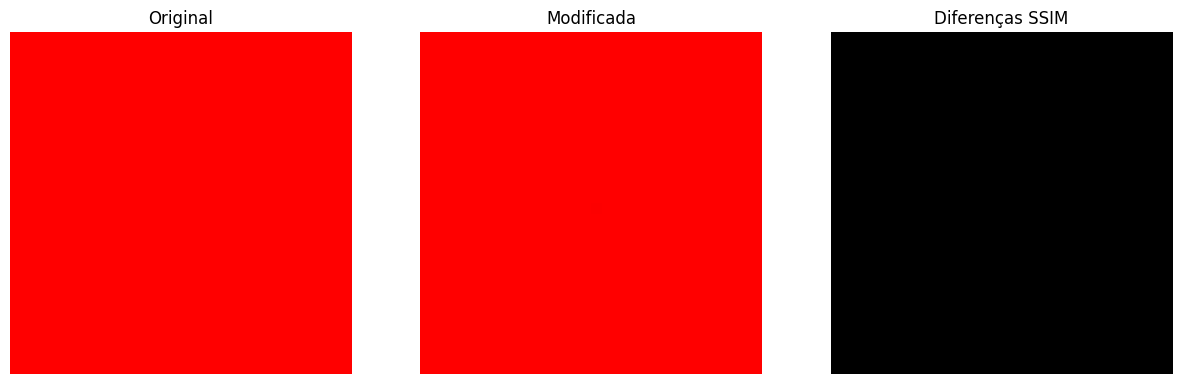

In [134]:
gerar_img_mono_sem_e_com_ruido(253)

# Carregar as duas imagens
img_original = cv2.imread('img_sem_ruido.png')
img_modificada = cv2.imread('img_com_ruido.png')

# Executar a função
SSIM_imagem(img_original, img_modificada)  

Vejamos agora a percepção considerando uma inserção de modificações maiores $5 \times 5$ e, em seguida $31 \times 31$:

Gradiente = 255


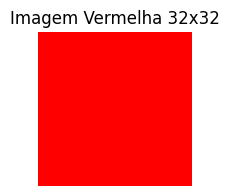

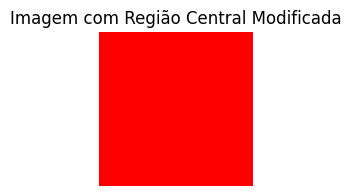

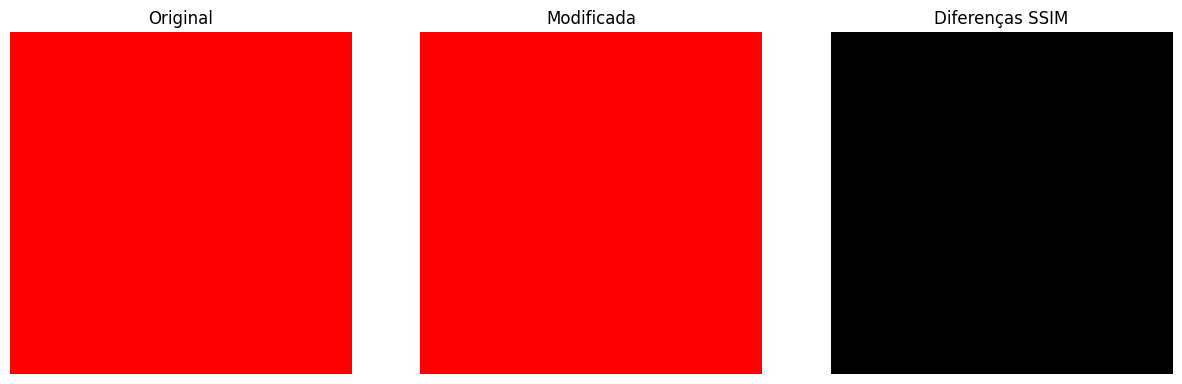

Gradiente = 250


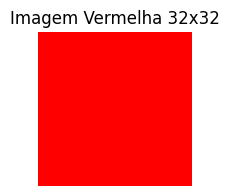

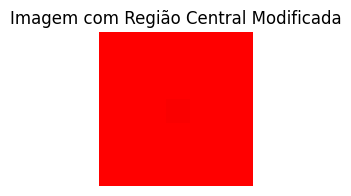

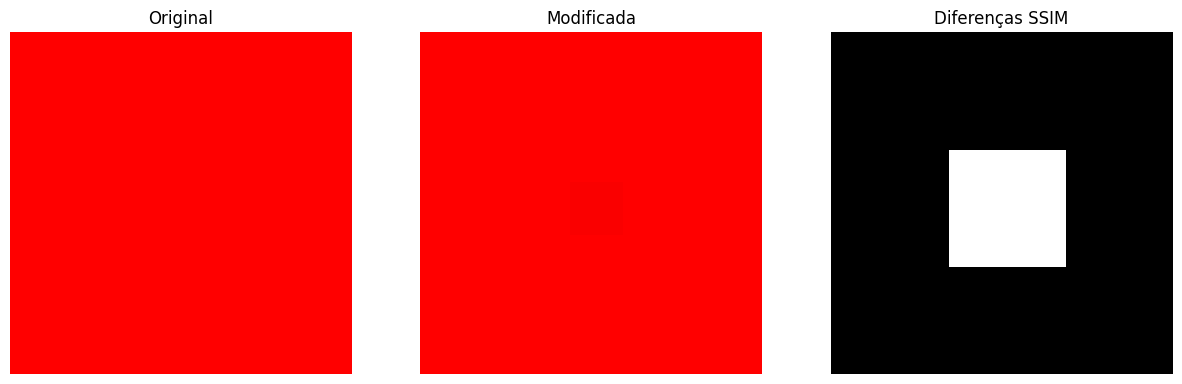

Gradiente = 245


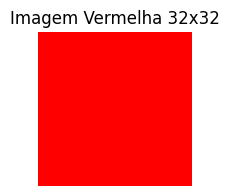

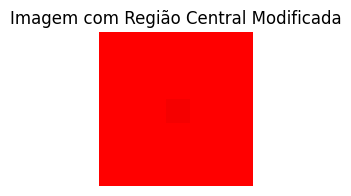

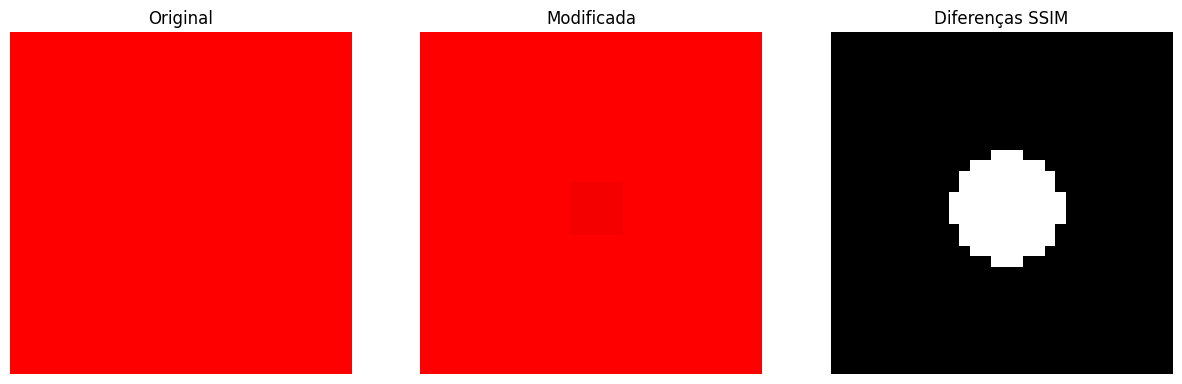

Gradiente = 240


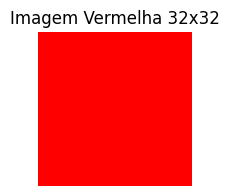

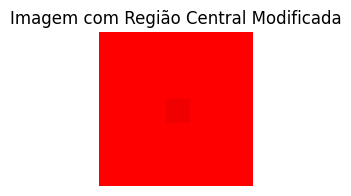

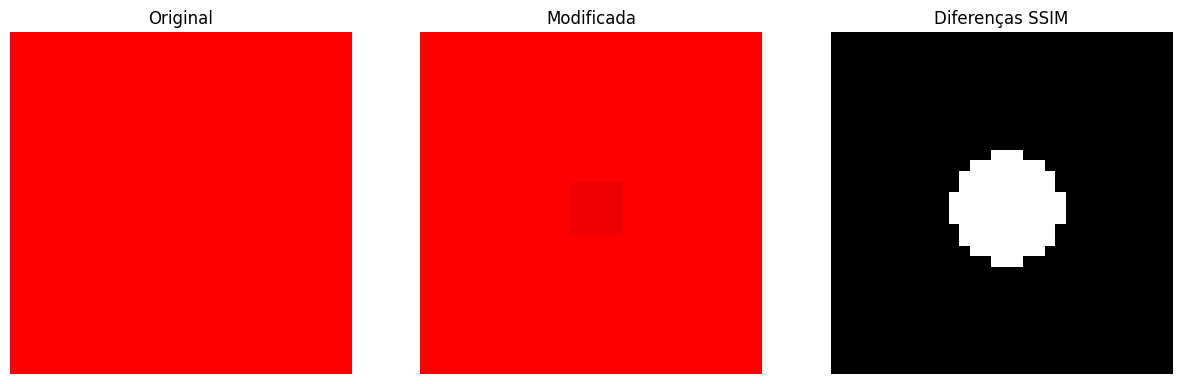

Gradiente = 235


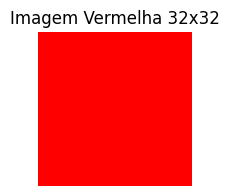

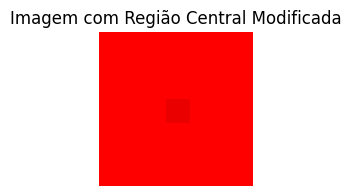

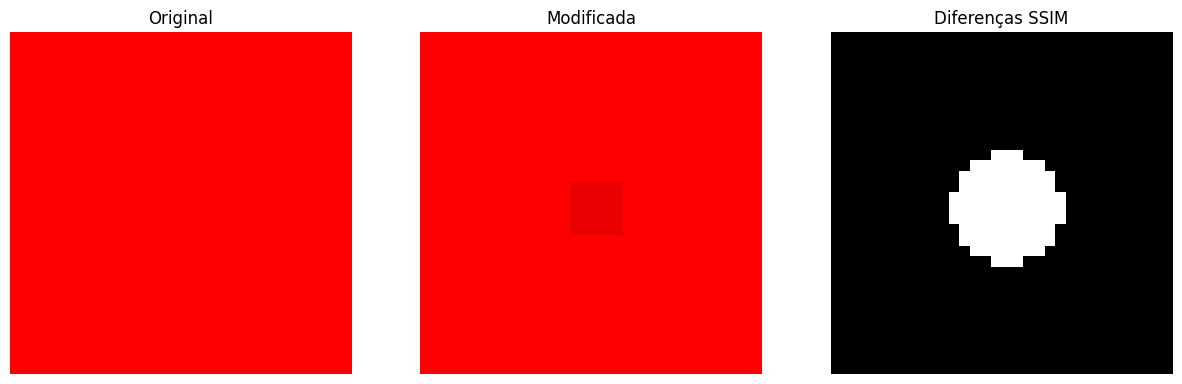

Gradiente = 230


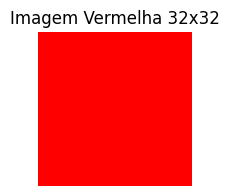

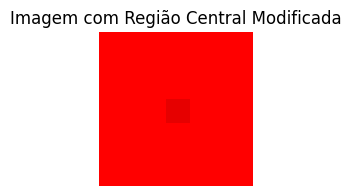

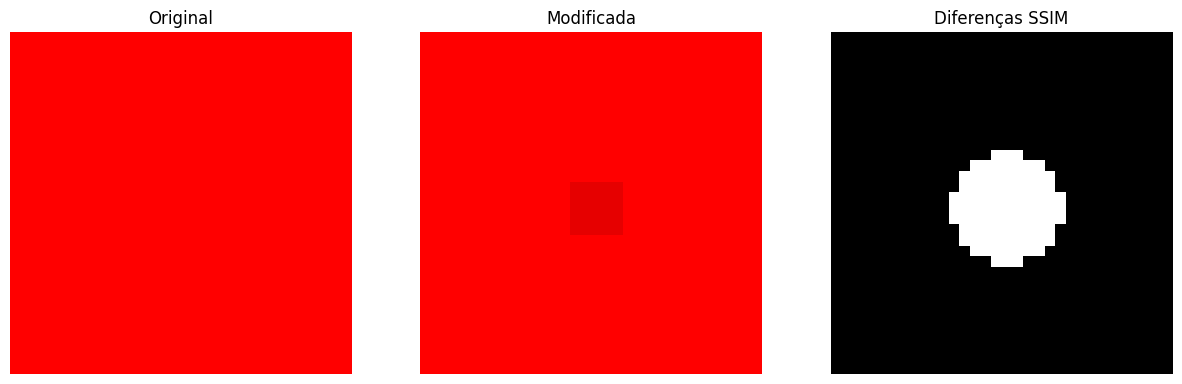

Gradiente = 225


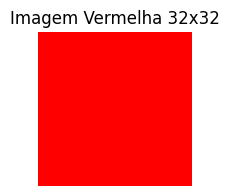

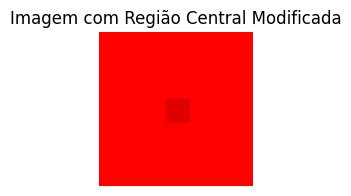

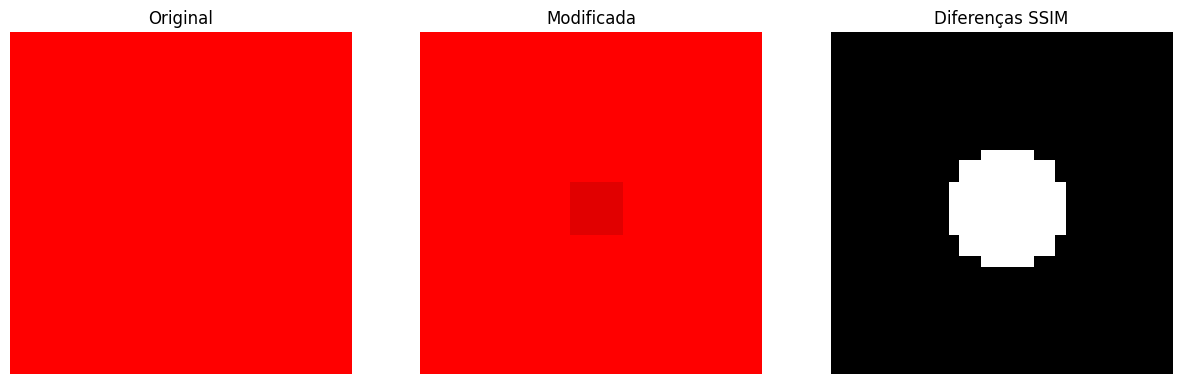

Gradiente = 220


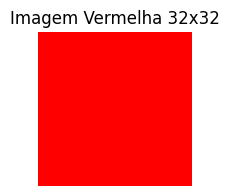

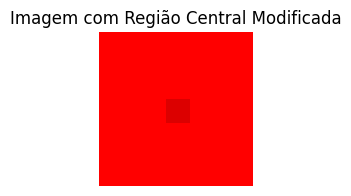

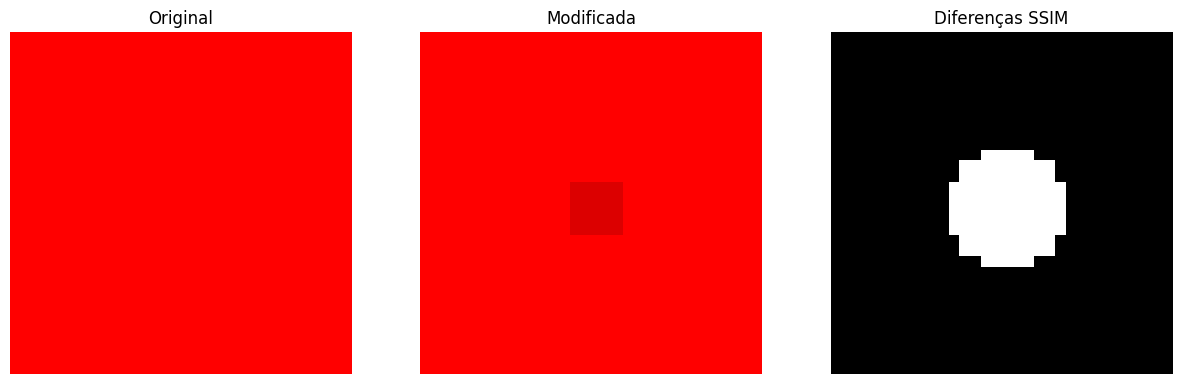

Gradiente = 215


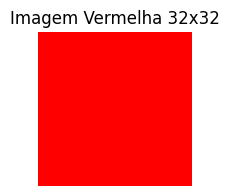

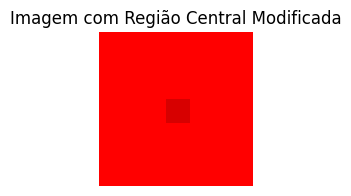

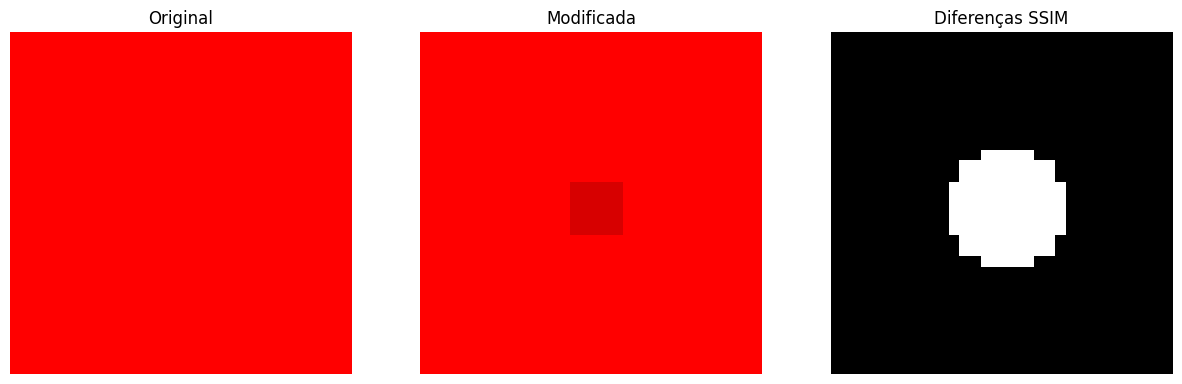

Gradiente = 210


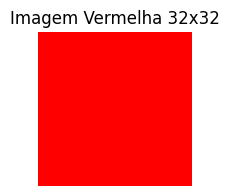

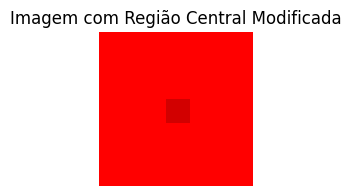

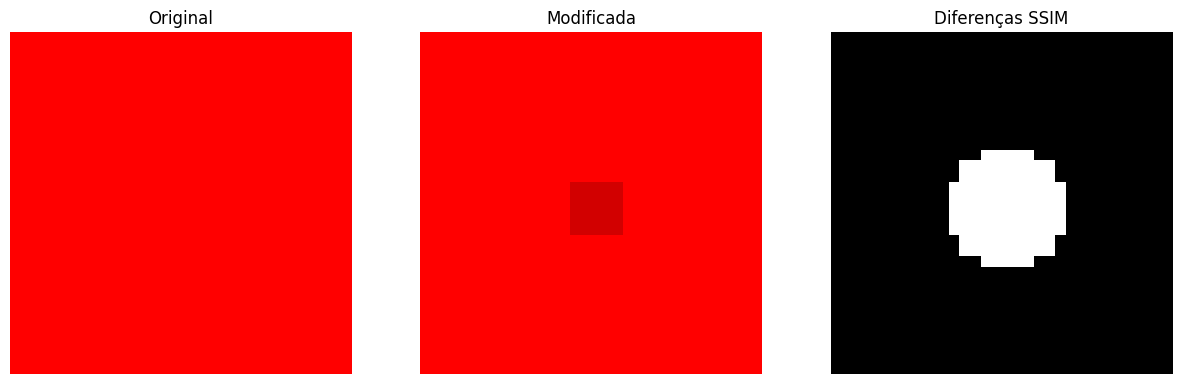

Gradiente = 205


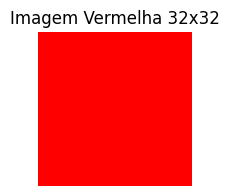

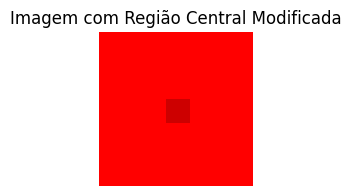

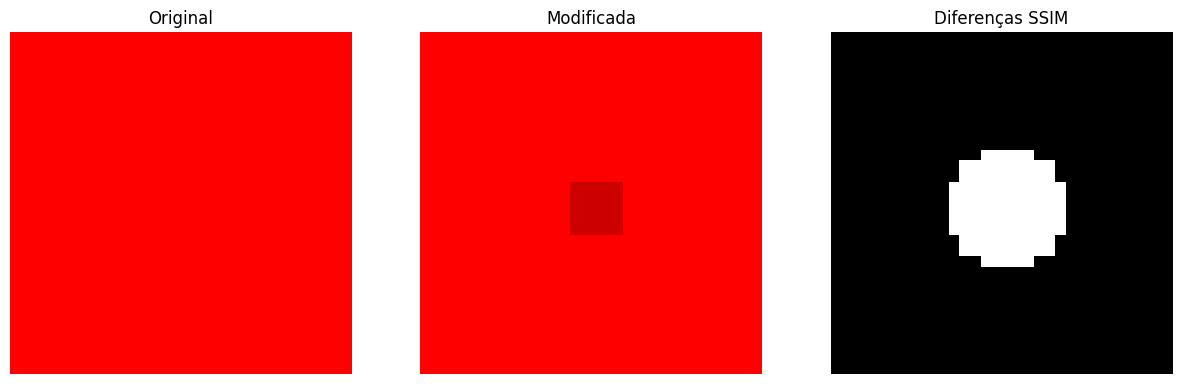

Gradiente = 200


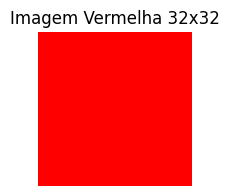

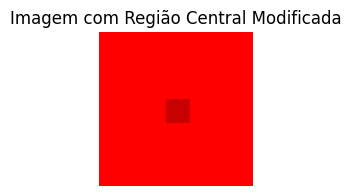

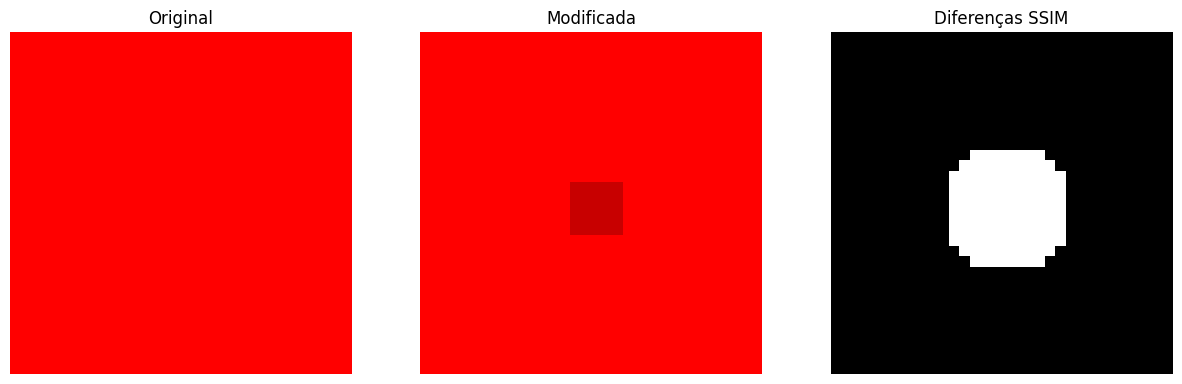

Gradiente = 195


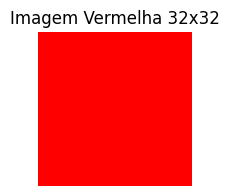

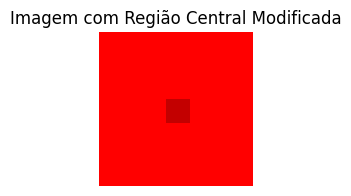

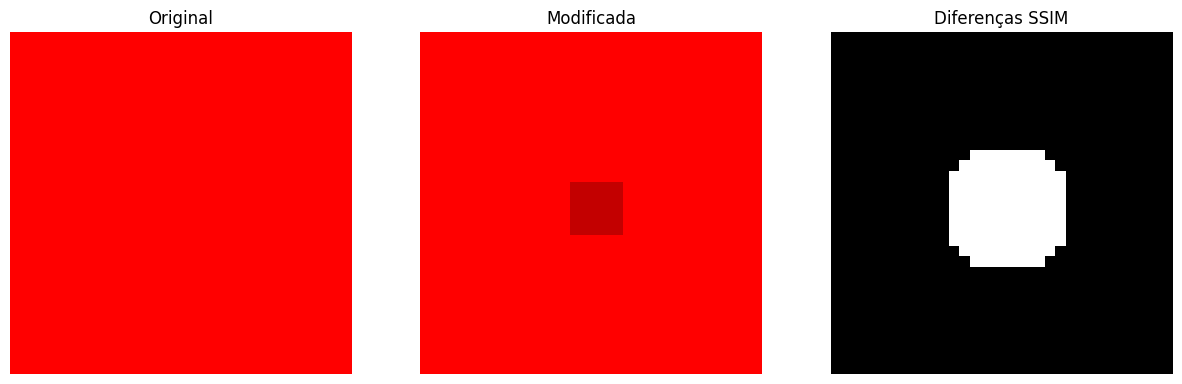

Gradiente = 190


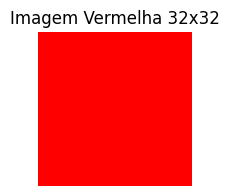

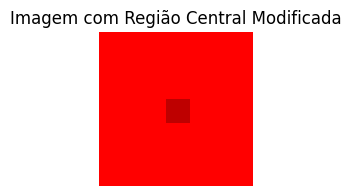

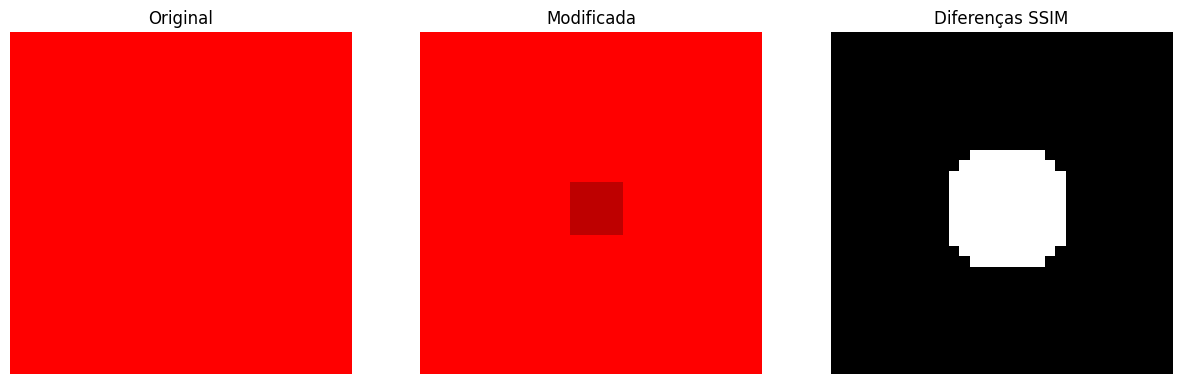

Gradiente = 185


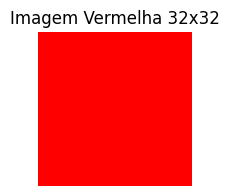

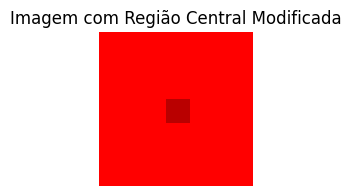

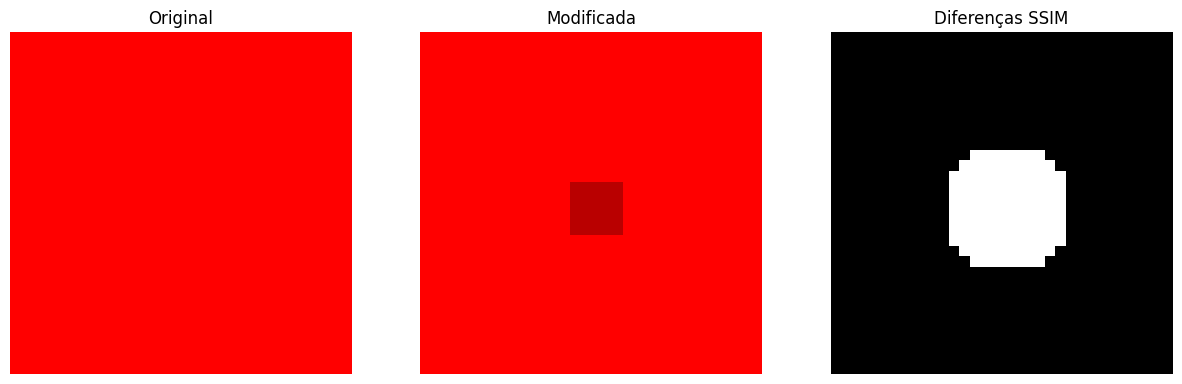

Gradiente = 180


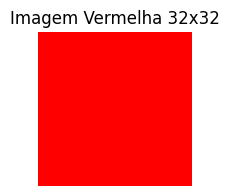

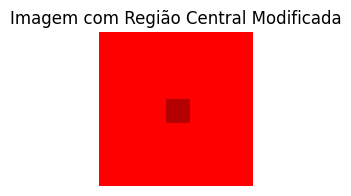

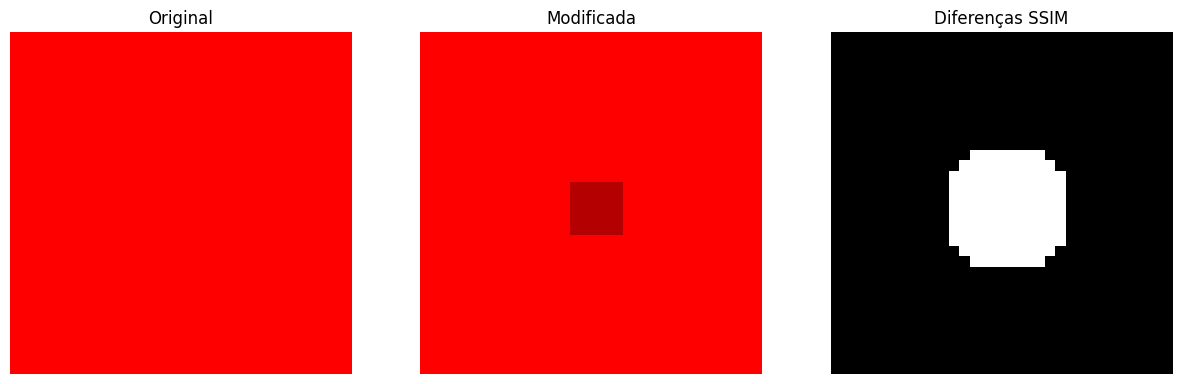

Gradiente = 175


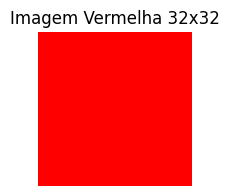

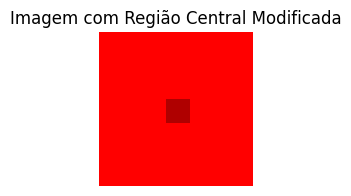

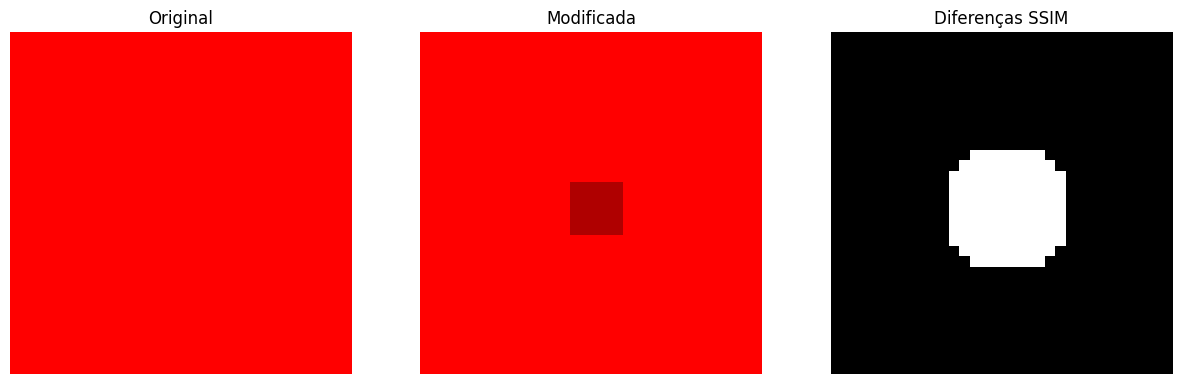

Gradiente = 170


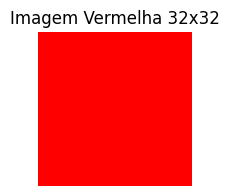

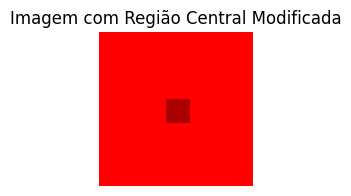

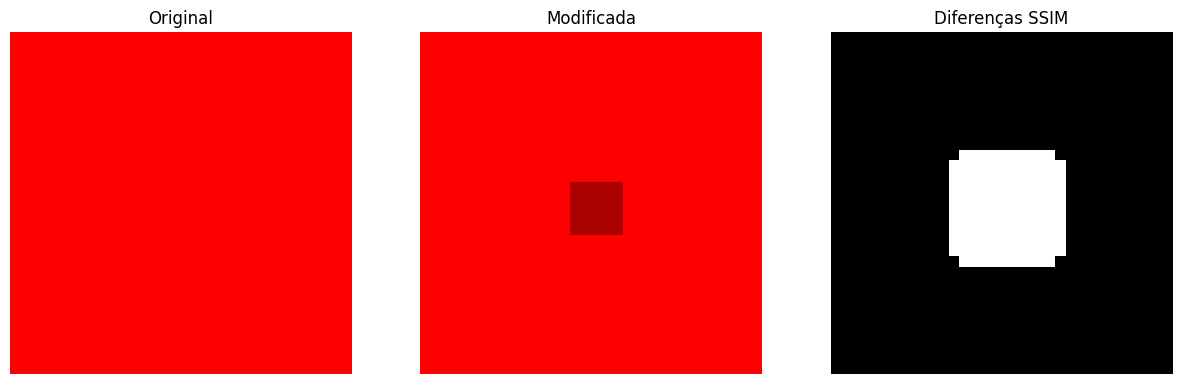

Gradiente = 165


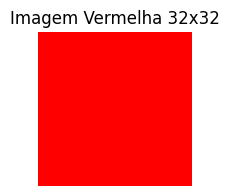

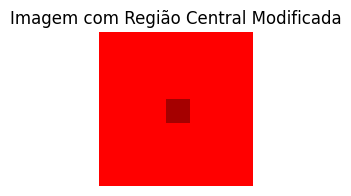

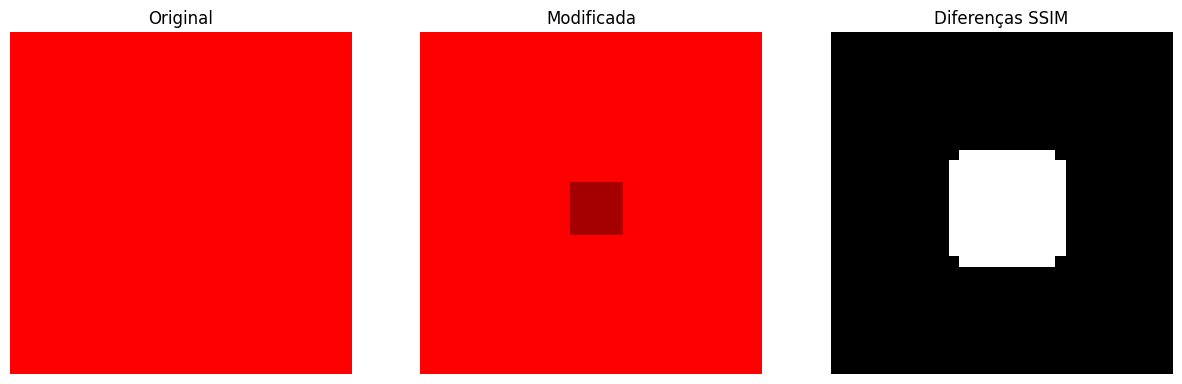

Gradiente = 160


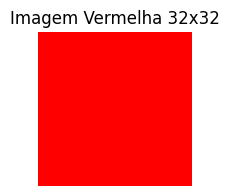

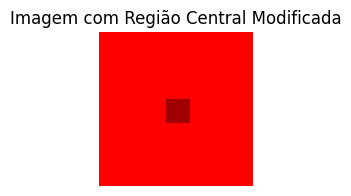

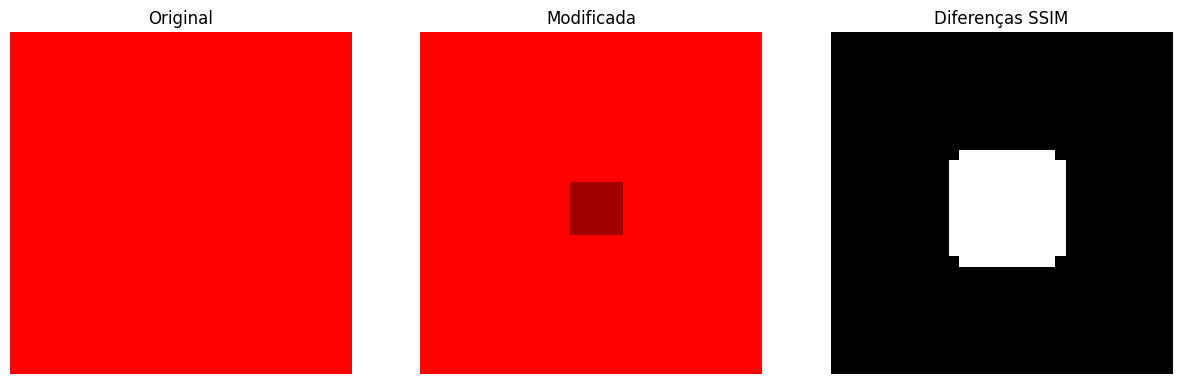

Gradiente = 155


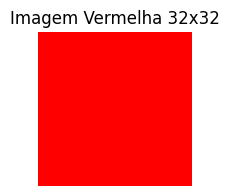

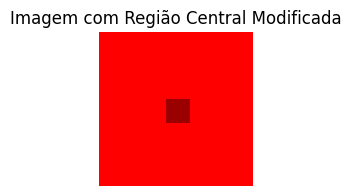

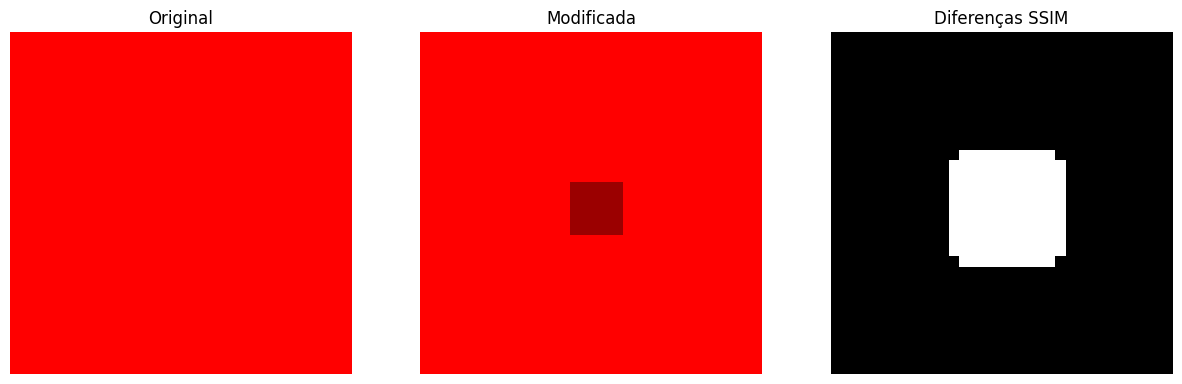

Gradiente = 150


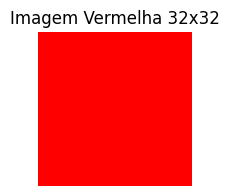

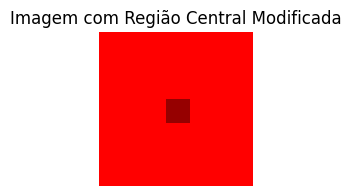

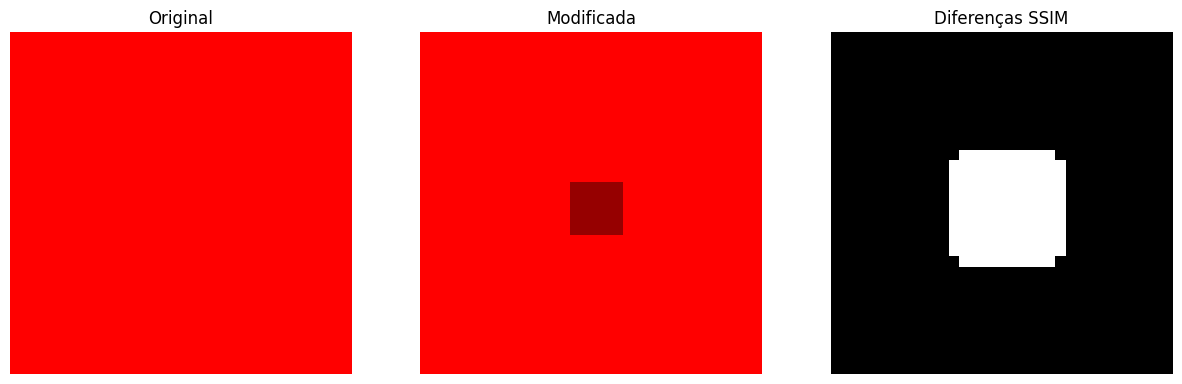

Gradiente = 145


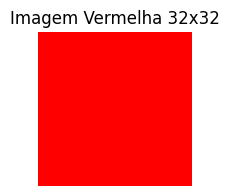

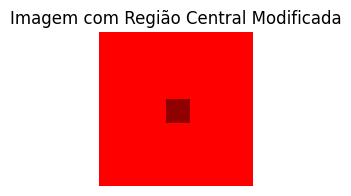

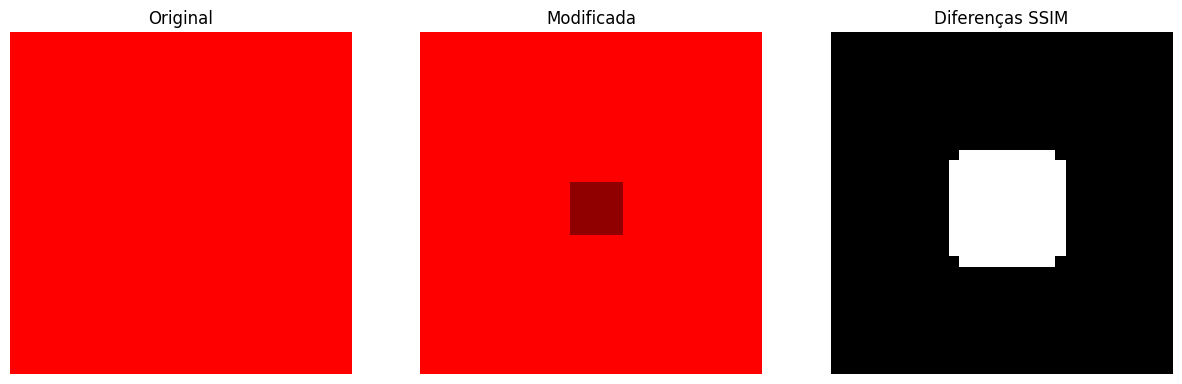

Gradiente = 140


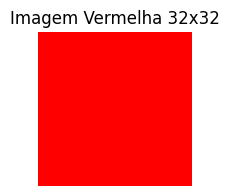

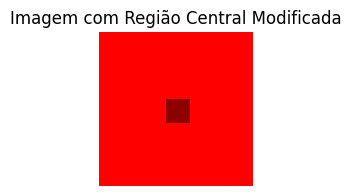

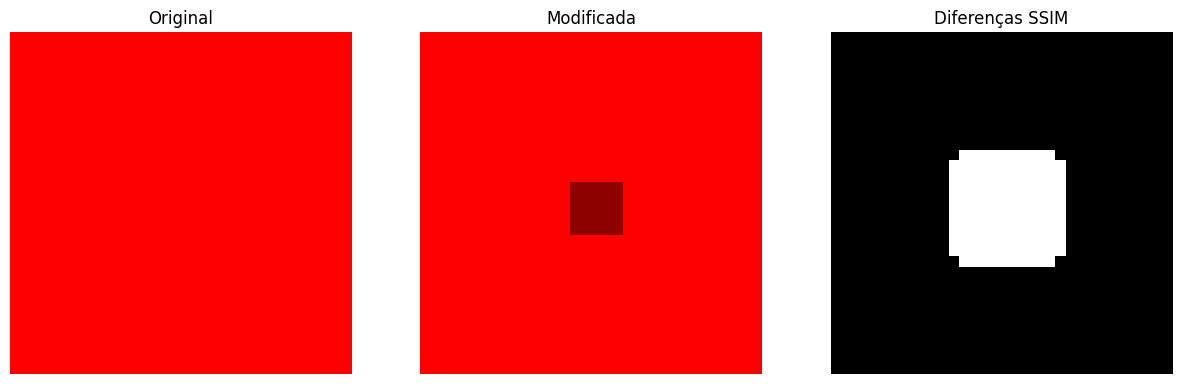

Gradiente = 135


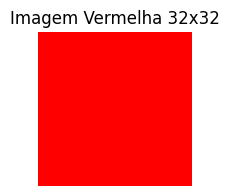

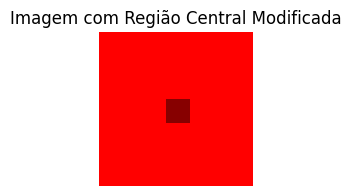

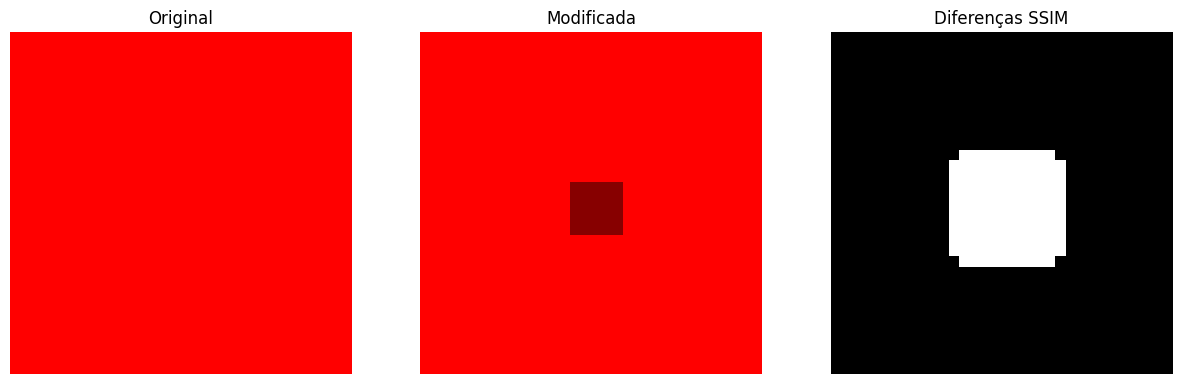

Gradiente = 130


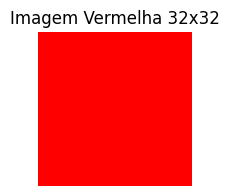

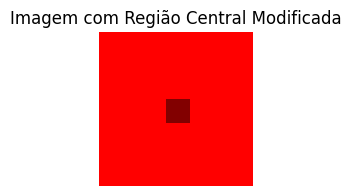

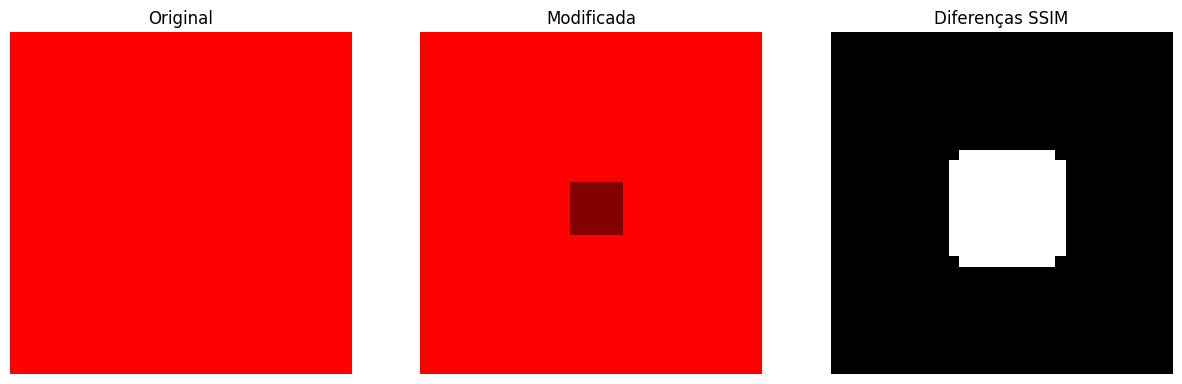

Gradiente = 125


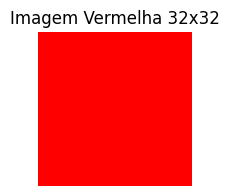

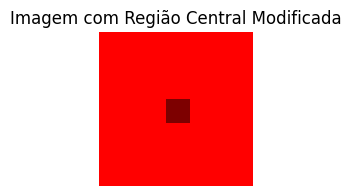

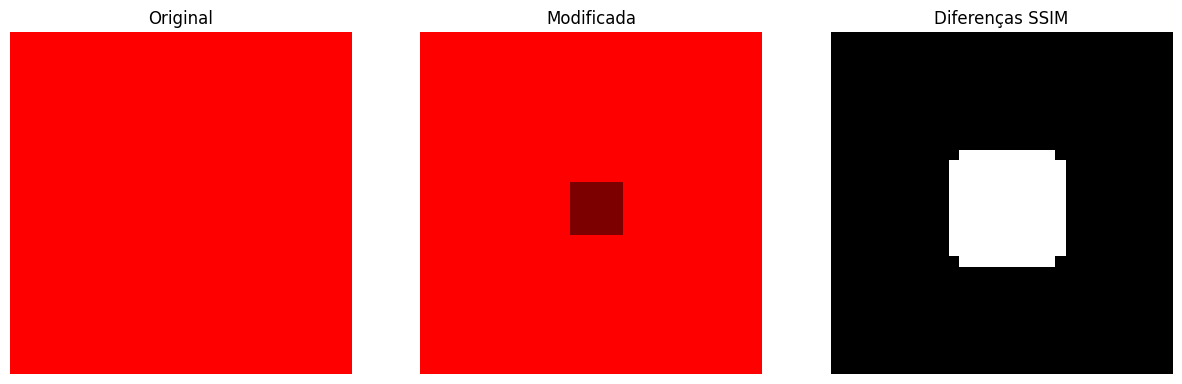

Gradiente = 120


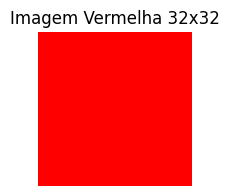

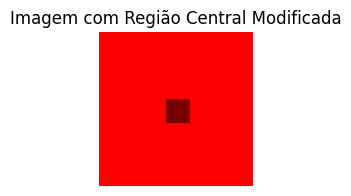

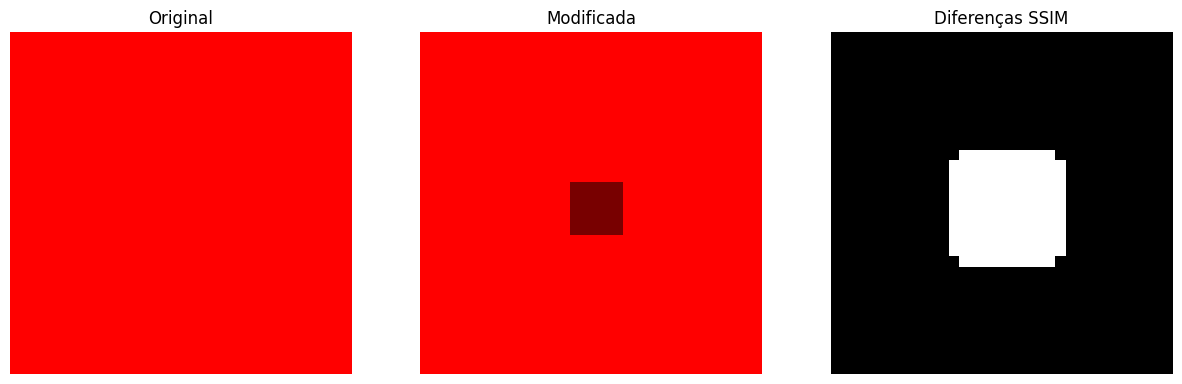

Gradiente = 115


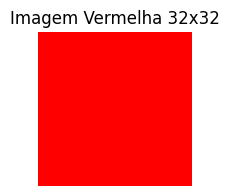

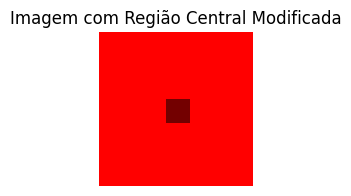

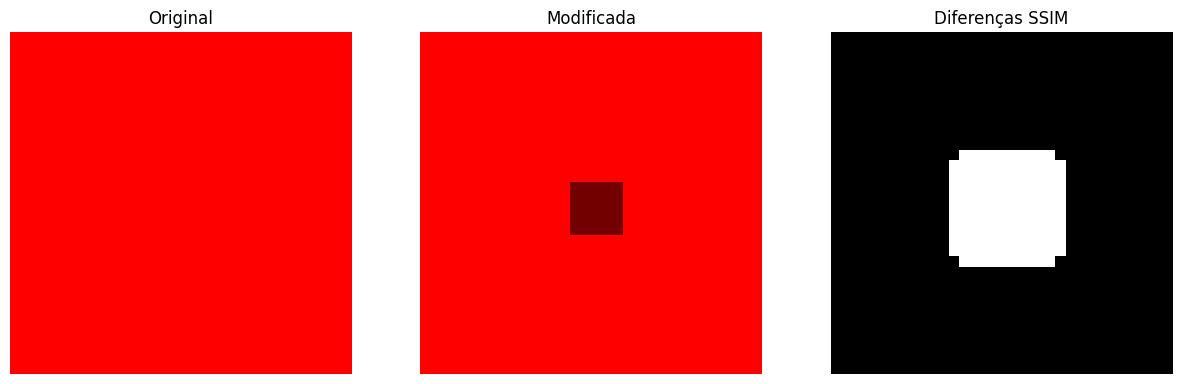

Gradiente = 110


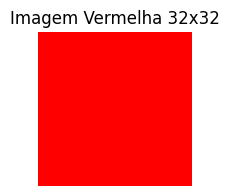

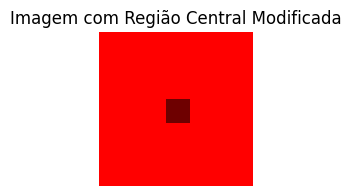

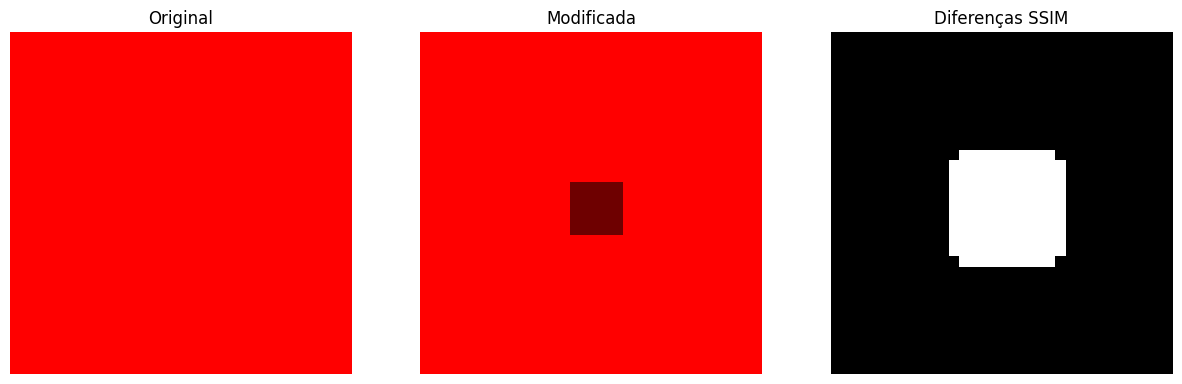

Gradiente = 105


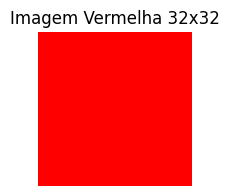

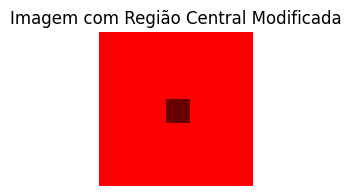

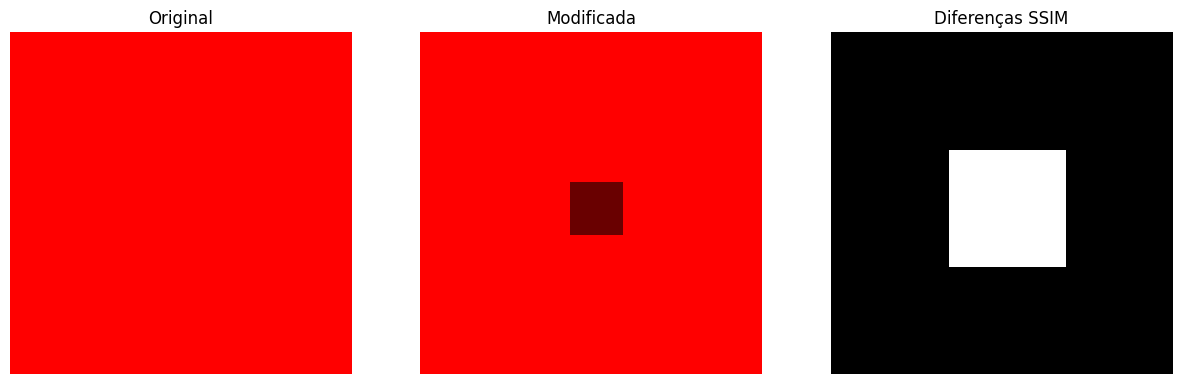

Gradiente = 100


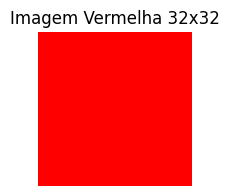

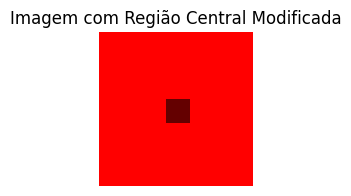

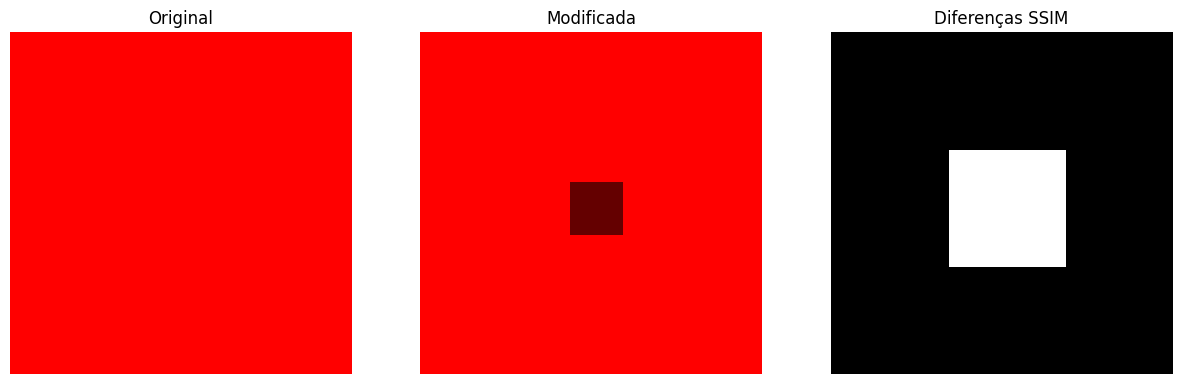

Gradiente = 95


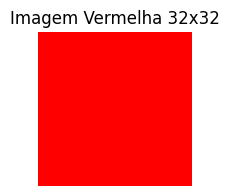

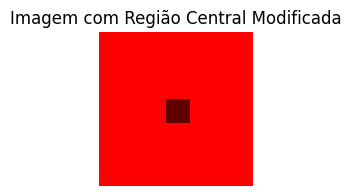

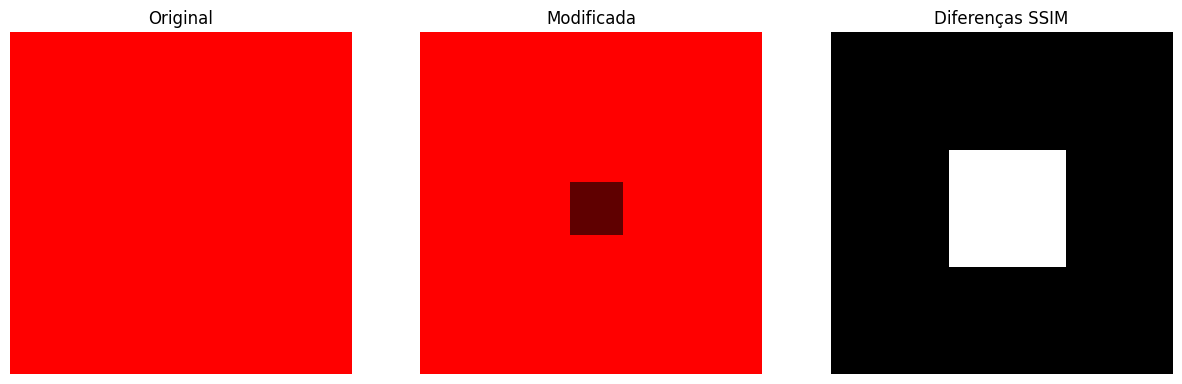

Gradiente = 90


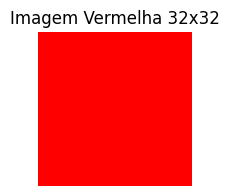

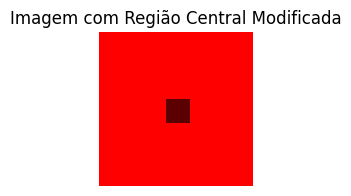

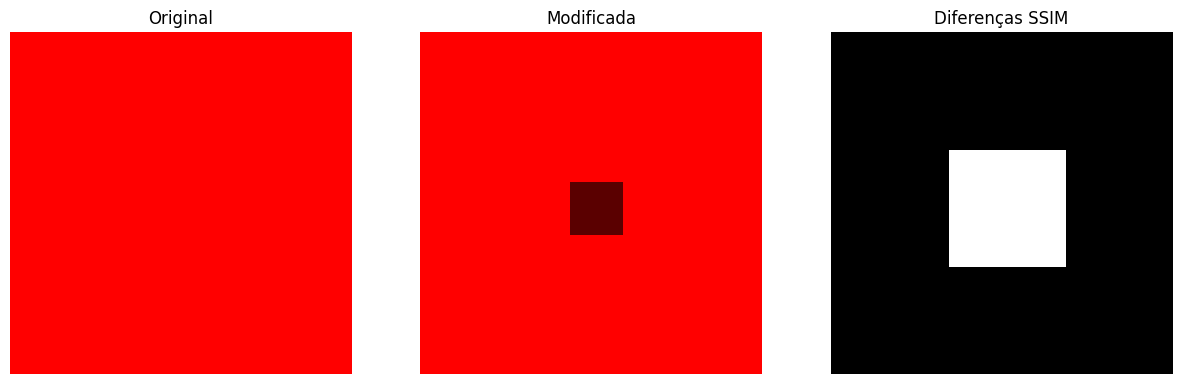

Gradiente = 85


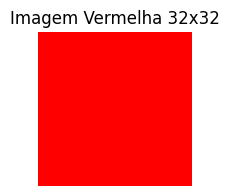

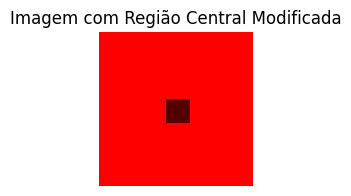

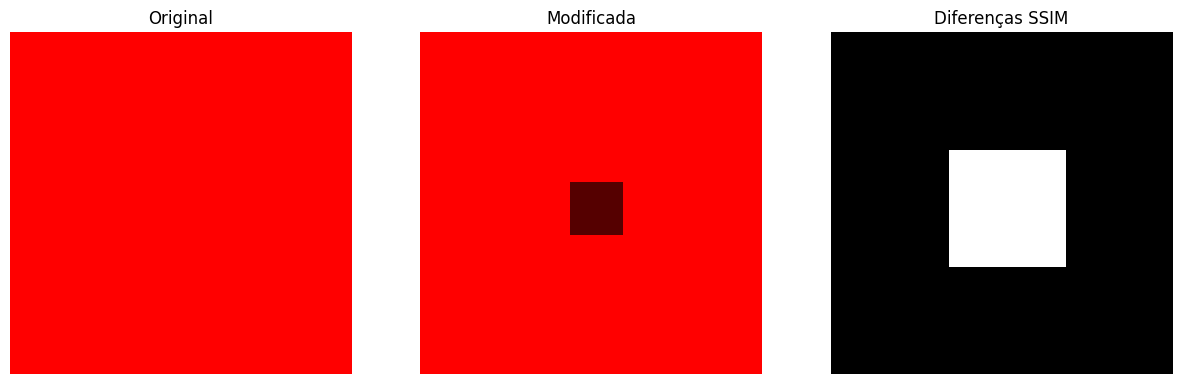

Gradiente = 80


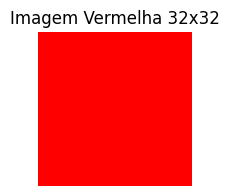

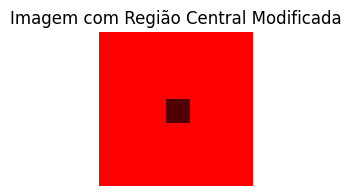

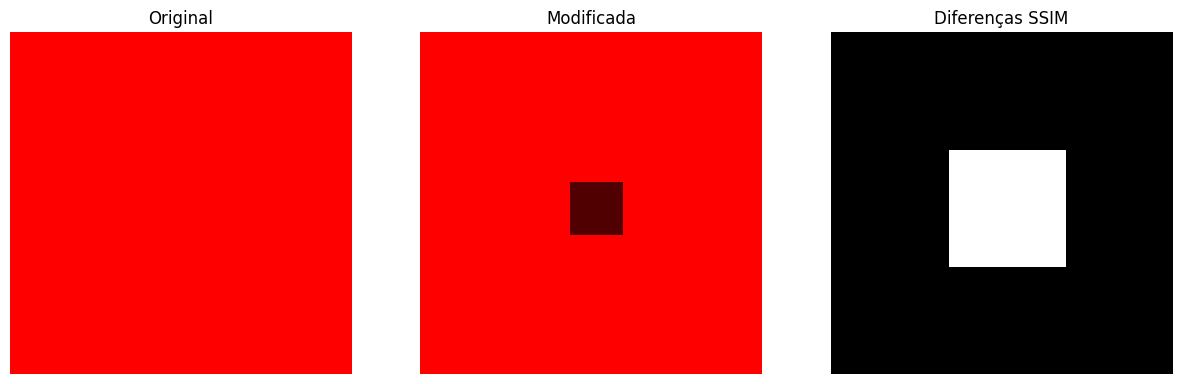

Gradiente = 75


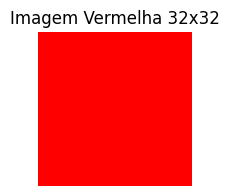

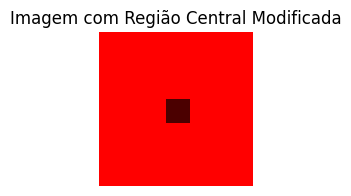

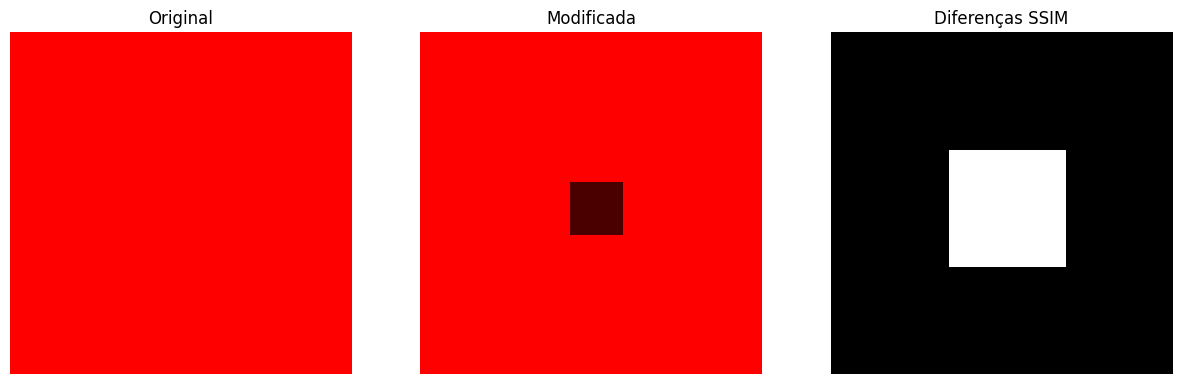

Gradiente = 70


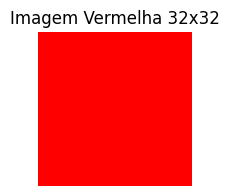

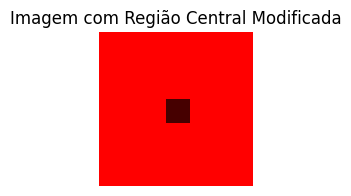

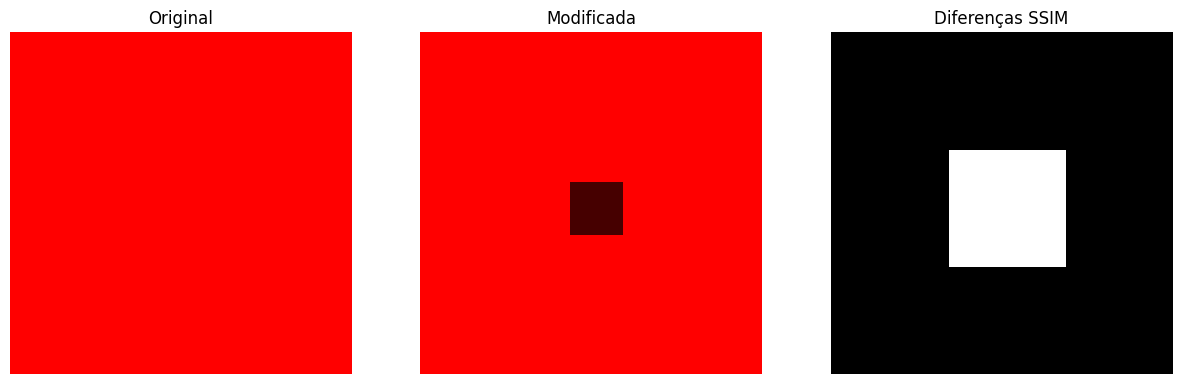

Gradiente = 65


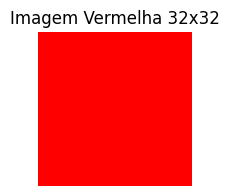

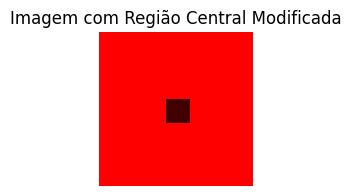

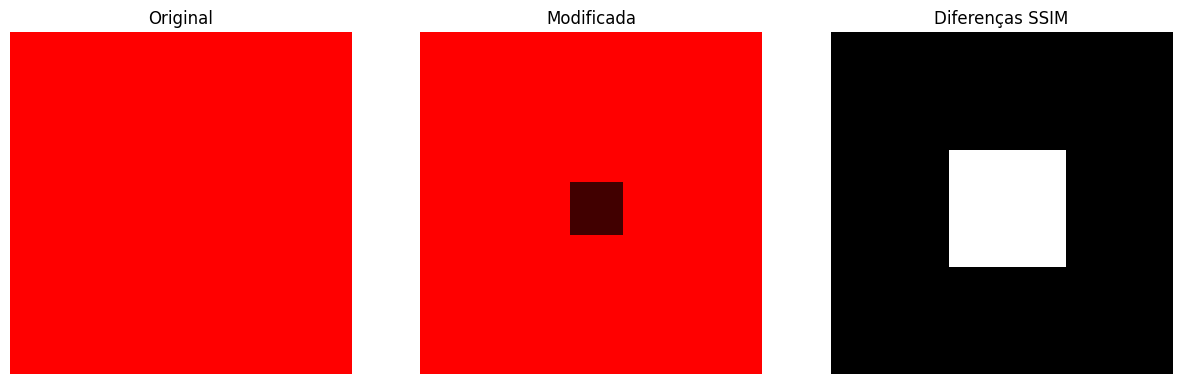

Gradiente = 60


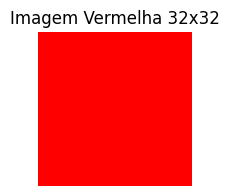

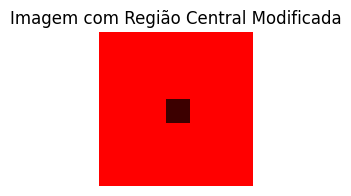

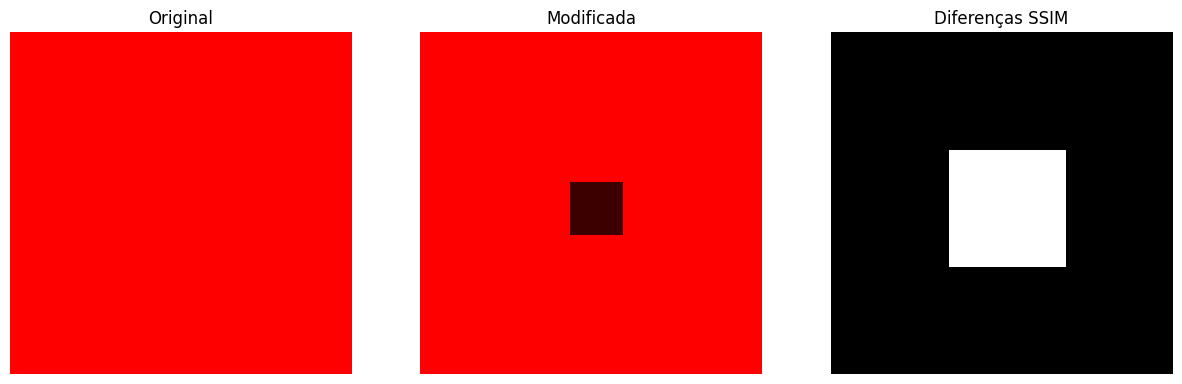

Gradiente = 55


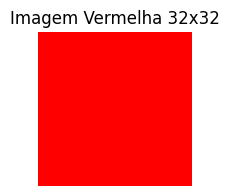

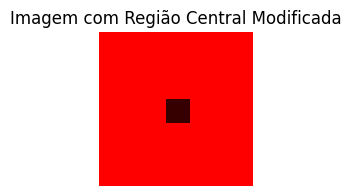

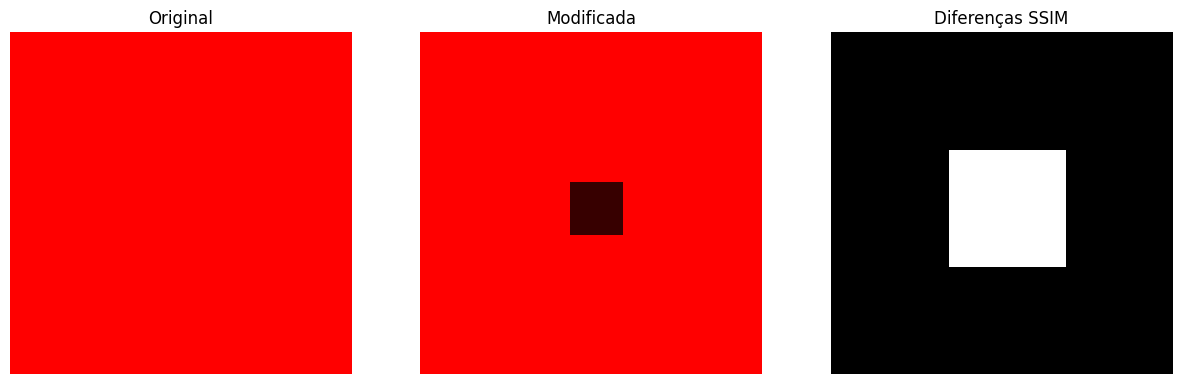

Gradiente = 50


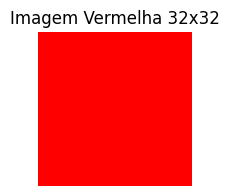

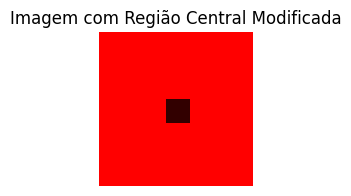

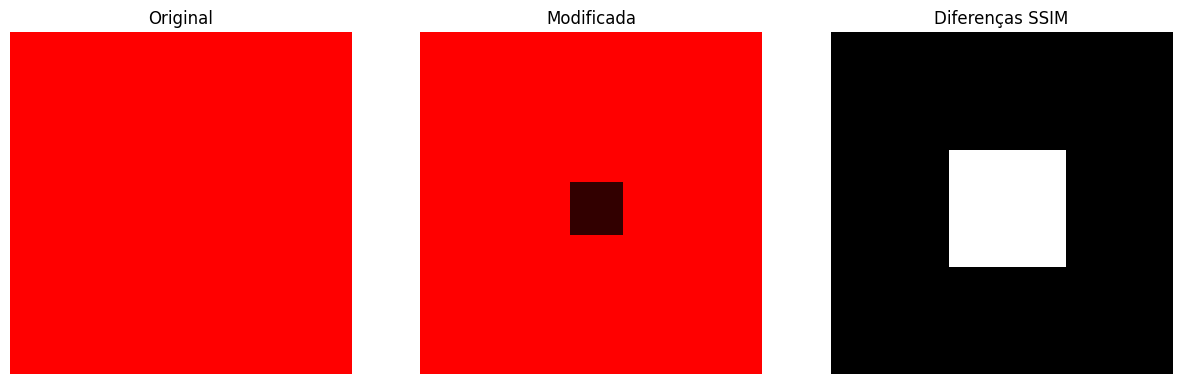

Gradiente = 45


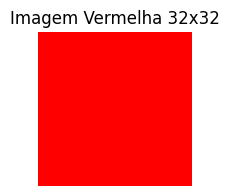

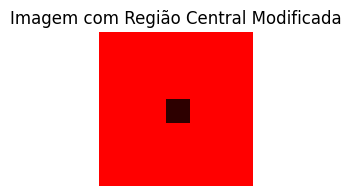

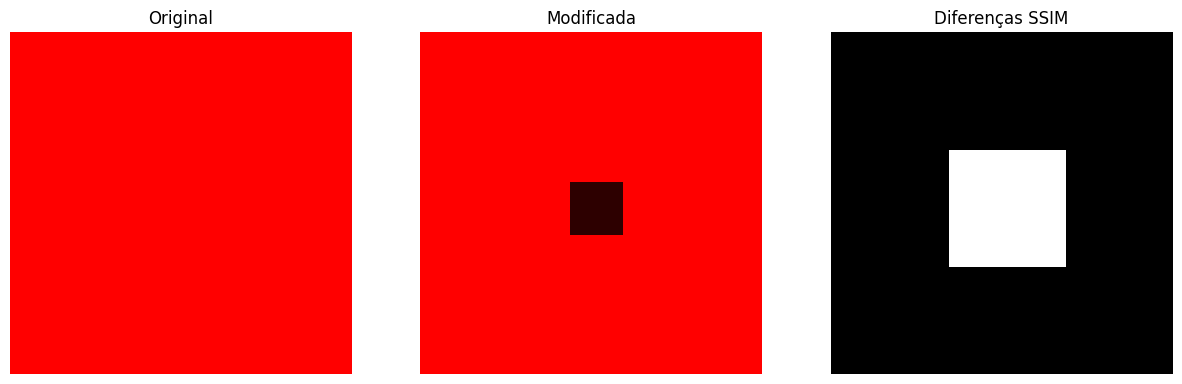

Gradiente = 40


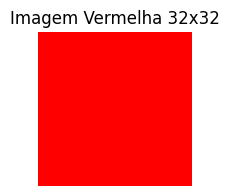

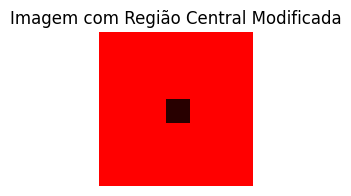

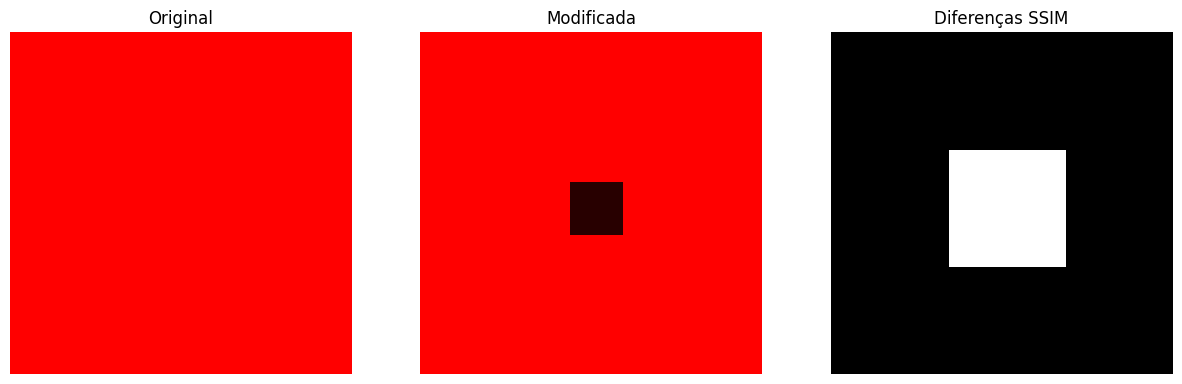

Gradiente = 35


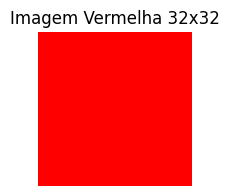

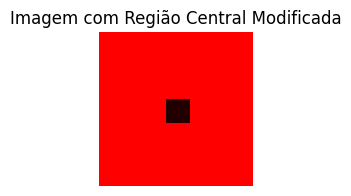

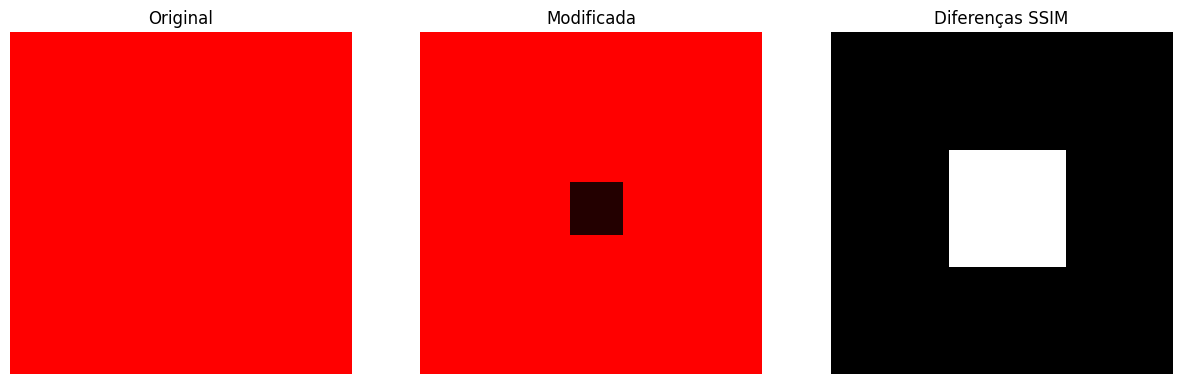

Gradiente = 30


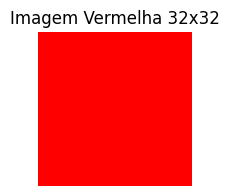

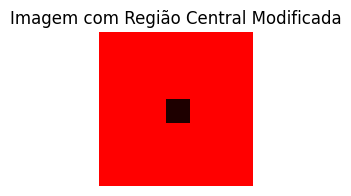

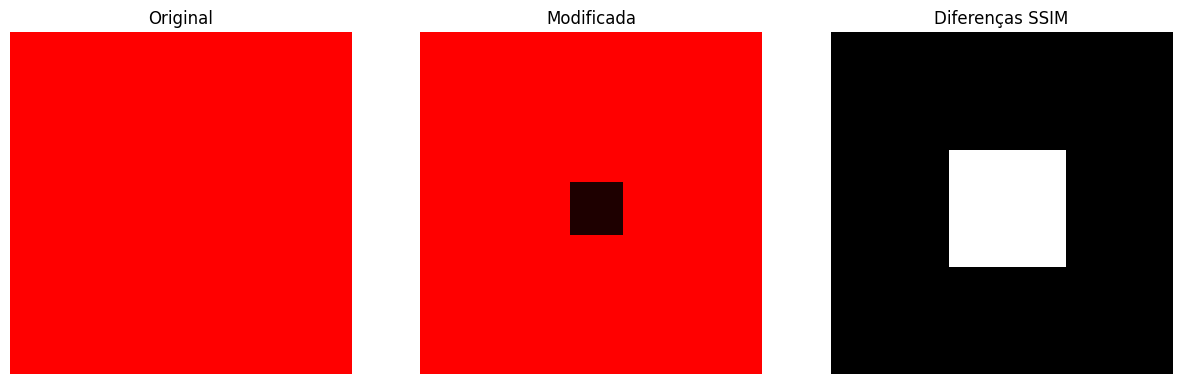

Gradiente = 25


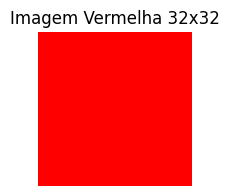

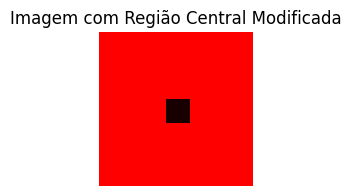

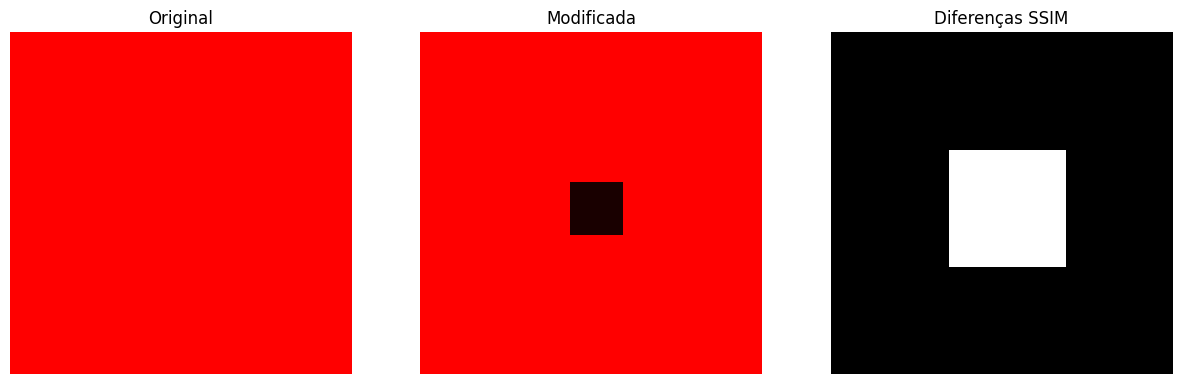

Gradiente = 20


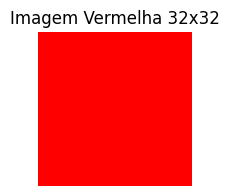

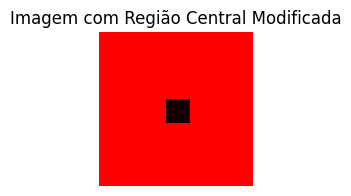

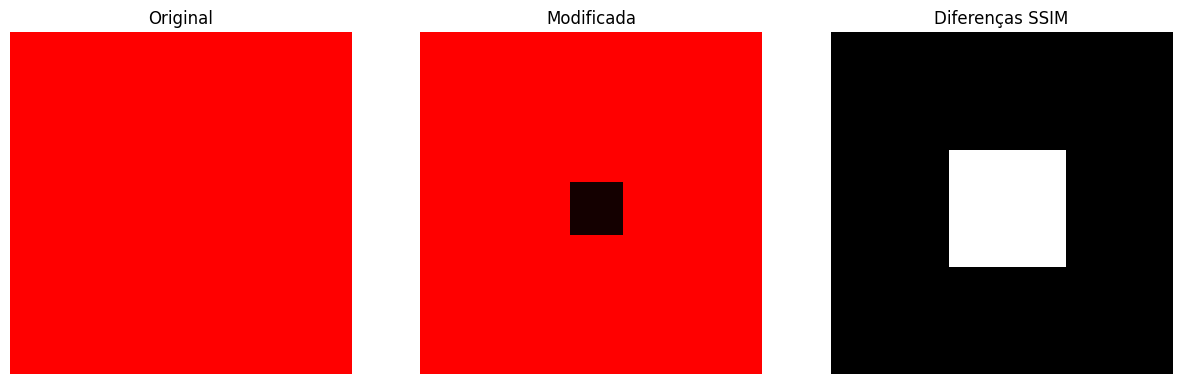

Gradiente = 15


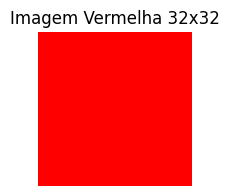

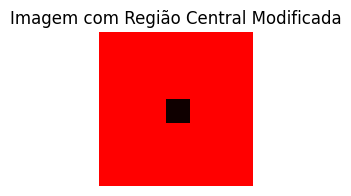

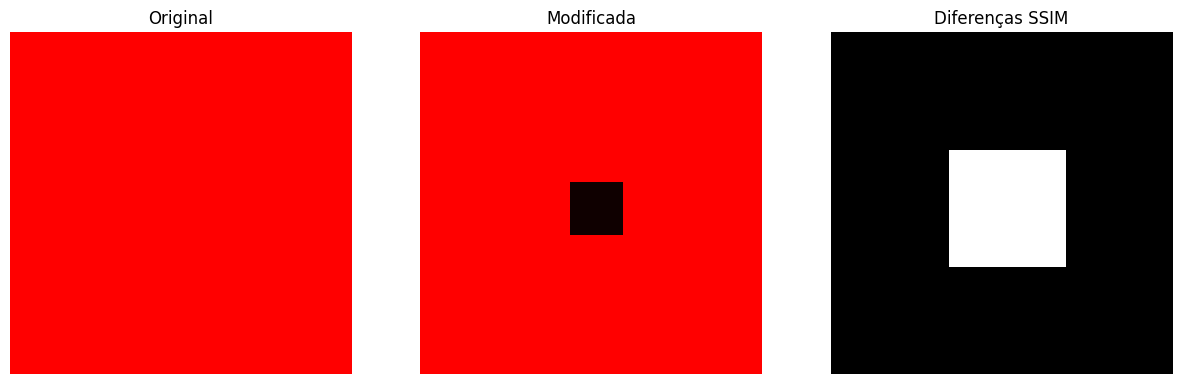

Gradiente = 10


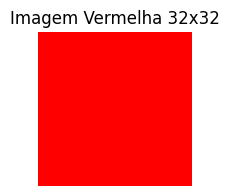

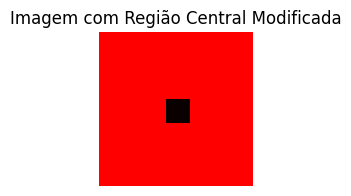

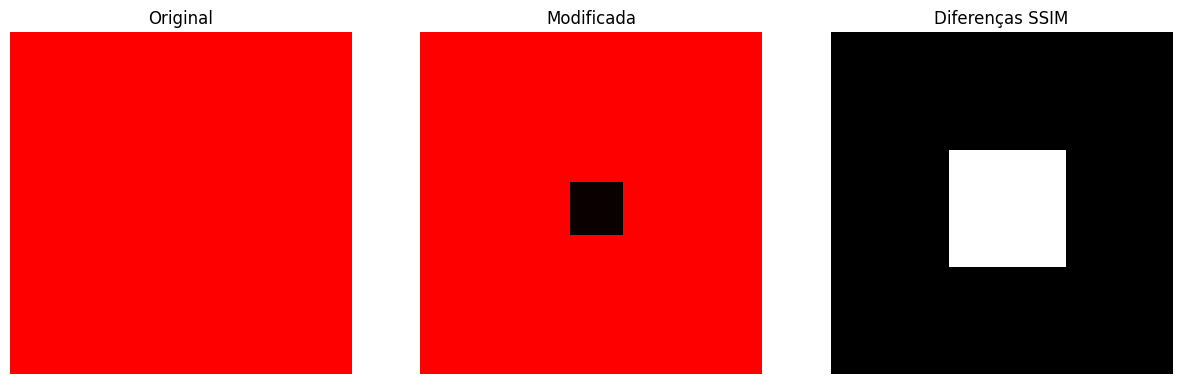

Gradiente = 5


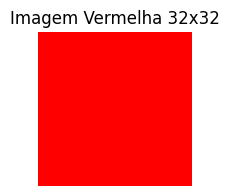

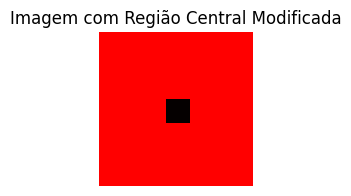

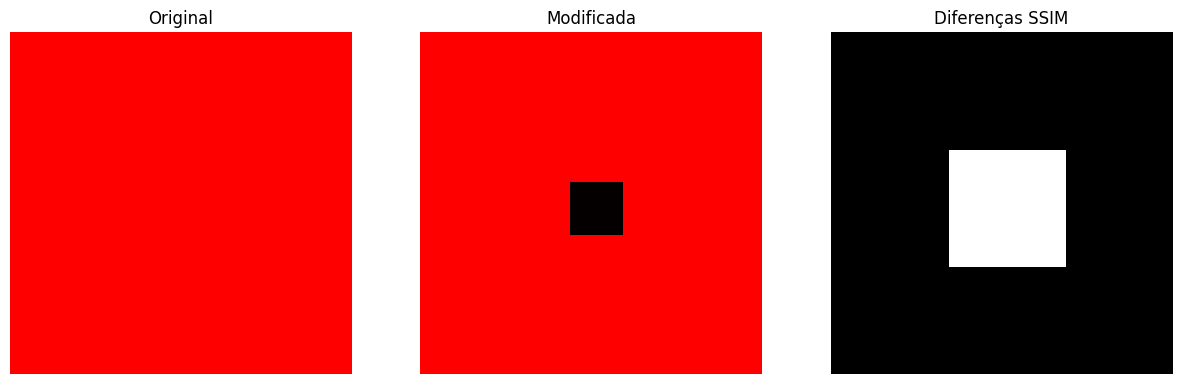

In [139]:
for i in range(255,0,-5):
    # Imprimindo gradientes
    print(f'Gradiente = {i}')
    
    # Gerar imagens
    gerar_img_mono_sem_e_com_ruido_2(i,5)
    
    # Carregar as duas imagens
    img_original = cv2.imread('img_sem_ruido.png')
    img_modificada = cv2.imread('img_com_ruido.png')

    # Executar a função
    SSIM_imagem(img_original, img_modificada)    

Com relação à inserção de uma região preta $5 \times 5$ notamos uma dilatação da região de possível mudança à medida que o gradiente ia se distanciando mais de $255$ em direção à zero, começando por volta de $252$ (teste).

Vejamos agora o que ocorre com uma inserção de uma região $31 \times 31$ com gradiente decrescente:

Gradiente = 255


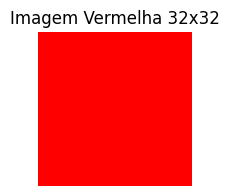

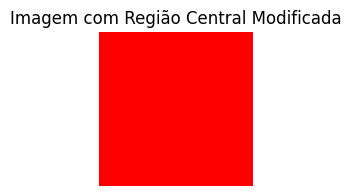

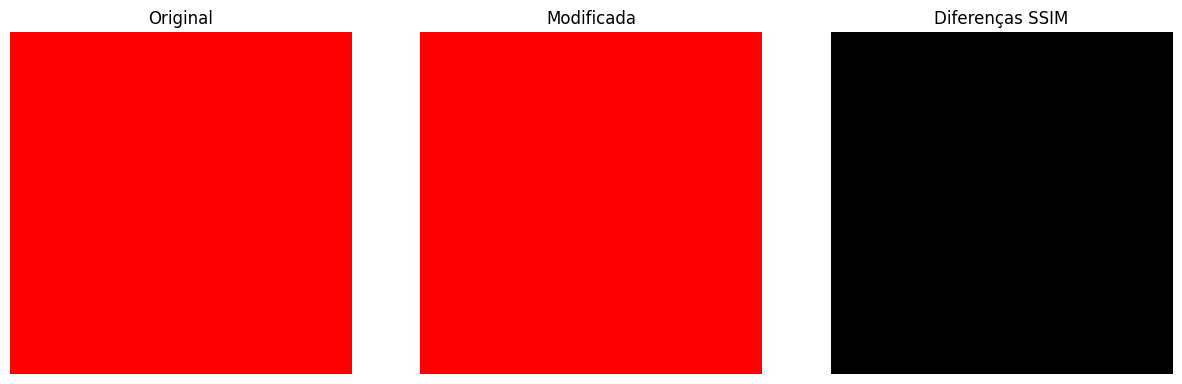

Gradiente = 250


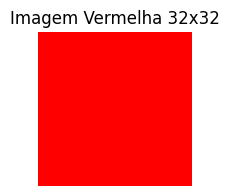

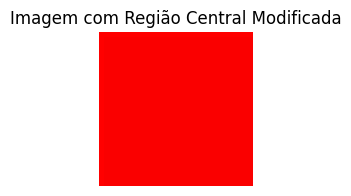

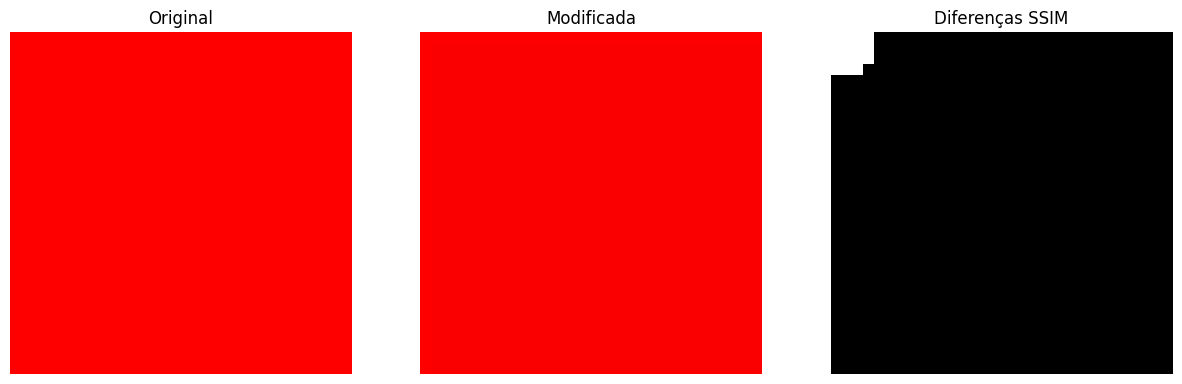

Gradiente = 245


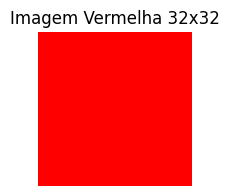

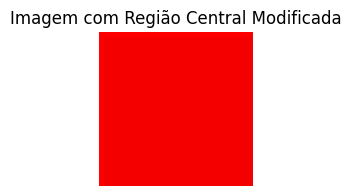

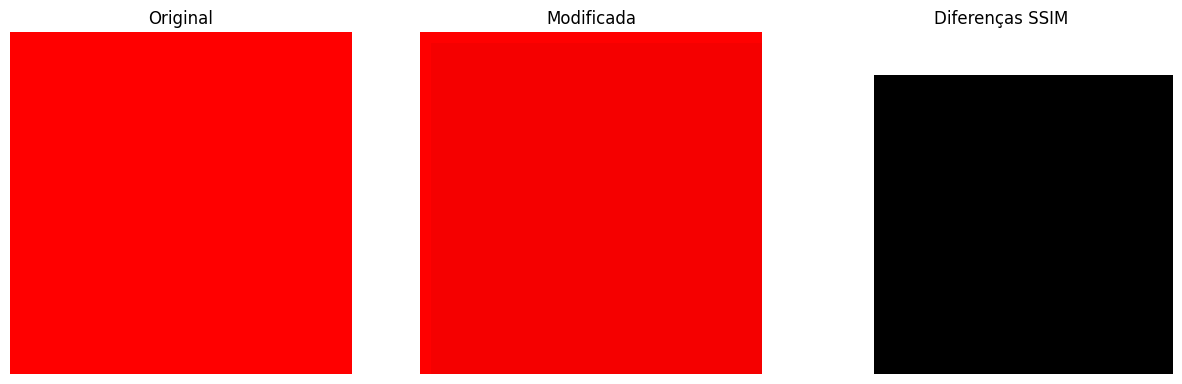

Gradiente = 240


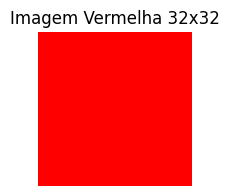

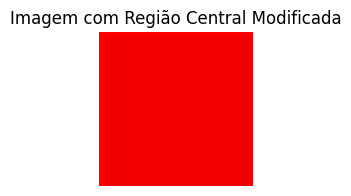

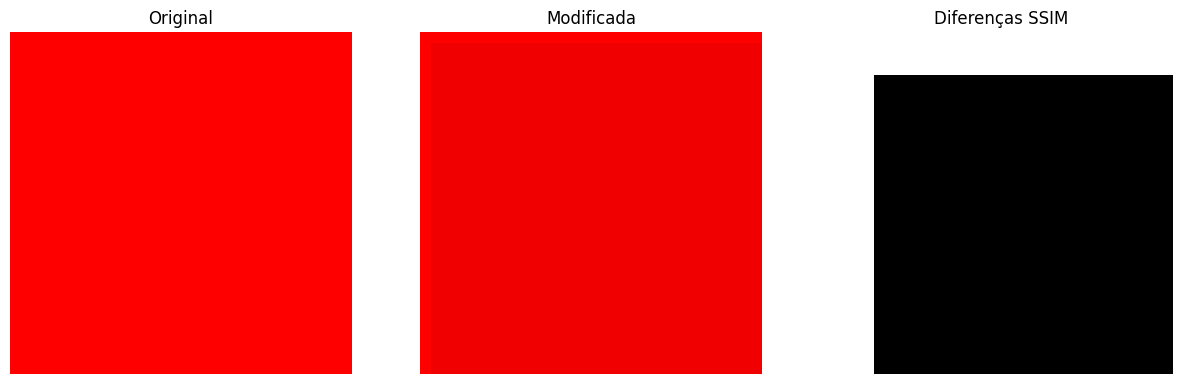

Gradiente = 235


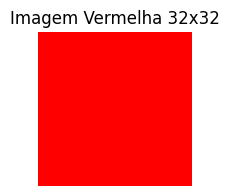

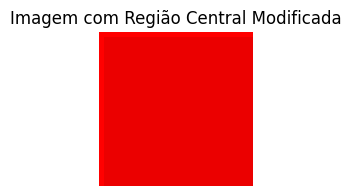

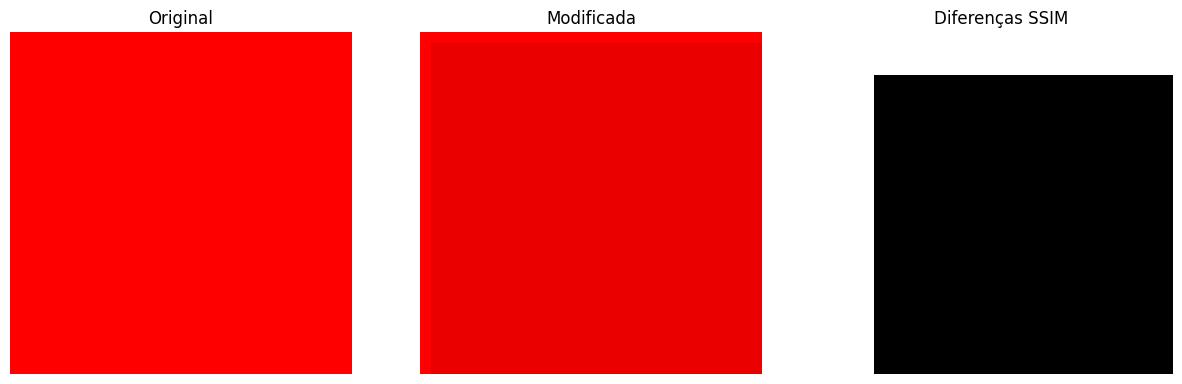

Gradiente = 230


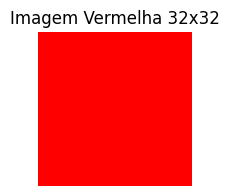

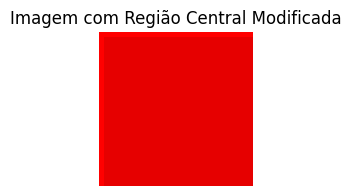

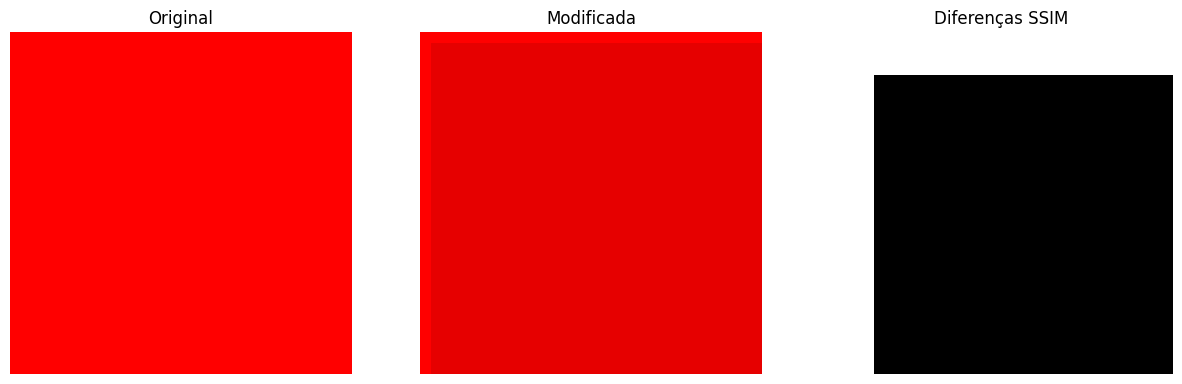

Gradiente = 225


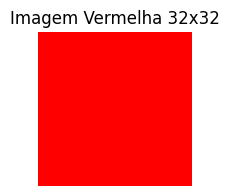

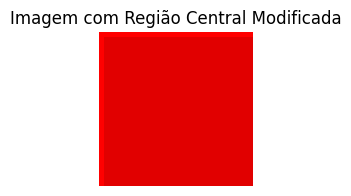

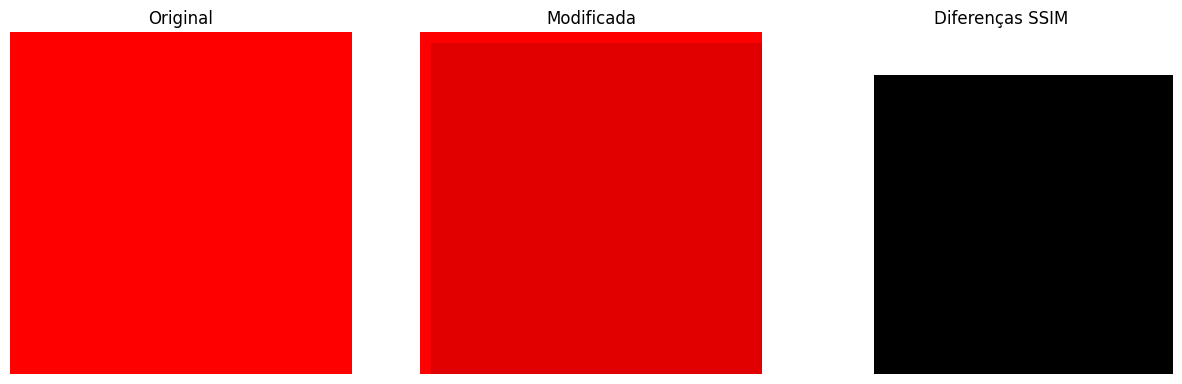

Gradiente = 220


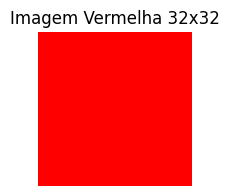

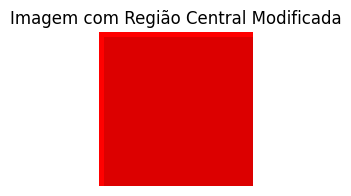

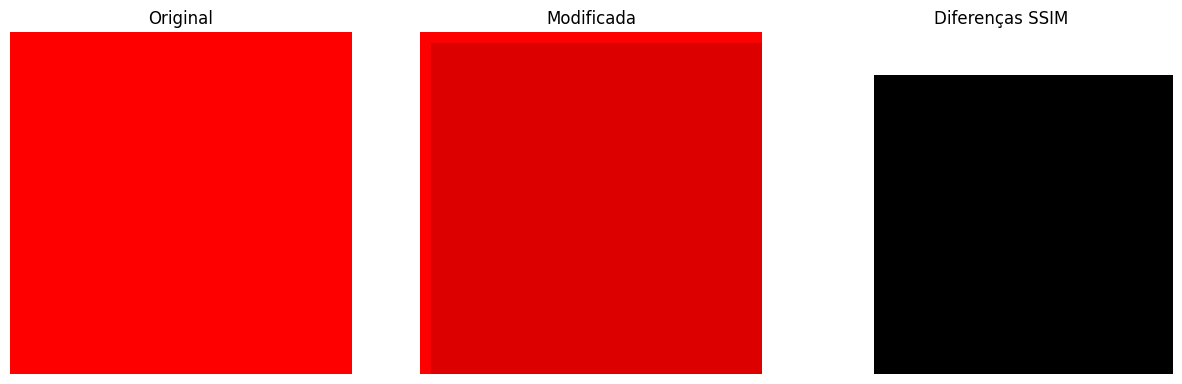

Gradiente = 215


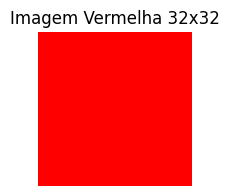

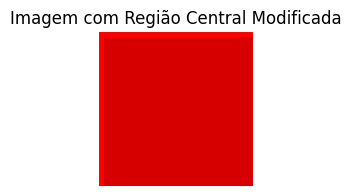

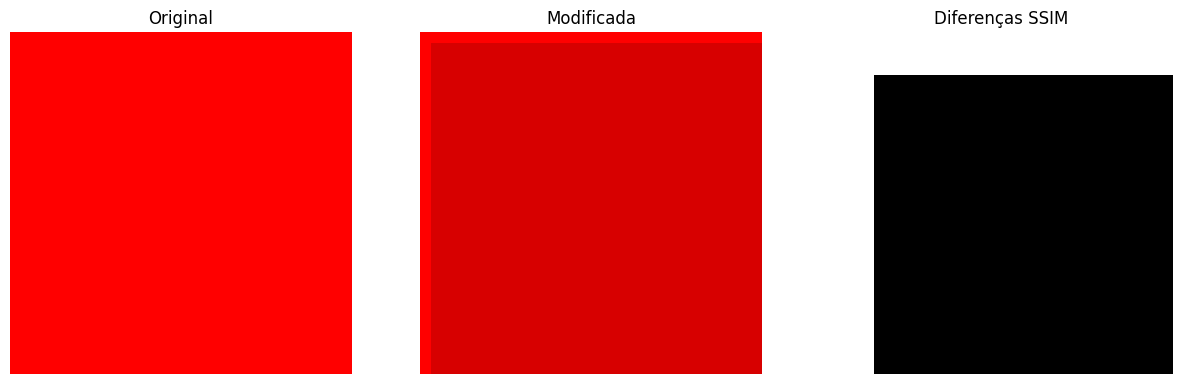

Gradiente = 210


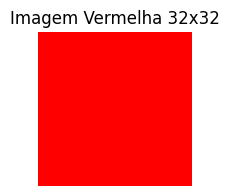

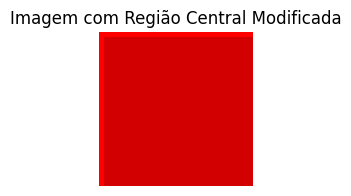

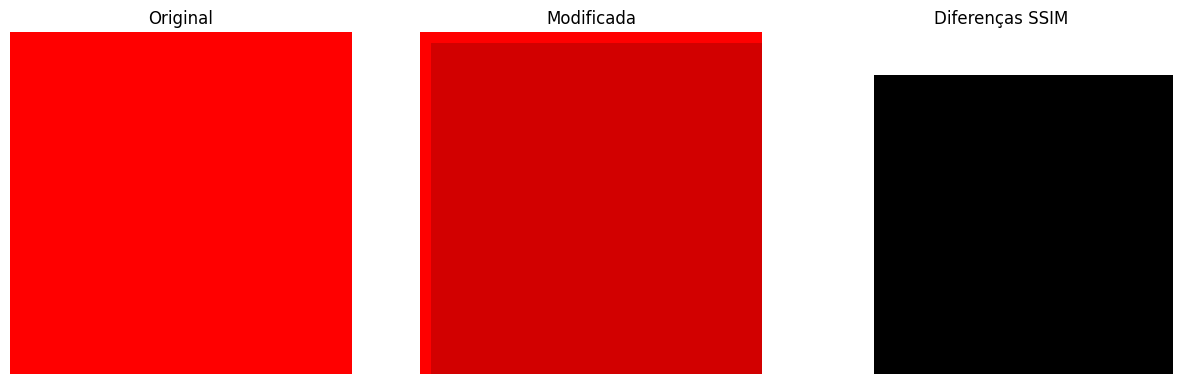

Gradiente = 205


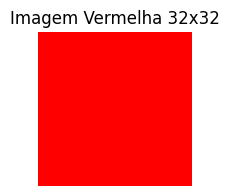

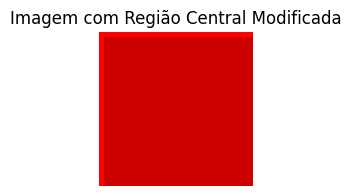

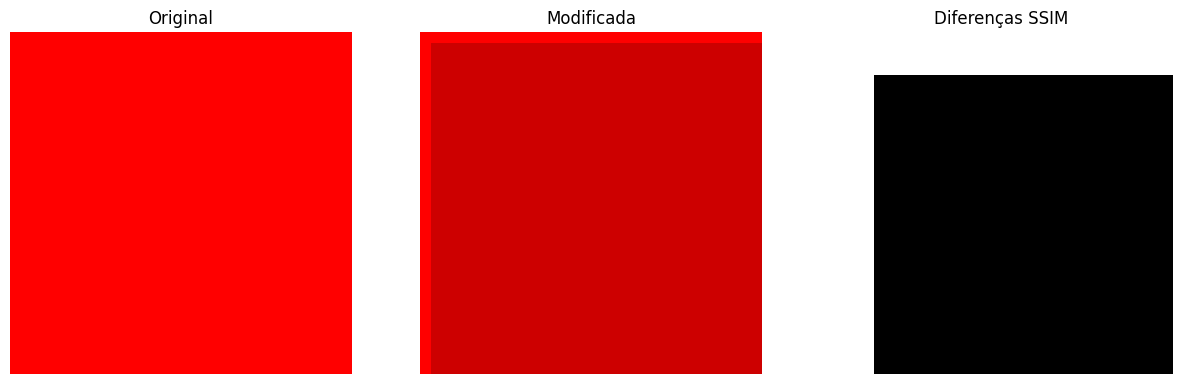

Gradiente = 200


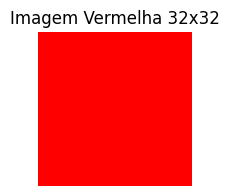

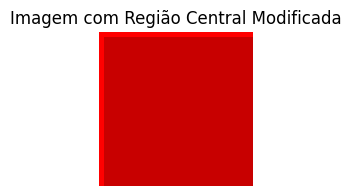

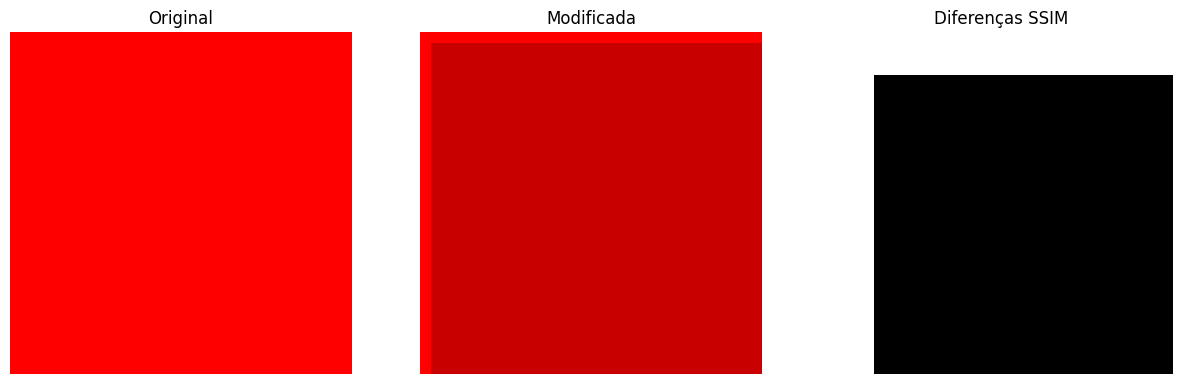

Gradiente = 195


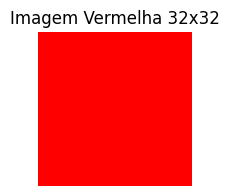

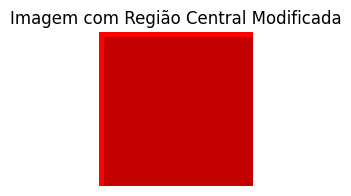

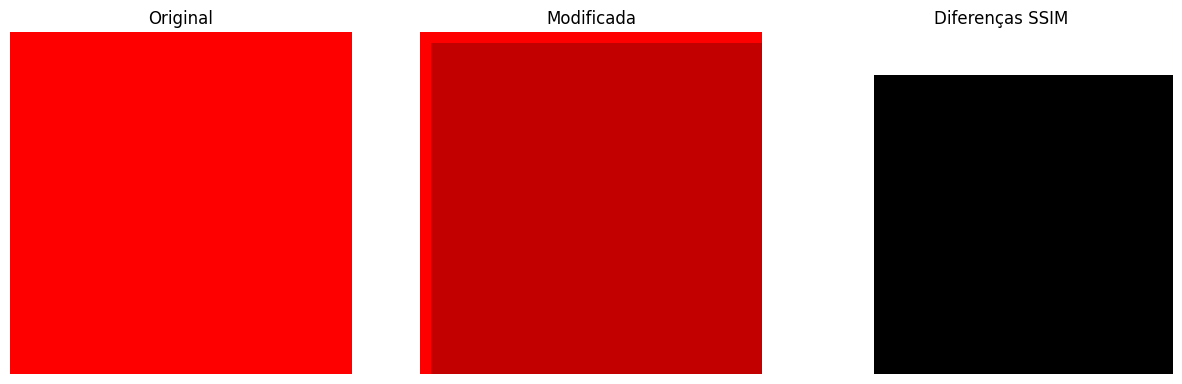

Gradiente = 190


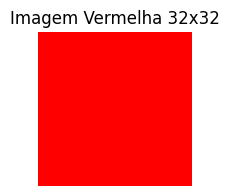

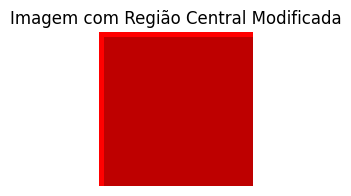

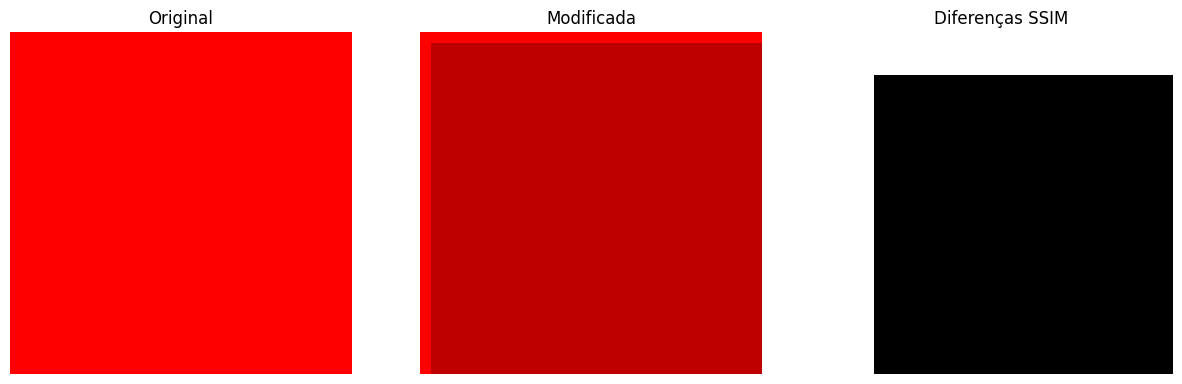

Gradiente = 185


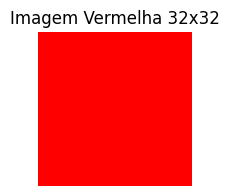

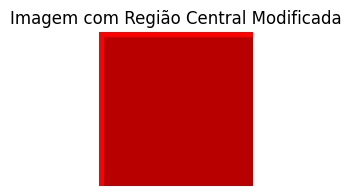

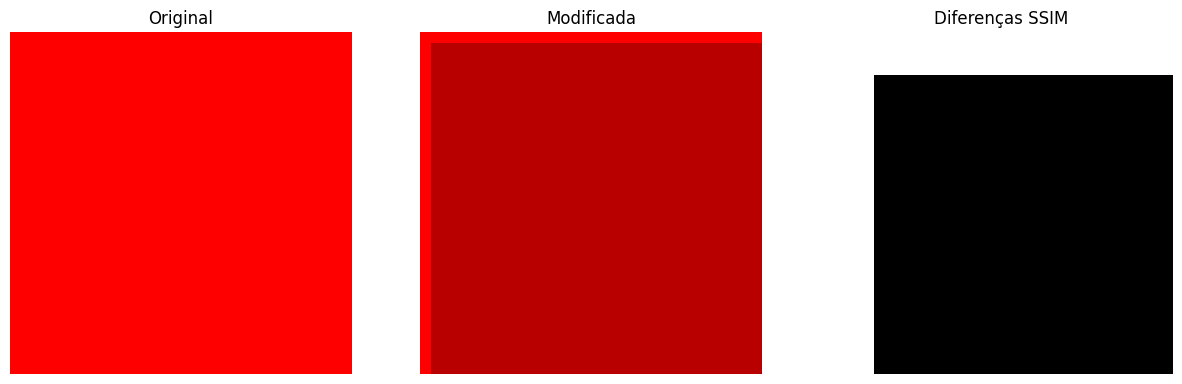

Gradiente = 180


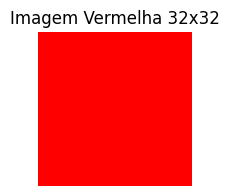

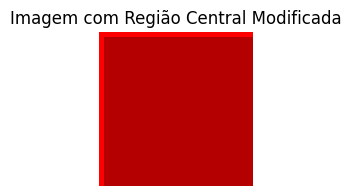

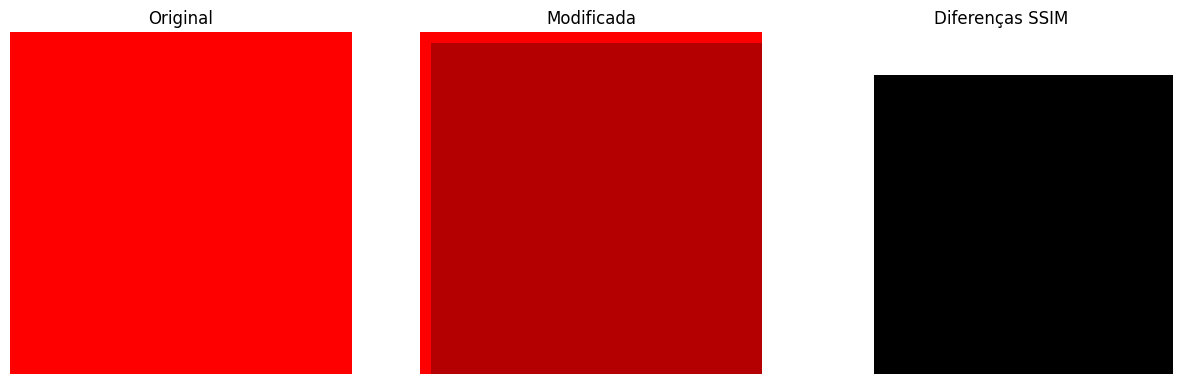

Gradiente = 175


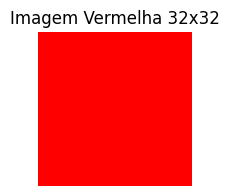

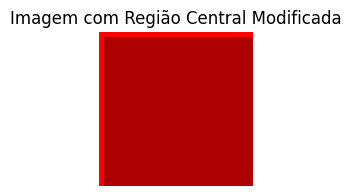

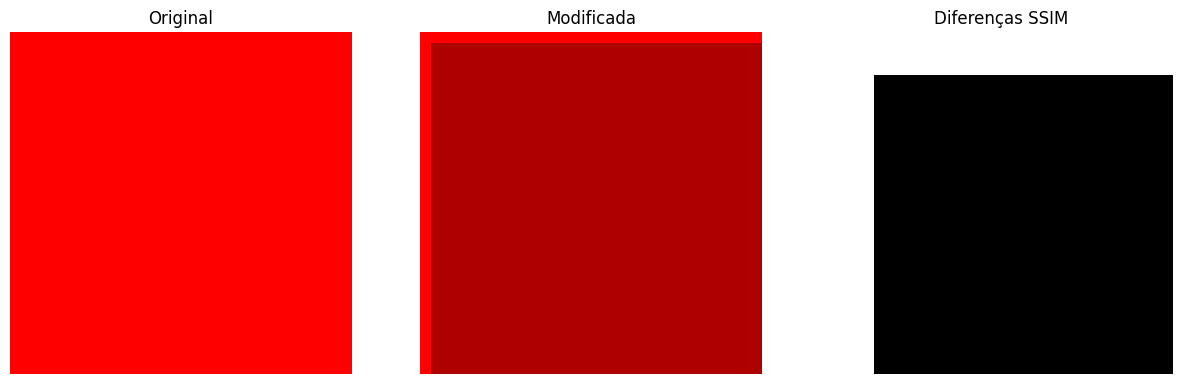

Gradiente = 170


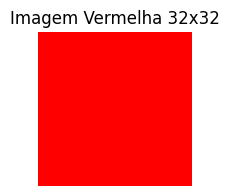

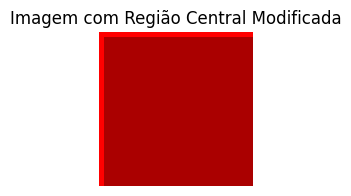

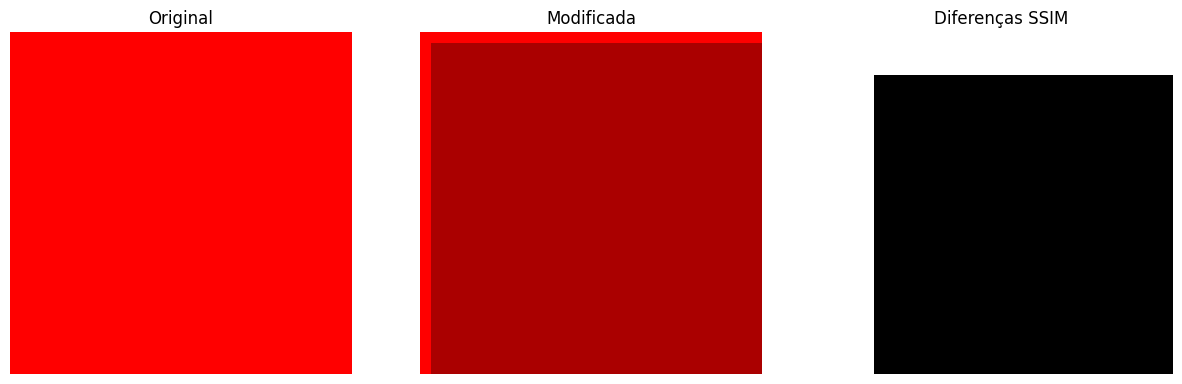

Gradiente = 165


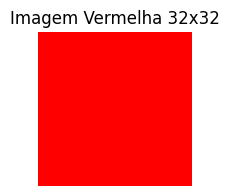

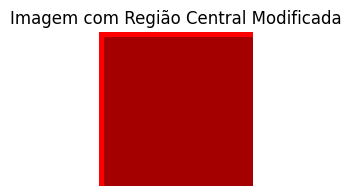

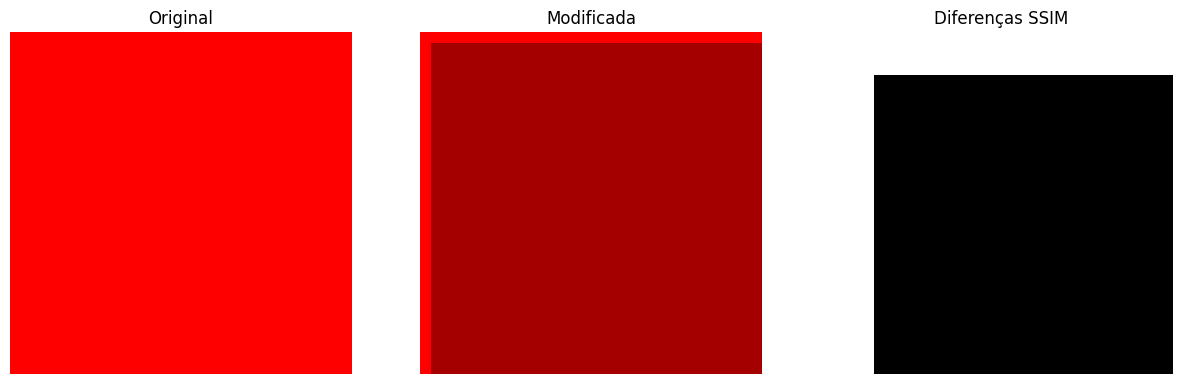

Gradiente = 160


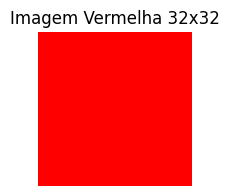

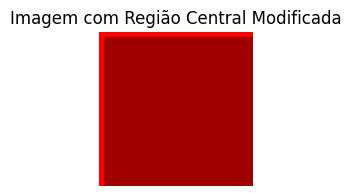

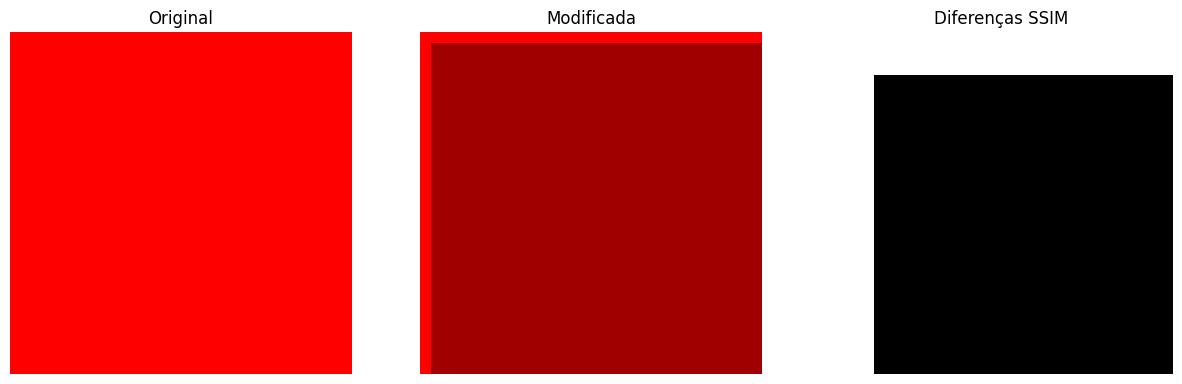

Gradiente = 155


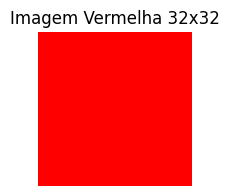

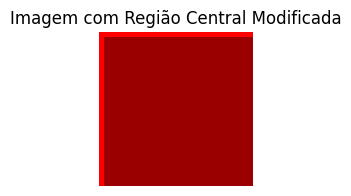

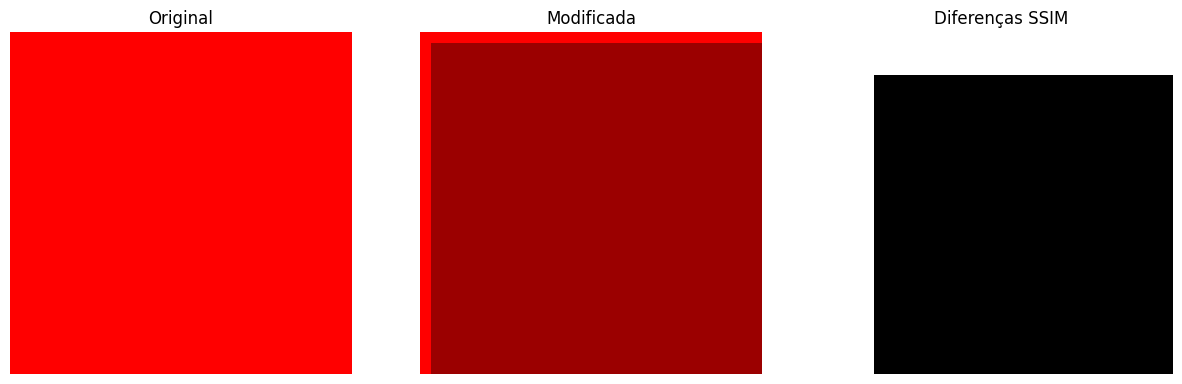

Gradiente = 150


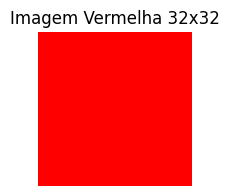

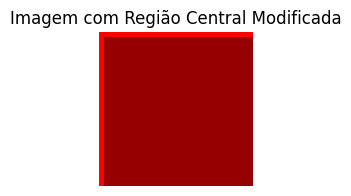

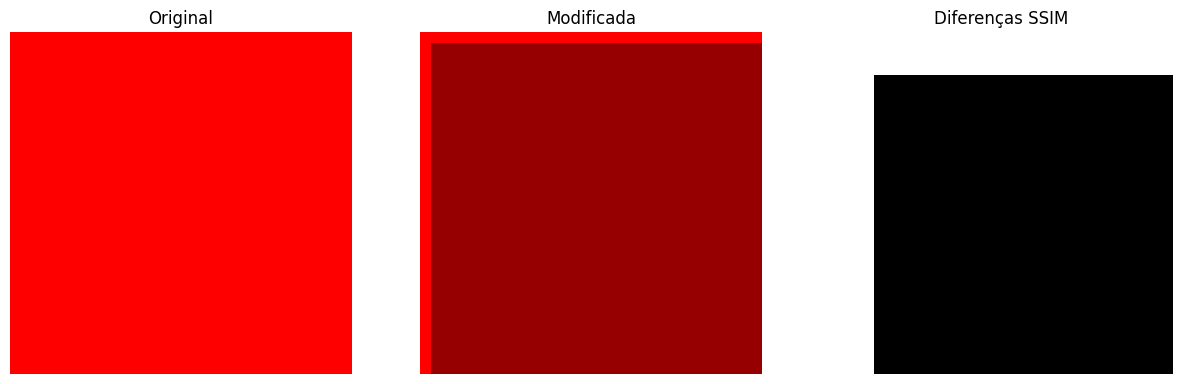

Gradiente = 145


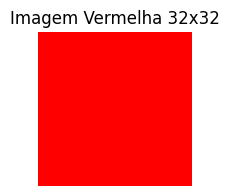

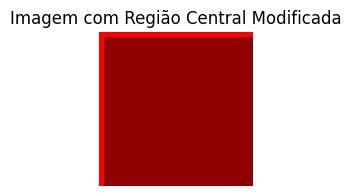

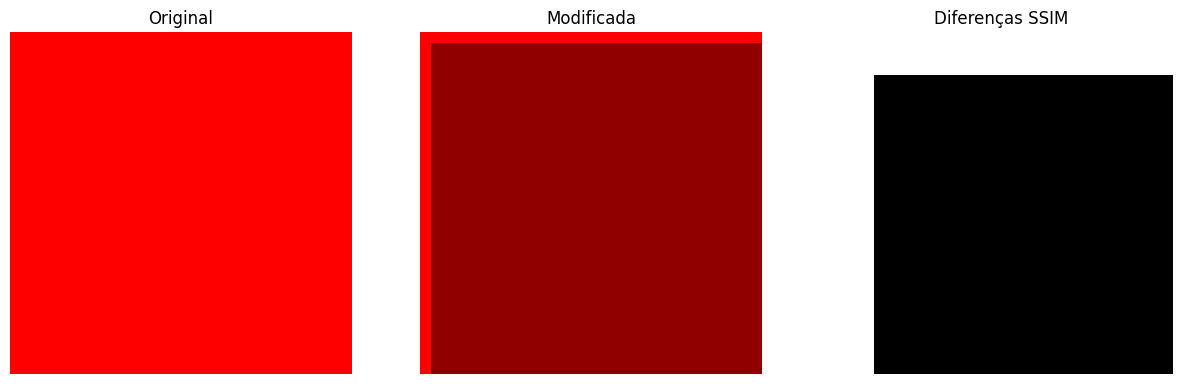

Gradiente = 140


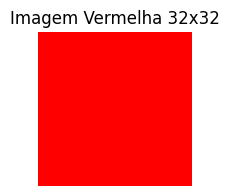

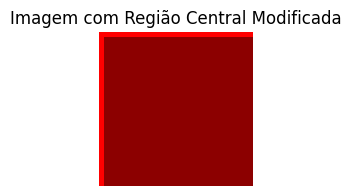

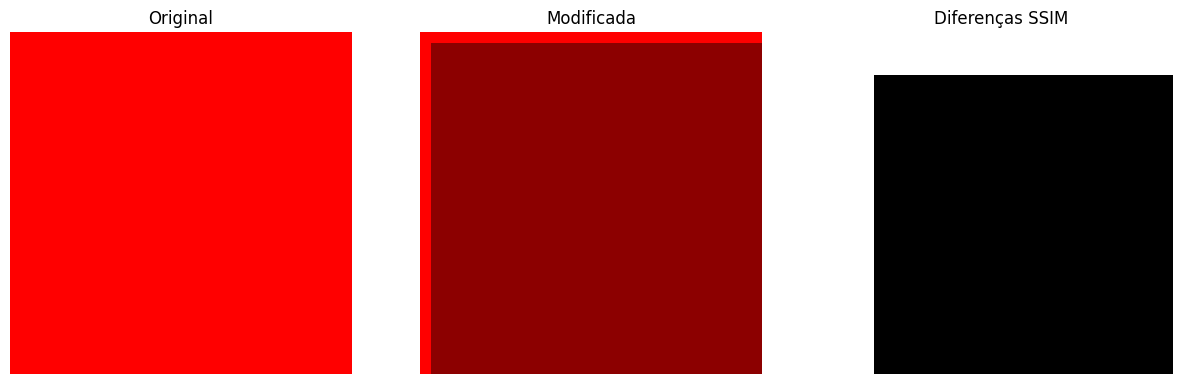

Gradiente = 135


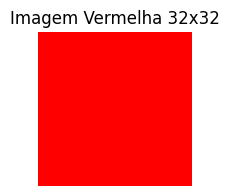

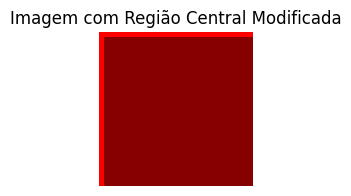

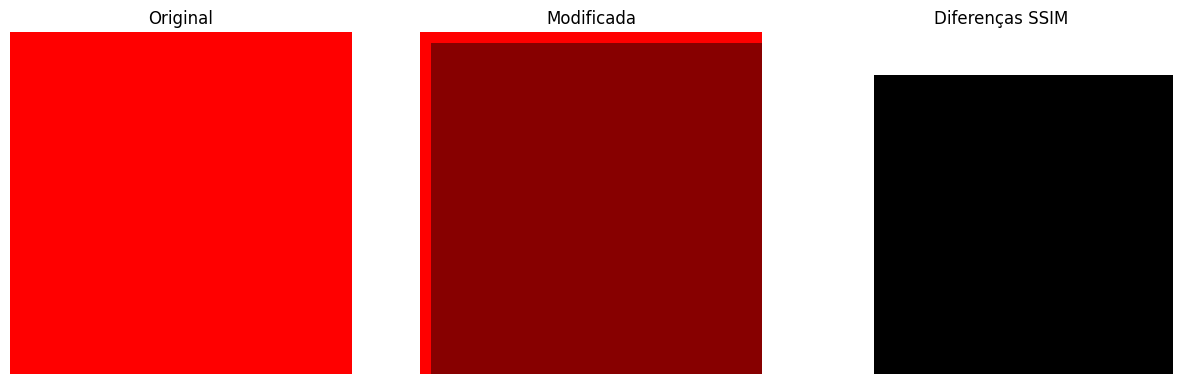

Gradiente = 130


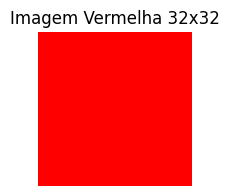

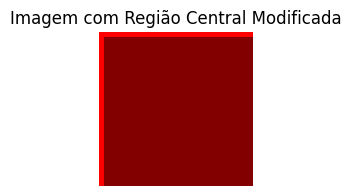

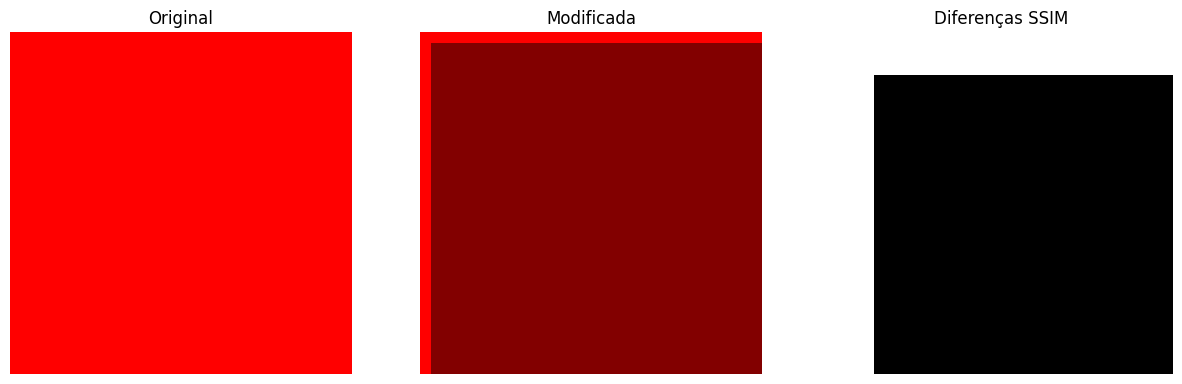

Gradiente = 125


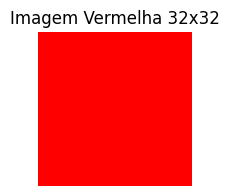

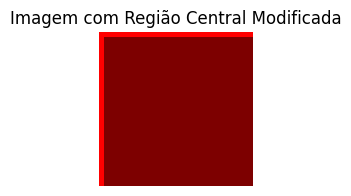

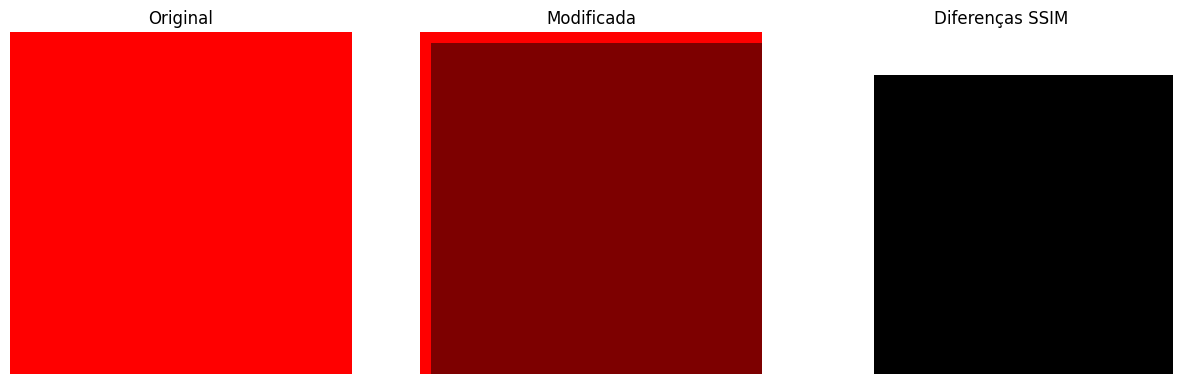

Gradiente = 120


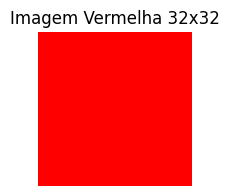

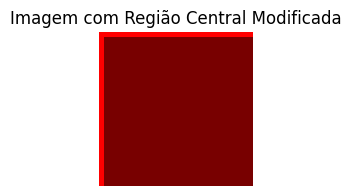

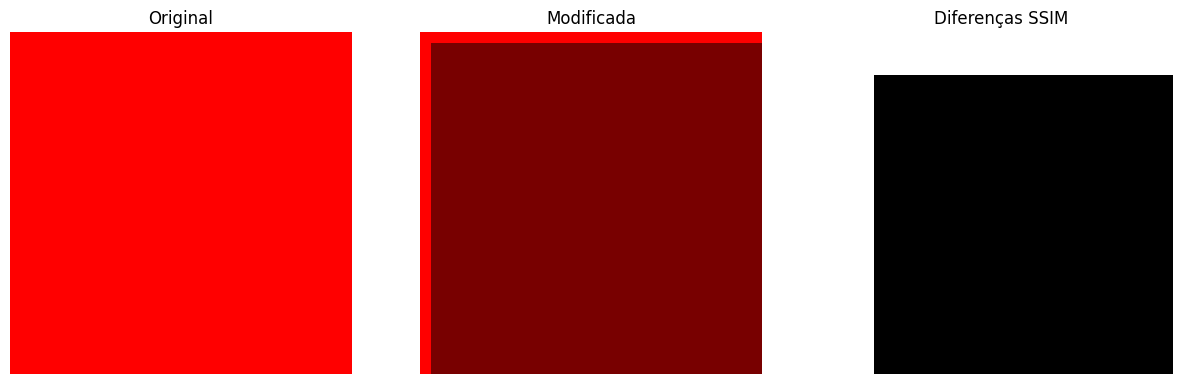

Gradiente = 115


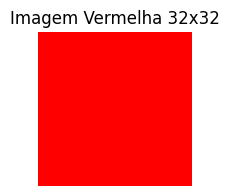

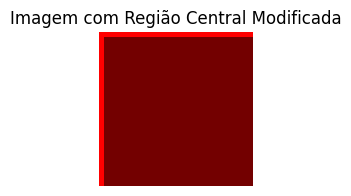

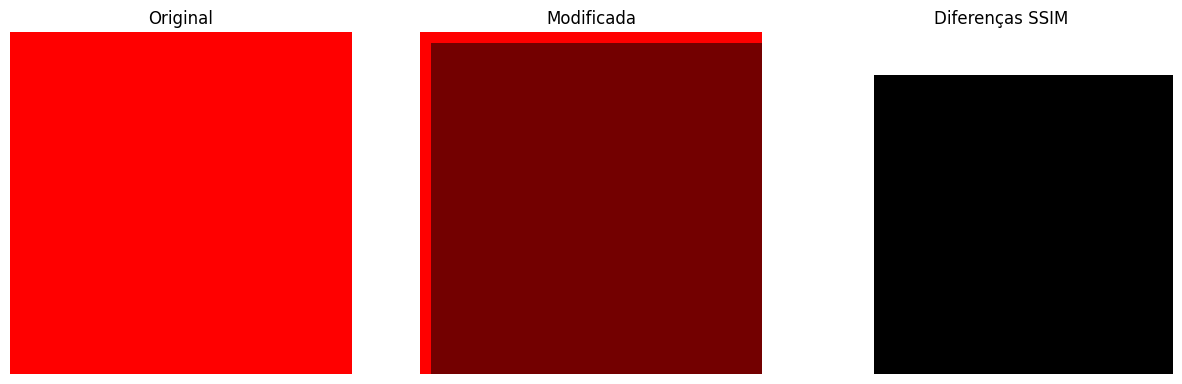

Gradiente = 110


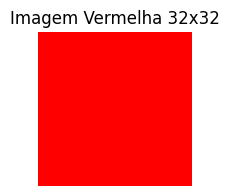

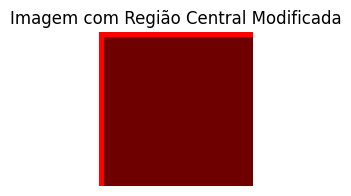

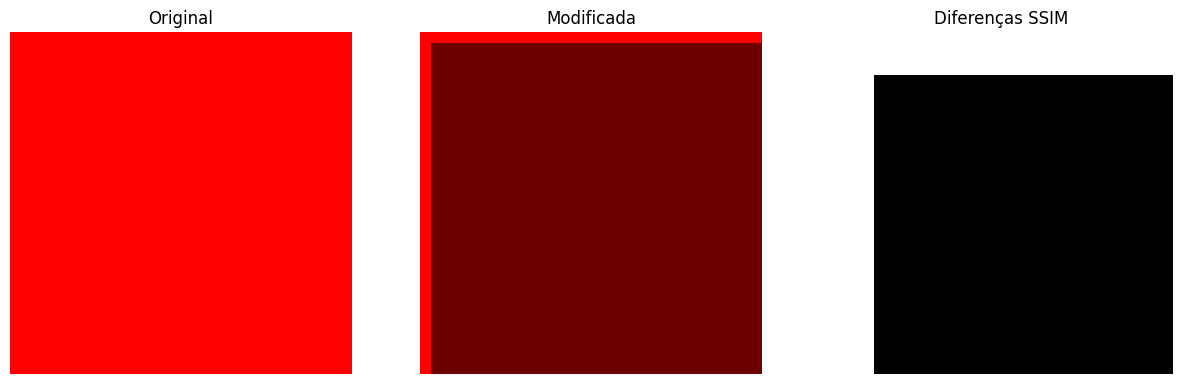

Gradiente = 105


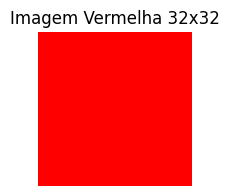

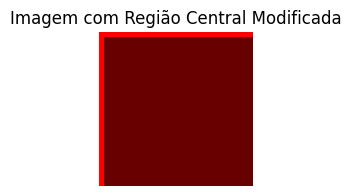

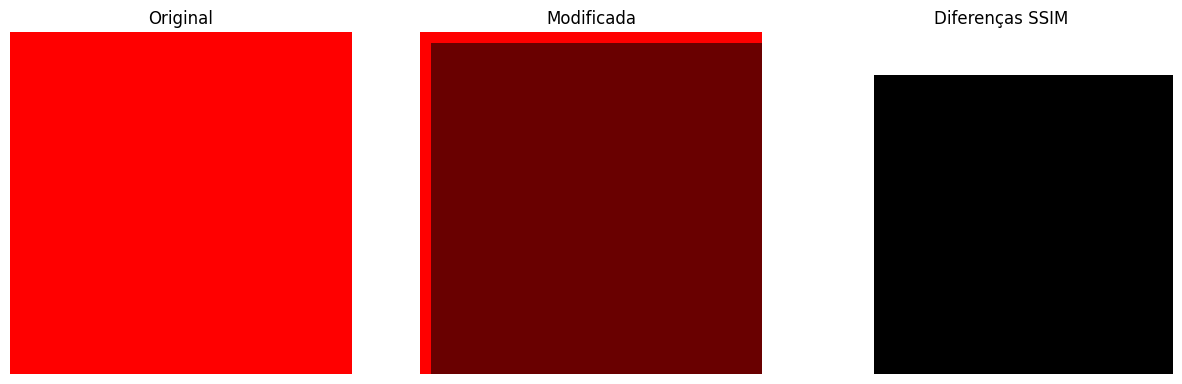

Gradiente = 100


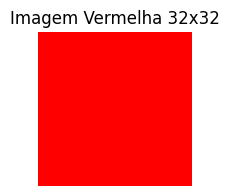

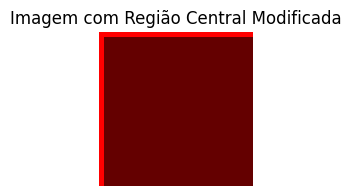

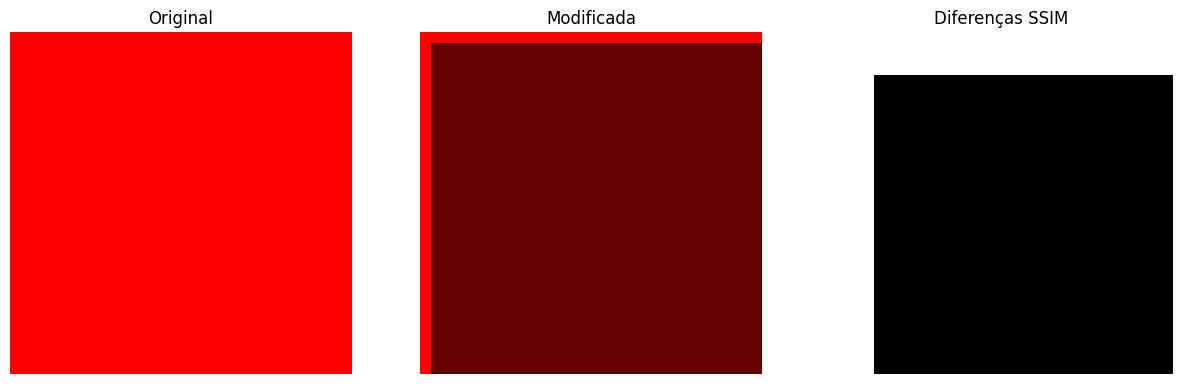

Gradiente = 95


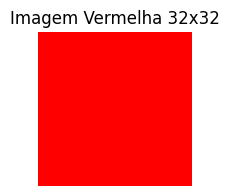

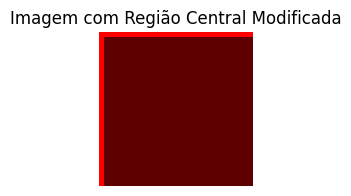

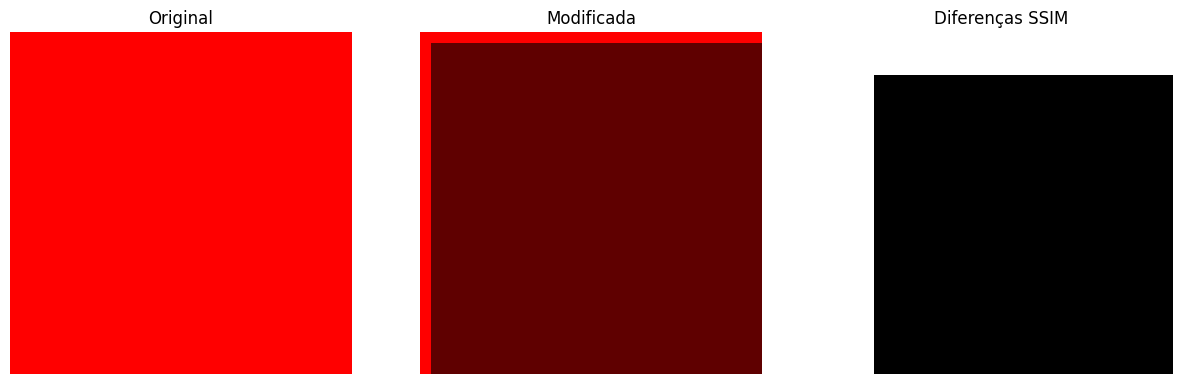

Gradiente = 90


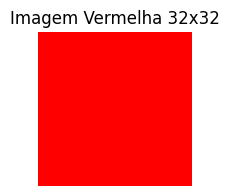

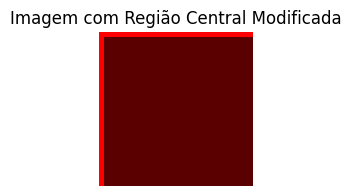

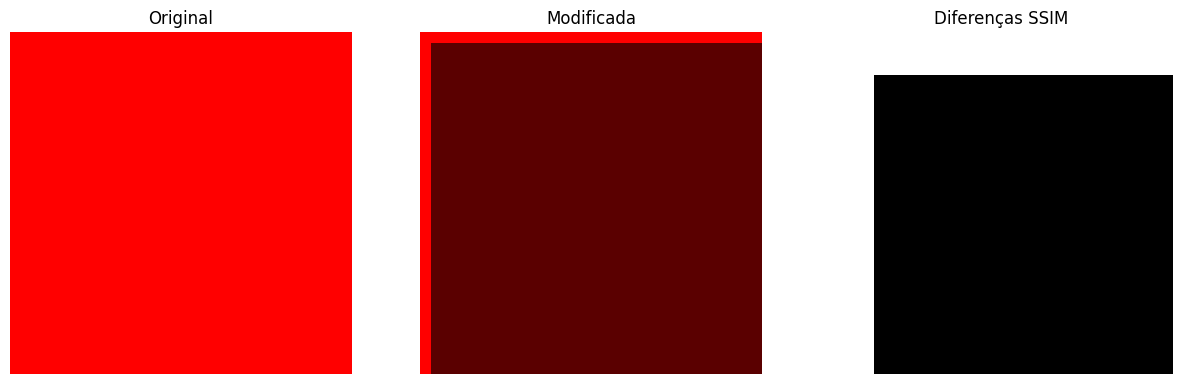

Gradiente = 85


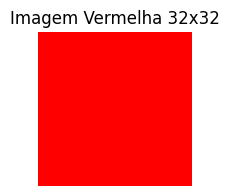

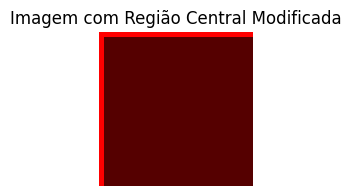

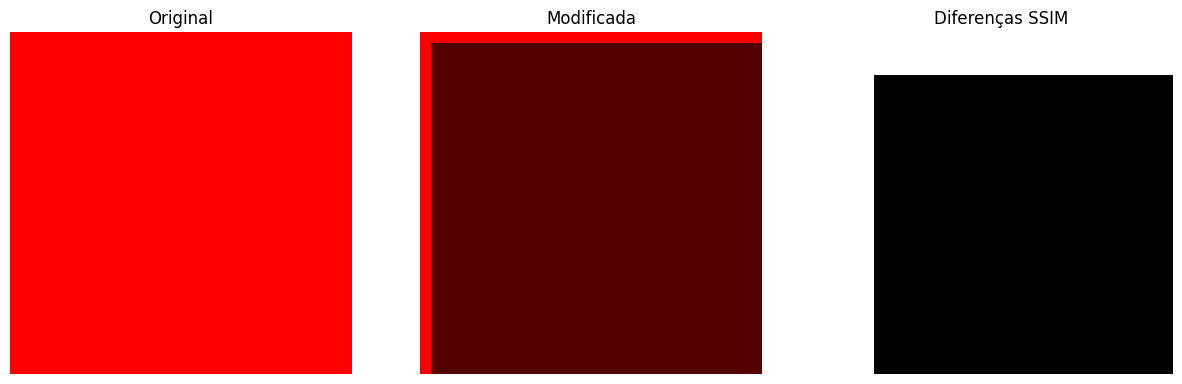

Gradiente = 80


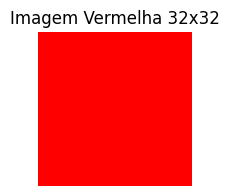

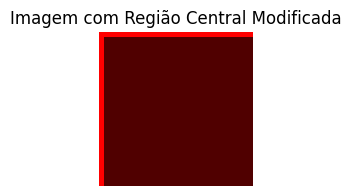

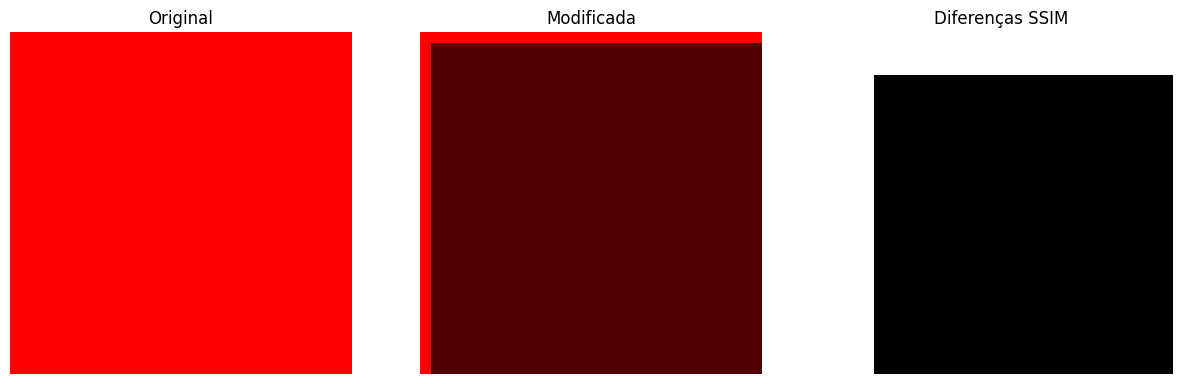

Gradiente = 75


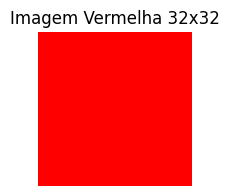

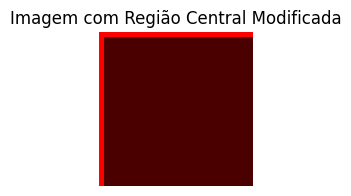

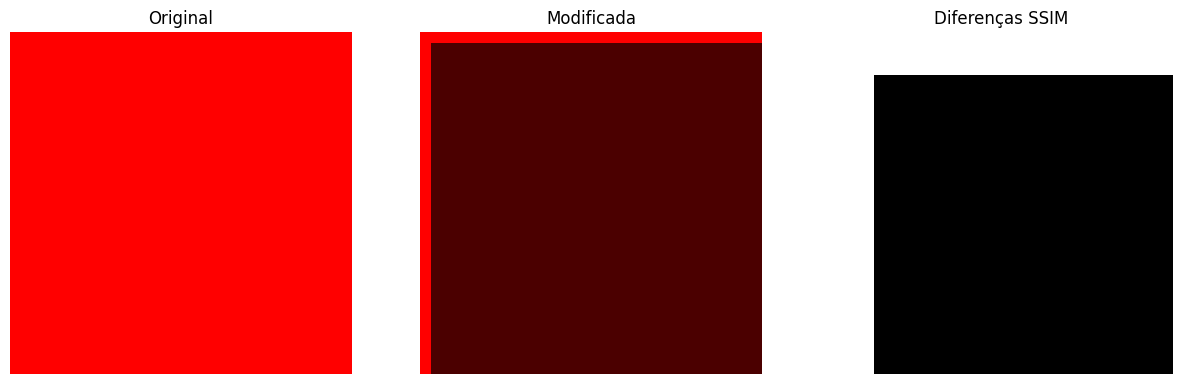

Gradiente = 70


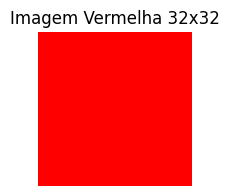

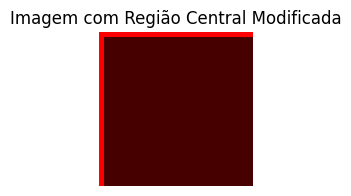

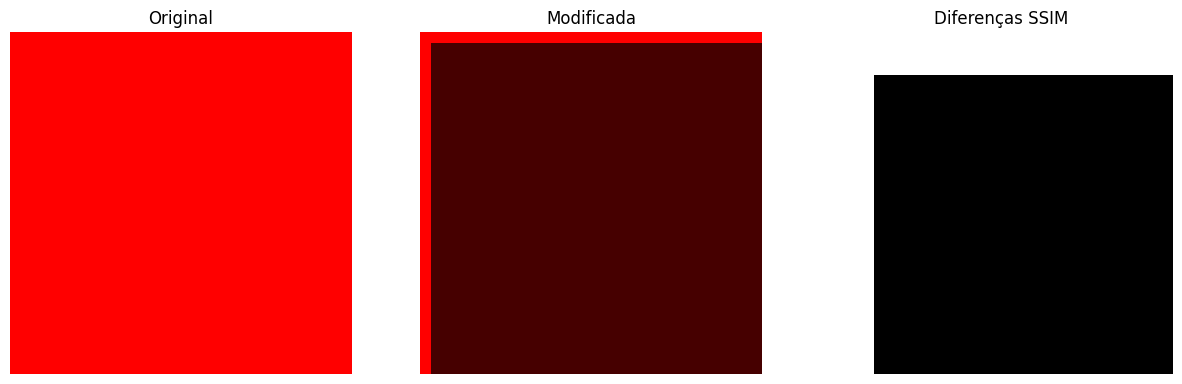

Gradiente = 65


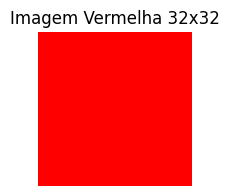

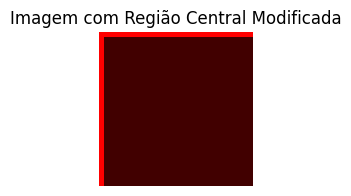

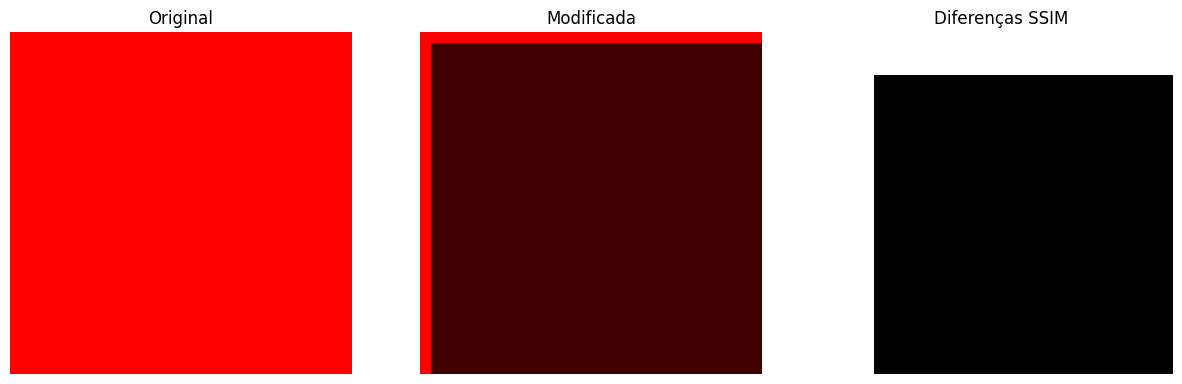

Gradiente = 60


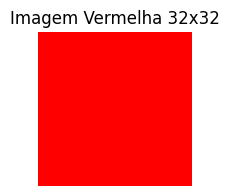

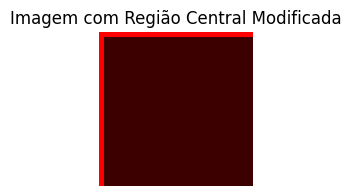

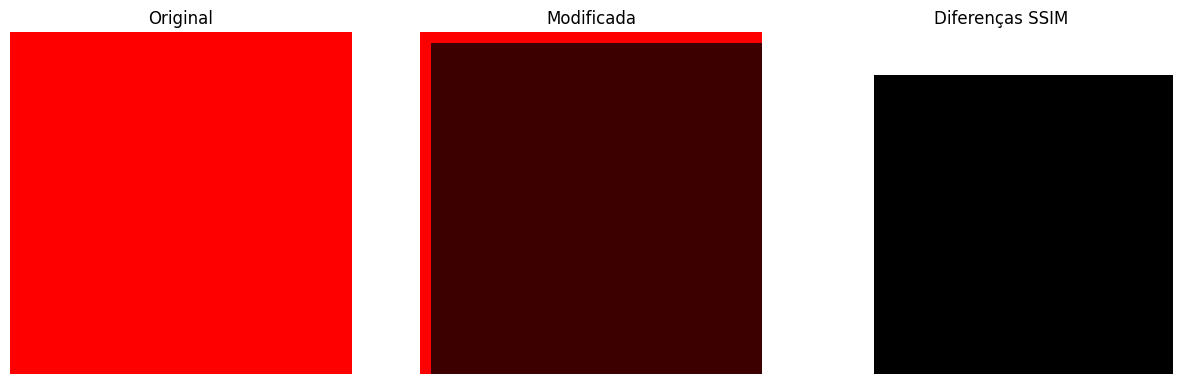

Gradiente = 55


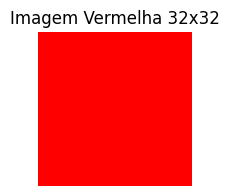

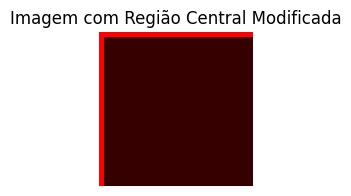

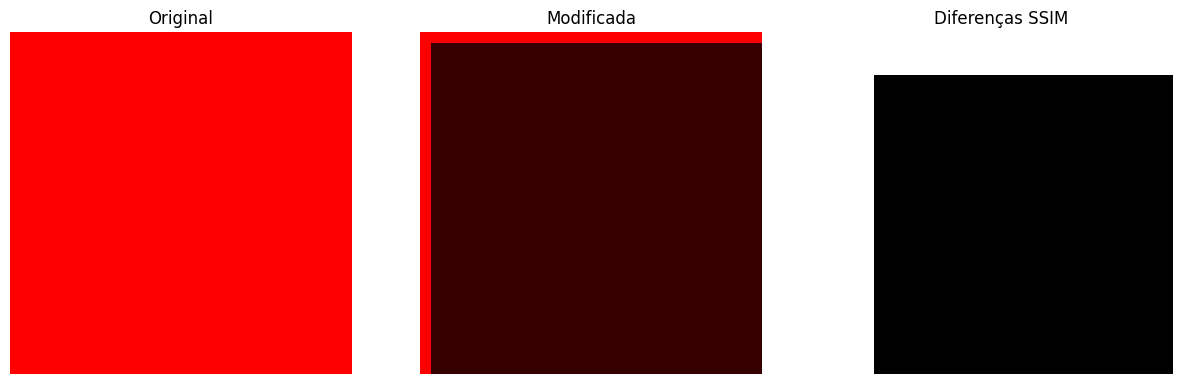

Gradiente = 50


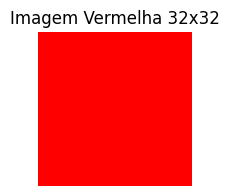

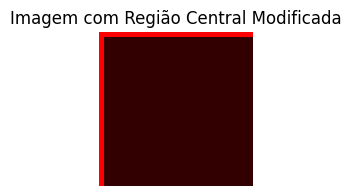

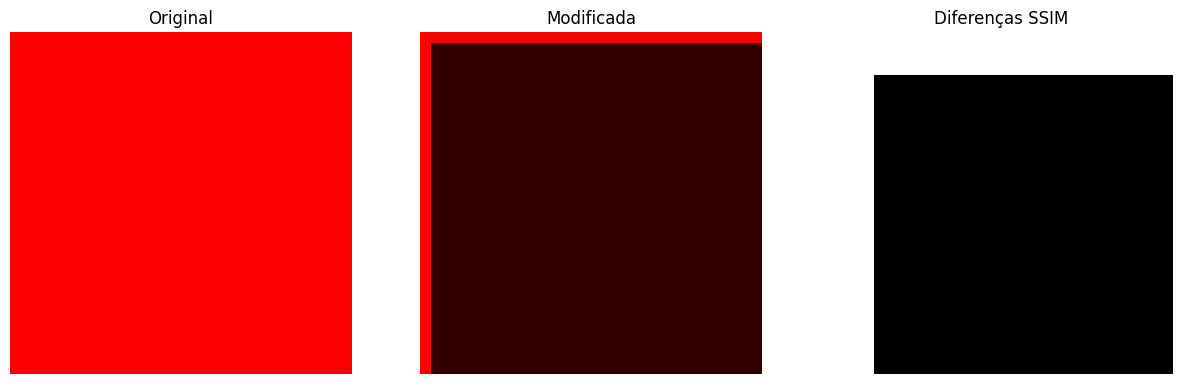

Gradiente = 45


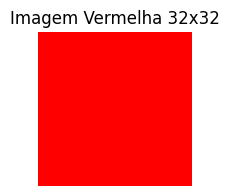

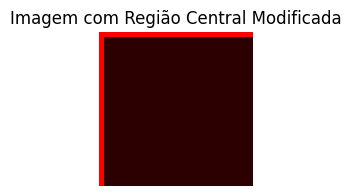

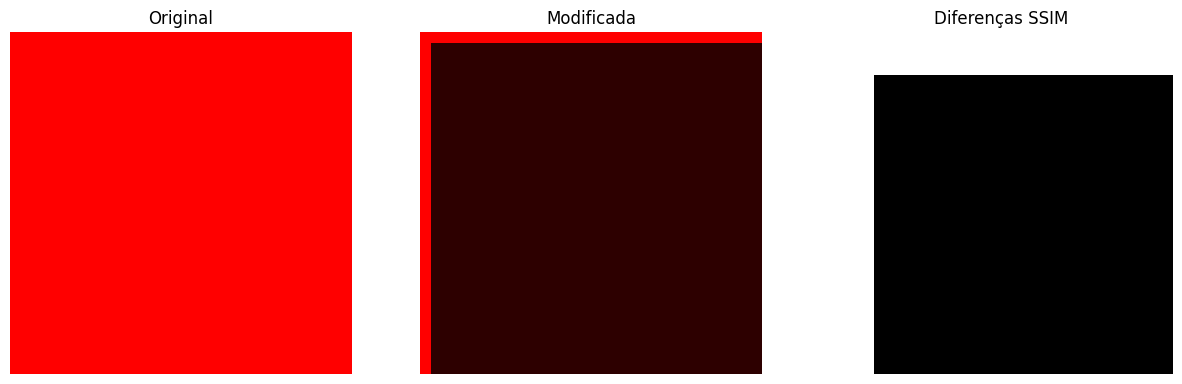

Gradiente = 40


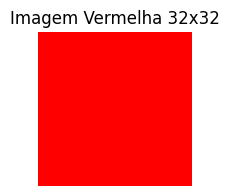

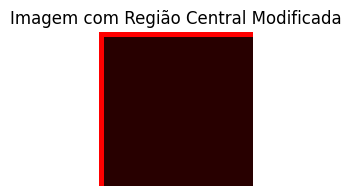

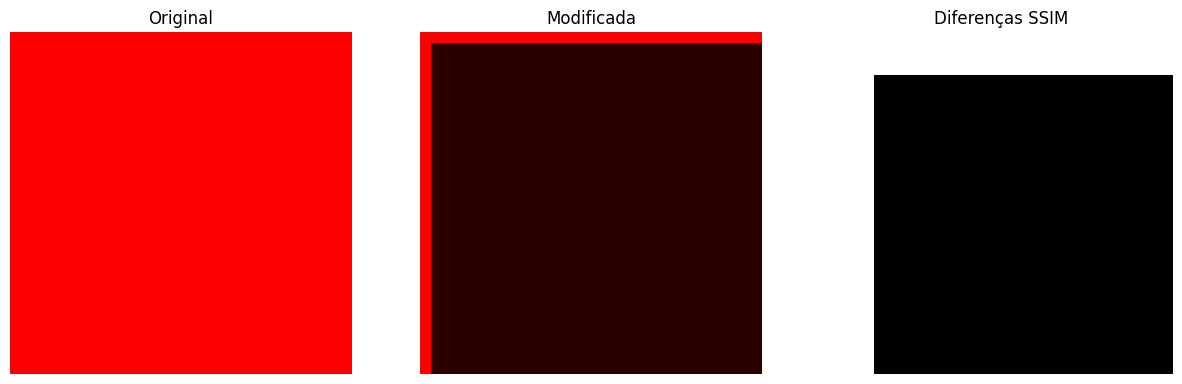

Gradiente = 35


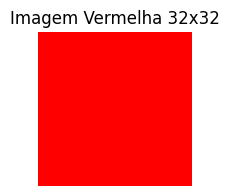

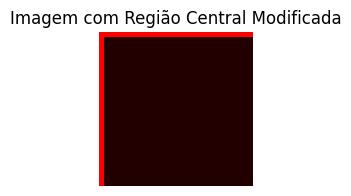

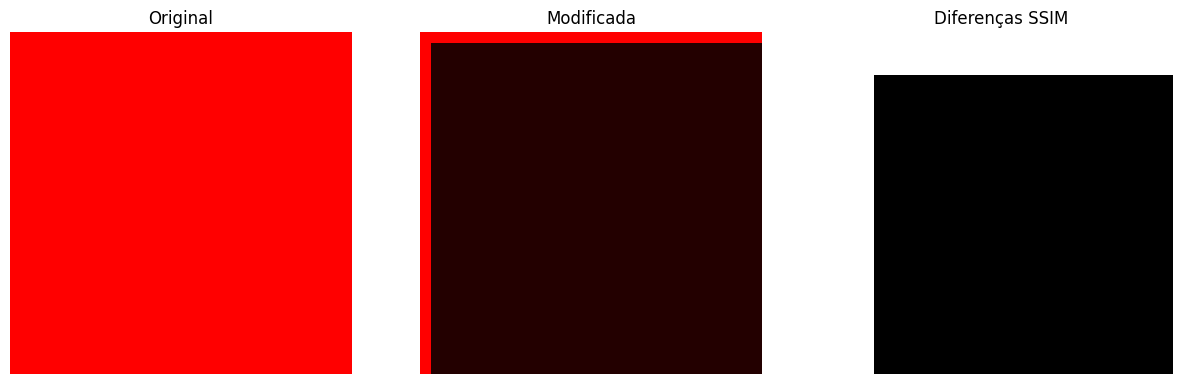

Gradiente = 30


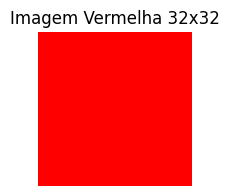

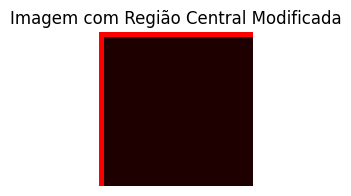

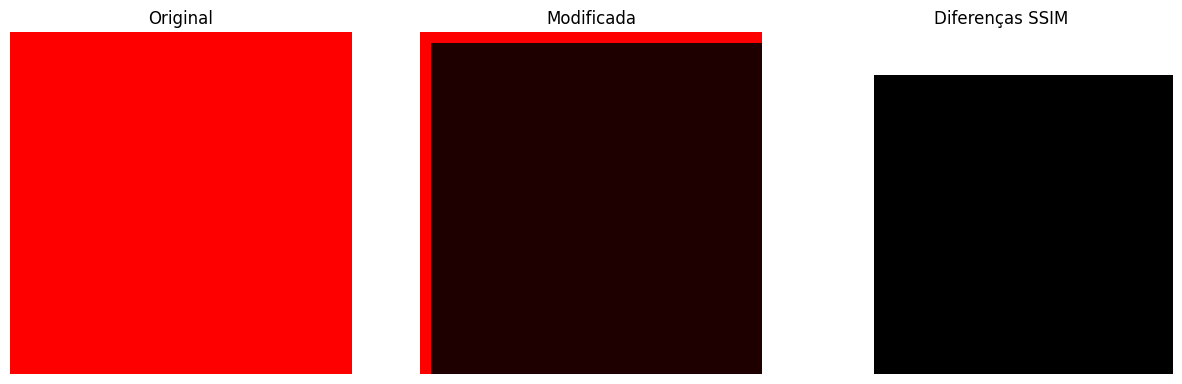

Gradiente = 25


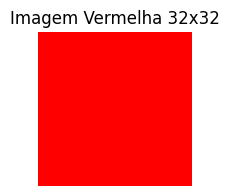

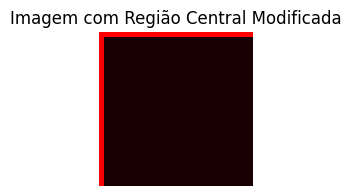

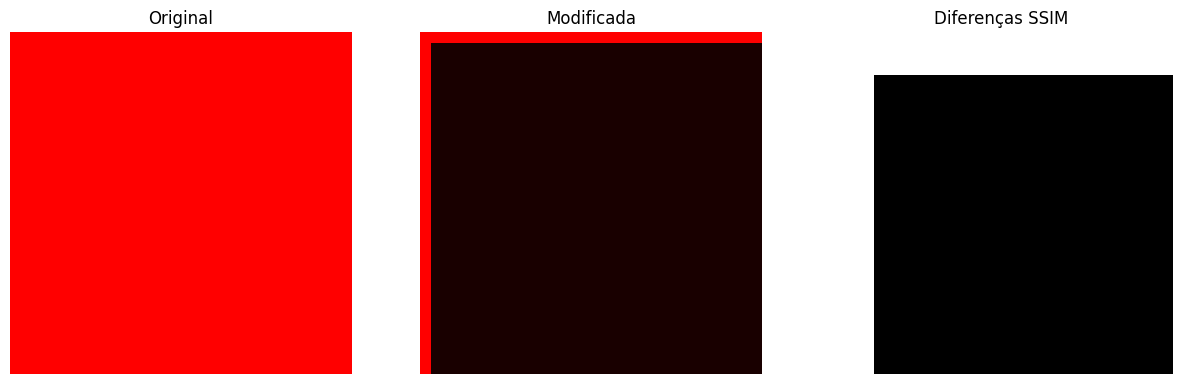

Gradiente = 20


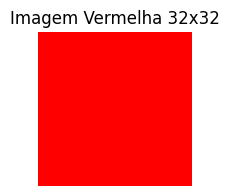

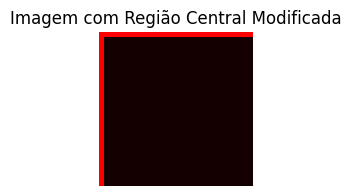

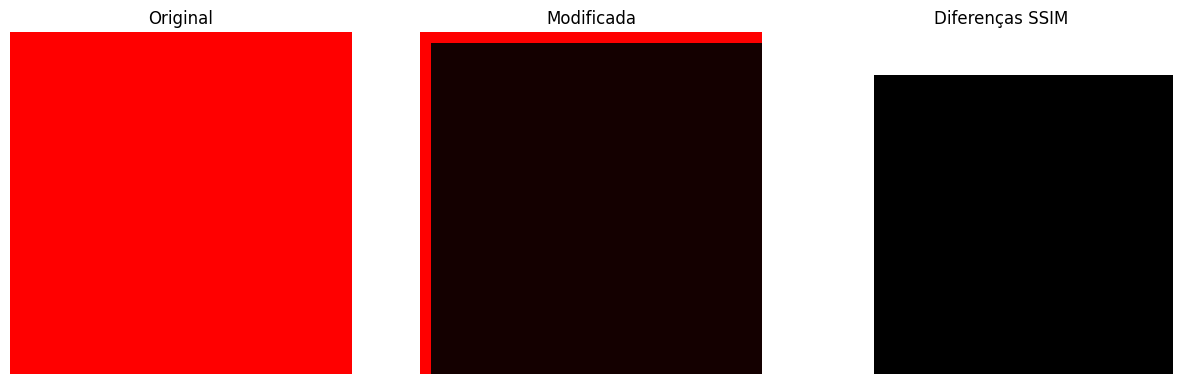

Gradiente = 15


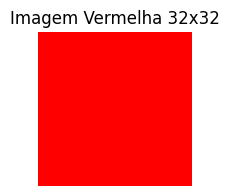

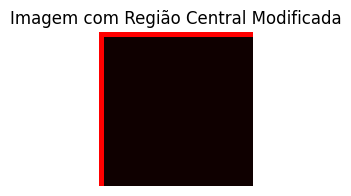

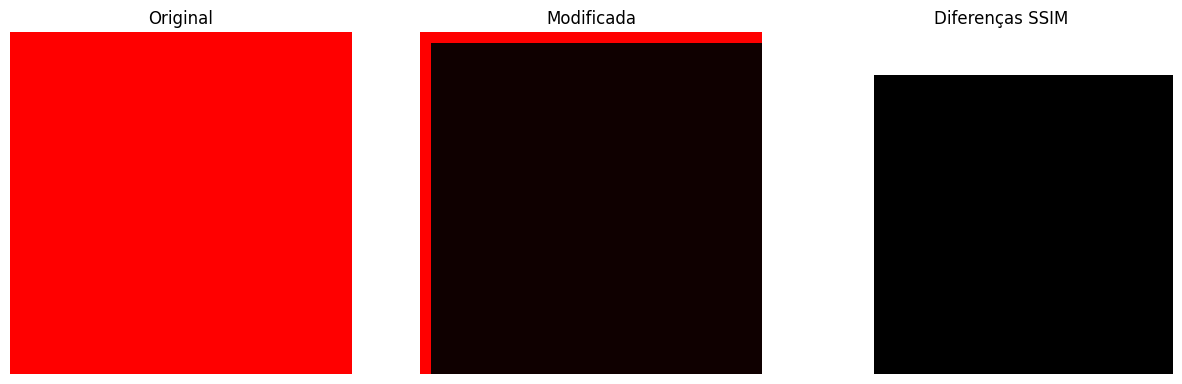

Gradiente = 10


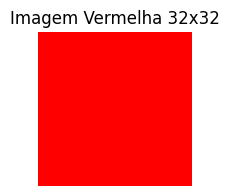

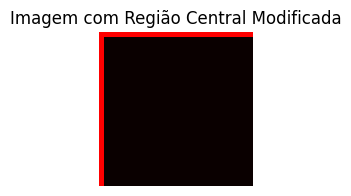

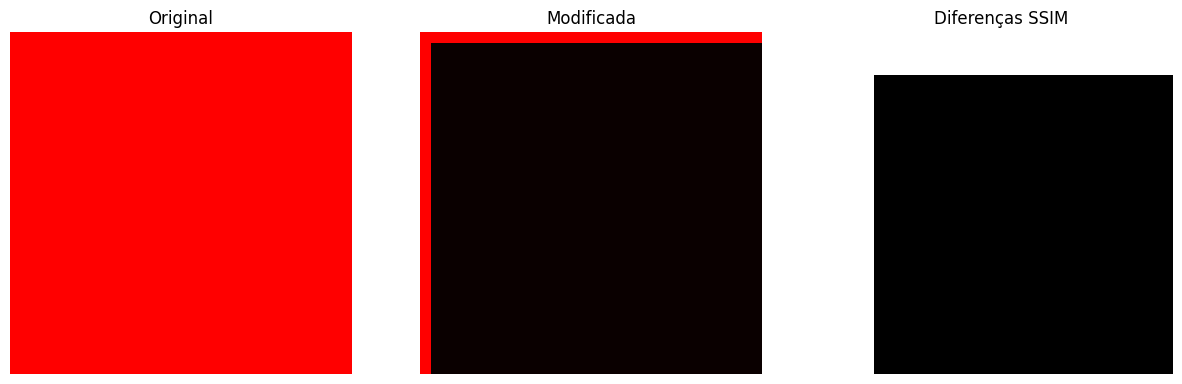

Gradiente = 5


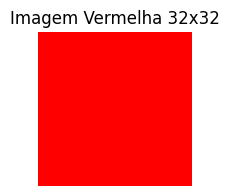

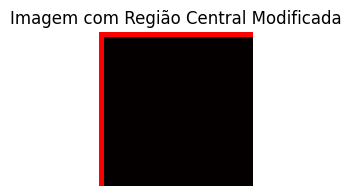

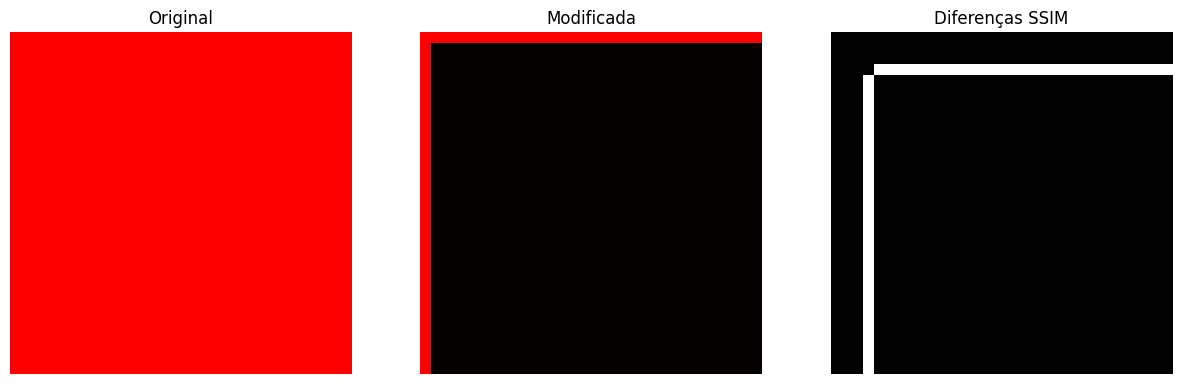

In [140]:
for i in range(255,0,-5):
    # Imprimindo gradientes
    print(f'Gradiente = {i}')
    
    # Gerar imagens
    gerar_img_mono_sem_e_com_ruido_2(i,31)
    
    # Carregar as duas imagens
    img_original = cv2.imread('img_sem_ruido.png')
    img_modificada = cv2.imread('img_com_ruido.png')

    # Executar a função
    SSIM_imagem(img_original, img_modificada)    

Nota-se que para um gradiente de $250$ que apenas uma região superior esquerda da borda foi identificada como mundança. Contudo, a partir de $245$ em valores inferiores, a mudança foi detectada. Da mesma forma a detecção se deu de forma alargada. Por volta do gradiente $5$ houve um erro significativo tomando a área modificada como não modificada em boa parte da figura correspondente às diferenças.

## 1.3 Mistura Gaussiana

Veremos que a Mistura Gaussiana não se mostra adequada para a percepção de mudanças em imagens. De modo análogo comecemos observando as diferenças nas imagens "original.png" e "modificada.png":

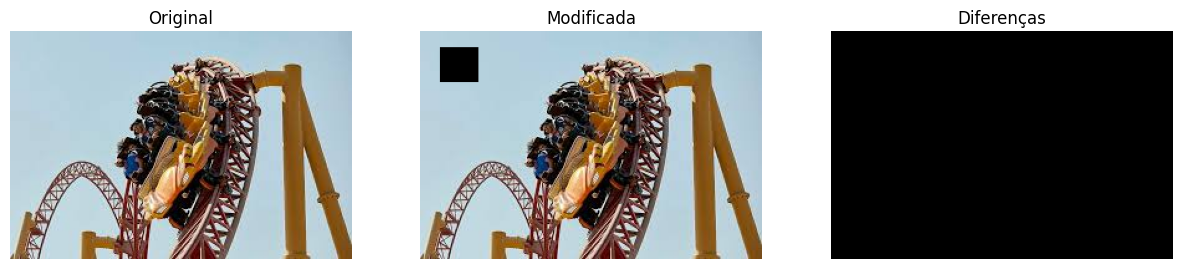

In [145]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mistura_gaussiana(img_original, img_modificada):
    # Inicializar o MOG2
    fgbg = cv2.createBackgroundSubtractorMOG2(detectShadows=False)

    # Aplicar o MOG2 às duas imagens
    # Primeiro à imagem original para "aprender" o fundo
    fgbg.apply(img_original)
    # Depois à imagem modificada para detectar diferenças
    fgmask2 = fgbg.apply(img_modificada)

    # Gerar a imagem de diferenças
    # Nota: Isso irá destacar as áreas que mudaram
    diferencas = cv2.bitwise_and(img_modificada, img_modificada, mask=fgmask2)

    # Exibir as imagens lado a lado usando matplotlib
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 linha, 3 colunas
    axs[0].imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original')
    axs[0].axis('off')  # Desligar os eixos

    axs[1].imshow(cv2.cvtColor(img_modificada, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Modificada')
    axs[1].axis('off')  # Desligar os eixos

    axs[2].imshow(cv2.cvtColor(diferencas, cv2.COLOR_BGR2RGB))
    axs[2].set_title('Diferenças')
    axs[2].axis('off')  # Desligar os eixos

    plt.show()

# Carregar as duas imagens
img_original = cv2.imread('original.png')
img_modificada = cv2.imread('modificada.png')

# Executar a função
mistura_gaussiana(img_original, img_modificada)


Em princípio nenhuma mudança foi notada (sem fundo branco na terceira imagem)!

Agora, vejamos a detecção da mudança em relação às imagens "mono_vermelha.png" e "mono_vermelha_1_preta.png":

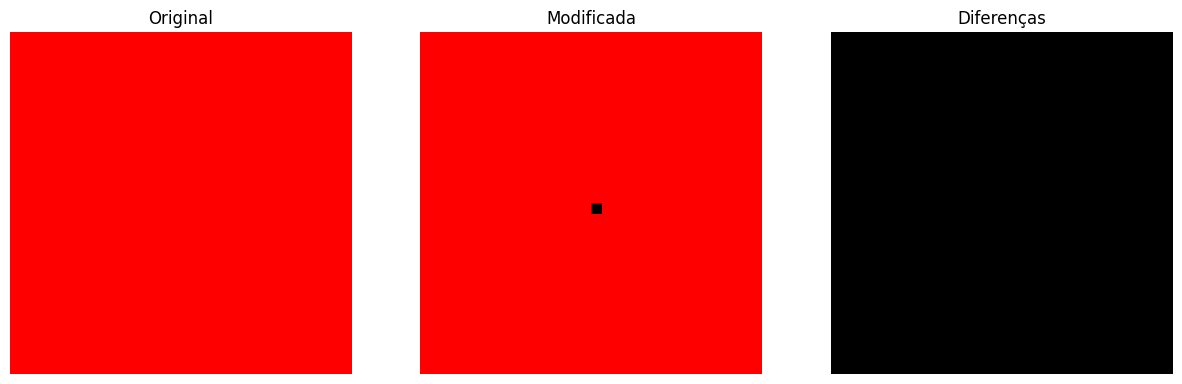

In [146]:
# Carregar as duas imagens
img_original = cv2.imread('mono_vermelha.png')
img_modificada = cv2.imread('mono_vermelha_1_preta.png')

# Executar a função
mistura_gaussiana(img_original, img_modificada)

Da mesma forma, a mudança de um único pixel, em tonalidade oposta não foi percebido.

Neste caso, nota-se que a Mistura Gaussiana não se adequa à situações de análise de mudanças em apenas duas imagens diferente dos métodos anteriores. Perceberemos que sua aplicabilidade se mostrará eficiente quando estamos tratando de ambientes mais dinâmicos.

# 2. Detecção de Movimento em Vídeos (em construção)

Utilizaremos uma metodologia bastante semelhante à anterior, contudo, no contexto de vídeos ao invés de imagens. Apresentaremos versões de código para entrada de vídeo via webcam e para entrada via arquivo. Em nossa análise consideraremos o video "cavitacao.mp4" que consta da filmagem de água em uma tubulação transparente a fim de detectar a presença de bolhas.

In [4]:
from IPython.display import Video

# Caminho do arquivo
video_path = 'cavitacao.mp4'

# Exibir o vídeo com um tamanho específico
Video(video_path, width=320, height=240)  # Ajuste a largura e a altura conforme desejado


## 2.1 Subtração de Imagens

### Entrada de Vídeo via Webcam

In [144]:
import cv2
import numpy as np

def release_resources(cap):
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

def subtracao_frame_a_frame(cap):
    ret, frame_anterior = cap.read()
    if not ret:
        print("Erro ao capturar o primeiro frame.")
        return
    
    tamanho_desejado = (640, 480)  # Defina o tamanho desejado para a exibição dos frames
    frame_anterior = cv2.resize(frame_anterior, tamanho_desejado)  # Redimensionar o primeiro frame

    contador_frames = 0
    contagem_movimentos = 0

    try:
        while True:
            ret, frame_atual = cap.read()
            if not ret:
                print("Erro ao capturar o frame.")
                break
            
            # Convertendo os frames para escala de cinza para a subtração
            frame_anterior_gray = cv2.cvtColor(frame_anterior, cv2.COLOR_BGR2GRAY)
            frame_atual_gray = cv2.cvtColor(frame_atual, cv2.COLOR_BGR2GRAY)
            
            # Subtrair o frame atual do anterior
            diferenca = cv2.absdiff(frame_atual_gray, frame_anterior_gray)
            
            # Aplicar thresholding para destacar as diferenças
            _, diferenca_thresh = cv2.threshold(diferenca, 30, 255, cv2.THRESH_BINARY)
            
            # Contagem de movimentos baseada na área de contornos na imagem de diferença
            contornos, _ = cv2.findContours(diferenca_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            for contorno in contornos:
                if cv2.contourArea(contorno) > 1000:  # Ajuste este valor conforme necessário
                    x, y, w, h = cv2.boundingRect(contorno)
                    cv2.rectangle(frame_atual, (x, y), (x+w, y+h), (0, 255, 0), 2)
                    contagem_movimentos += 1

            contador_frames += 1
            cv2.putText(frame_atual, f'Frames Lidos: {contador_frames}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
            cv2.putText(frame_atual, f'Movimentos Detectados: {contagem_movimentos}', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            
            cv2.imshow('Frame Atual', frame_atual)
            cv2.imshow('Diferenca', diferenca_thresh)

            # Preparar o próximo loop
            frame_anterior = frame_atual.copy()

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    finally:
        release_resources(cap)

cap = cv2.VideoCapture(0)  # Ajuste o índice conforme necessário
if not cap.isOpened():
    print("Erro ao acessar a câmera.")
else:
    subtracao_frame_a_frame(cap)


KeyboardInterrupt: 

### Entrada de Vídeo via Arquivo

In [166]:
import cv2
import numpy as np

def release_resources(cap):
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

def subtracao_frame_a_frame(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Erro ao abrir o arquivo de vídeo.")
        return
    
    ret, frame_anterior = cap.read()
    if not ret:
        print("Erro ao capturar o primeiro frame.")
        return

    tamanho_desejado = (640, 480)  # Defina o tamanho desejado para a exibição dos frames
    frame_anterior = cv2.resize(frame_anterior, tamanho_desejado)  # Redimensionar o primeiro frame

    contador_frames = 0
    contagem_movimentos = 0

    try:
        while True:
            ret, frame_atual = cap.read()
            if not ret:
                print("Fim do vídeo.")
                break
            
            frame_atual = cv2.resize(frame_atual, tamanho_desejado)  # Redimensionar cada frame para o tamanho desejado
            
            # Convertendo os frames para escala de cinza para a subtração
            frame_anterior_gray = cv2.cvtColor(frame_anterior, cv2.COLOR_BGR2GRAY)
            frame_atual_gray = cv2.cvtColor(frame_atual, cv2.COLOR_BGR2GRAY)
            
            # Subtrair o frame atual do anterior
            diferenca = cv2.absdiff(frame_atual_gray, frame_anterior_gray)
            
            # Aplicar thresholding para destacar as diferenças
            _, diferenca_thresh = cv2.threshold(diferenca, 30, 255, cv2.THRESH_BINARY)
            
            # Contagem de movimentos baseada na área de contornos na imagem de diferença
            contornos, _ = cv2.findContours(diferenca_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            for contorno in contornos:
                if cv2.contourArea(contorno) > 180:  # Ajuste este valor conforme necessário
                    x, y, w, h = cv2.boundingRect(contorno)
                    cv2.rectangle(frame_atual, (x, y), (x+w, y+h), (0, 255, 0), 2)
                    contagem_movimentos += 1

            contador_frames += 1
            cv2.putText(frame_atual, f'Frames Lidos: {contador_frames}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
            cv2.putText(frame_atual, f'Movimentos Detectados: {contagem_movimentos}', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            
            cv2.imshow('Frame Atual', frame_atual)
            cv2.imshow('Diferenca', diferenca_thresh)

            # Preparar o próximo loop
            frame_anterior = frame_atual.copy()

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        print(contagem_movimentos)
    finally:
        release_resources(cap)


In [167]:
# Caminho do arquivo de vídeo
video_path = 'cavitacao.mp4'
subtracao_frame_a_frame(video_path)

Fim do vídeo.
2


Pode-se notar, em princípio, que há alguma detecção de bolhas na passagem da água, muito embora não tenha sido detectados com retângulos de marcação considerando "cv2.contourArea(contorno) > X" e também para em $200 < X < 1000$. Apenas para apoximadamente $X = 180$ e valores inferiores tivemos a detecção de mudanças as quais não foram marcadas com retângulos enquadrando o movimento. Muito provavelmente esta não foi uma abordagem adequada. Note que, a movimentação de água é percebida visualmente:<br><br>

<center> <img src="saida_sub.jpg" alt="jpg_python" width="700" height=""> </center>

## 2.2 SSIM (Structural Similarity Index)

### Entrada de Vídeo via Webcam

In [80]:
from skimage.metrics import structural_similarity as ssim
import cv2
import numpy as np

def calcular_ssim_e_exibir(frame_anterior, frame_atual):
    # Converter para escala de cinza
    frame_anterior_gray = cv2.cvtColor(frame_anterior, cv2.COLOR_BGR2GRAY)
    frame_atual_gray = cv2.cvtColor(frame_atual, cv2.COLOR_BGR2GRAY)

    # Calcular SSIM entre os dois frames
    score, diff = ssim(frame_anterior_gray, frame_atual_gray, full=True)
    diff = (diff * 255).astype("uint8")

    # Usar thresholding para destacar as diferenças
    _, diff_thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    # Exibir em tempo real
    cv2.imshow('Frame Atual', frame_atual)
    cv2.imshow('Diferenças SSIM', diff_thresh)

def processar_video_com_ssim(cap):
    ret, frame_anterior = cap.read()
    if not ret:
        print("Erro ao capturar o primeiro frame.")
        return

    try:
        while True:
            ret, frame_atual = cap.read()
            if not ret:
                break

            calcular_ssim_e_exibir(frame_anterior, frame_atual)

            # Preparar para o próximo loop
            frame_anterior = frame_atual.copy()

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    finally:
        cap.release()
        cv2.destroyAllWindows()
        cv2.waitKey(1)

# Iniciar captura de vídeo
cap = cv2.VideoCapture(0)  # Ajuste o índice conforme necessário
if not cap.isOpened():
    print("Erro ao acessar a câmera.")
else:
    processar_video_com_ssim(cap)


KeyboardInterrupt: 

### Entrada de Vídeo via Arquivo

In [86]:
from skimage.metrics import structural_similarity as ssim
import cv2
import numpy as np

def calcular_ssim_e_exibir(frame_anterior, frame_atual, tamanho_desejado):
    # Redimensionar os frames para garantir que tenham o mesmo tamanho
    frame_anterior_resized = cv2.resize(frame_anterior, tamanho_desejado)
    frame_atual_resized = cv2.resize(frame_atual, tamanho_desejado)

    # Converter para escala de cinza
    frame_anterior_gray = cv2.cvtColor(frame_anterior_resized, cv2.COLOR_BGR2GRAY)
    frame_atual_gray = cv2.cvtColor(frame_atual_resized, cv2.COLOR_BGR2GRAY)

    # Calcular SSIM entre os dois frames
    score, diff = ssim(frame_anterior_gray, frame_atual_gray, full=True)
    diff = (diff * 255).astype("uint8")

    # Usar thresholding para destacar as diferenças
    _, diff_thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    # Exibir em tempo real
    cv2.imshow('Frame Atual', frame_atual_resized)
    cv2.imshow('Diferenças SSIM', diff_thresh)

def processar_video_com_ssim(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Erro ao abrir o arquivo de vídeo.")
        return

    ret, frame_anterior = cap.read()
    if not ret:
        print("Erro ao capturar o primeiro frame.")
        return
    
    tamanho_desejado = (640, 480)  # Defina o tamanho desejado para a exibição dos frames

    try:
        while True:
            ret, frame_atual = cap.read()
            if not ret:
                print("Fim do vídeo.")
                break

            calcular_ssim_e_exibir(frame_anterior, frame_atual, tamanho_desejado)

            # Preparar para o próximo loop
            frame_anterior = frame_atual.copy()

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    finally:
        cap.release()
        cv2.destroyAllWindows()
        cv2.waitKey(1)


In [87]:
# Caminho do arquivo de vídeo
video_path = 'cavitacao.mp4'
processar_video_com_ssim(video_path)

Fim do vídeo.


Pode-se notar, em princípio, que há alguma detecção de bolhas na passagem da água:<br><br>

<center> <img src="saida_ssim.jpg" alt="jpg_python" width="700" height=""> </center>

Em alguns casos a exibição do vídeo ficou bastante ruidosa o que mostra, conforme, visto para a detecção de mudanças em imagens que há uma espécie de superestimação do movimento. Não obtivemos uma metodologia adequada para a estimativa de pontos de movimentação.

## 2.3 Mistura Gaussiana (MOG2)

### Entrada de Vídeo via Webcam

In [90]:
import cv2
import numpy as np

# Função para fechar as janelas e liberar a câmera
def release_resources(cap):
    cap.release()
    cv2.destroyAllWindows()
    # Adiciona uma pequena pausa para garantir que os recursos sejam liberados corretamente
    cv2.waitKey(1)

cap = cv2.VideoCapture(0) # Iriun 0, Minha webcam 2
if not cap.isOpened():
    print("Erro ao acessar a câmera.")
else:
    fgbg = cv2.createBackgroundSubtractorMOG2()
    contador_frames = 0  
    contagem_movimentos = 0  

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Erro ao capturar o frame.")
                break
            contador_frames += 1  
            fgmask = fgbg.apply(frame)
            contornos, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            for contorno in contornos:
                if cv2.contourArea(contorno) > 1000:
                    (x, y, w, h) = cv2.boundingRect(contorno)
                    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
                    cv2.putText(frame, 'Movimento', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
                    contagem_movimentos += 1  

            cv2.putText(frame, f'Frames Lidos: {contador_frames}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            cv2.putText(frame, f'Movimentos Detectados: {contagem_movimentos}', (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            cv2.imshow('Deteccao de Movimento', frame)
            cv2.imshow('Foreground Mask', fgmask)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    finally:
        # Sempre executa a liberação de recursos, mesmo se um erro ocorrer
        release_resources(cap)
        print(f"Total de Frames Lidos: {contador_frames}")
        print(f"Total de Movimentos Detectados: {contagem_movimentos}")


Total de Frames Lidos: 152
Total de Movimentos Detectados: 1


KeyboardInterrupt: 

### Entrada de Vídeo via Arquivo

In [174]:
import cv2
import numpy as np

def release_resources(cap):
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

def processar_video_com_mog2(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Erro ao abrir o arquivo de vídeo.")
        return

    fgbg = cv2.createBackgroundSubtractorMOG2()
    contador_frames = 0
    contagem_movimentos = 0

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Fim do vídeo ou erro ao capturar o frame.")
                break

            # Redimensiona o frame para 640x480
            frame = cv2.resize(frame, (640, 480))

            contador_frames += 1
            fgmask = fgbg.apply(frame)
            contornos, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            for contorno in contornos:
                if cv2.contourArea(contorno) > 100:  # Ajuste este valor conforme necessário
                    (x, y, w, h) = cv2.boundingRect(contorno)
                    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
                    cv2.putText(frame, 'Movimento', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
                    contagem_movimentos += 1

            cv2.putText(frame, f'Frames Lidos: {contador_frames}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            cv2.putText(frame, f'Movimentos Detectados: {contagem_movimentos}', (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            cv2.imshow('Deteccao de Movimento', frame)
            cv2.imshow('Foreground Mask', fgmask)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        
    finally:
        release_resources(cap)


In [175]:
# Caminho do arquivo de vídeo
video_path = 'cavitacao.mp4'
# Chama a função com o caminho do vídeo e o tamanho desejado de saída
processar_video_com_mog2(video_path)  # Ajuste o tamanho conforme necessário


Fim do vídeo ou erro ao capturar o frame.


Pode-se notar, em princípio, que há alguma detecção de bolhas na passagem da água e, que as mesmas foram assinaldas com retângulos vermelhos indicando movimento:<br><br>

<center> <img src="saida_mog2.jpg" alt="jpg_python" width="700" height=""> </center><br>

Observe que a modificação de $X$ em $cv2.contourArea(contorno) > X$ acarreta no aumento ou diminuição da detecção de regiões de movimentação. Uma possibilidade seria uma compilação de fotos para um treinamento de uma rede neural. Neste caso, outros dados poderiam ser usados em conjunto como pressão interna do sistema, vasão do líquido etc. Notou-se, em princípio algum ruído externo à região de observação (cano transparente) mas este não foi identificado como ponto de movimentação.

### Aplicando Filtros à Mistura Gaussiana

#### Filtro de Sobel

In [191]:
import cv2
import numpy as np

def release_resources(cap):
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

def processar_video_com_mog2_sobel_horizontal(video_path,parametro_x,parametro_y):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Erro ao abrir o arquivo de vídeo.")
        return

    fgbg = cv2.createBackgroundSubtractorMOG2()
    contador_frames = 0
    contagem_movimentos = 0

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Fim do vídeo ou erro ao capturar o frame.")
                break

            # Redimensiona o frame para 640x480
            frame = cv2.resize(frame, (640, 480))
            
            # Aplica filtro de Sobel para detecção de bordas horizontais
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)  # Sobel Horizontal
            sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)  # Sobel Vertical
            sobelx_abs = cv2.convertScaleAbs(sobelx)
            sobely_abs = cv2.convertScaleAbs(sobely)
            sobel_combined = cv2.addWeighted(sobelx_abs, parametro_x, sobely_abs, parametro_y, 0)

            contador_frames += 1
            fgmask = fgbg.apply(sobel_combined)  # Aplica subtração de fundo no resultado do Sobel
            contornos, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            for contorno in contornos:
                if cv2.contourArea(contorno) > 100:  # Ajuste este valor conforme necessário
                    (x, y, w, h) = cv2.boundingRect(contorno)
                    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
                    cv2.putText(frame, 'Movimento', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
                    contagem_movimentos += 1

            cv2.putText(frame, f'Frames Lidos: {contador_frames}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            cv2.putText(frame, f'Movimentos Detectados: {contagem_movimentos}', (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            cv2.imshow('Deteccao de Movimento', frame)
            cv2.imshow('Foreground Mask', fgmask)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        
    finally:
        release_resources(cap)


In [193]:
# Caminho do arquivo de vídeo
video_path = 'cavitacao.mp4'
# Chama a função com o caminho do vídeo e o tamanho desejado de saída
processar_video_com_mog2_sobel_horizontal(video_path,1,1)  # Ajuste o tamanho conforme necessário

Fim do vídeo ou erro ao capturar o frame.


Pode-se notar, em princípio, que há uma maior detecção de bolhas na passagem da água e, que as mesmas foram assinaldas com retângulos vermelhos indicando movimento:<br><br>

<center> <img src="saida_mog2_sobel.jpg" alt="jpg_python" width="700" height=""> </center><br>

Esta parece ser uma abordagem promissora. Contudo, um ruído de devido a uma parede "cascuda" ao fundo (textura) parece ter interferido significativamente na imagem vista. Contudo, tal ruído não foi contado como movimento.

# Anexos

In [138]:
# Programa Original da Mistura Gaussiana Aplicada a Vídeos
import cv2
import numpy as np

def release_resources(cap):
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

def processar_video_com_mog2(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Erro ao abrir o arquivo de vídeo.")
        return

    fgbg = cv2.createBackgroundSubtractorMOG2()
    contador_frames = 0
    contagem_movimentos = 0

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Fim do vídeo ou erro ao capturar o frame.")
                break
            contador_frames += 1
            fgmask = fgbg.apply(frame)
            contornos, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            for contorno in contornos:
                if cv2.contourArea(contorno) > 1000:  # Ajuste este valor conforme necessário
                    (x, y, w, h) = cv2.boundingRect(contorno)
                    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
                    cv2.putText(frame, 'Movimento', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
                    contagem_movimentos += 1
            
            cv2.putText(frame, f'Frames Lidos: {contador_frames}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            cv2.putText(frame, f'Movimentos Detectados: {contagem_movimentos}', (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            cv2.imshow('Deteccao de Movimento', frame)
            cv2.imshow('Foreground Mask', fgmask)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        
    finally:
        release_resources(cap)